# Version plus clean parce que l'autre c'est le bordel

# Introduction

Les données sont issues du site du concours KAGGLE; il s’agit du jeu de données " Gym Members Exercise
Dataset" disponible ici : https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset.
Ce jeu de données fournit un aperçu détaillé des routines d’exercice, des attributs physiques et des mesures
de la condition physique des membres d’une salle de sport. Il contient 15 variables observées chez 973 individus
fréquentant une salle de sport :
- Age : âge du membre de la salle de sport.
- Gender : Sexe du membre de la salle de sport (qualitative à deux modalités : homme ou femme).
- Weight..kg. : Poids du membre en kilogrammes.
- Height..m. : Taille du membre en mètres.
- Max_BPM : Fréquence cardiaque maximale (battements par minute) pendant les séances d’entraînement.
- Avg_BPM : Fréquence cardiaque moyenne pendant les séances d’entraînement.
- Resting_BPM : Fréquence cardiaque au repos avant l’entraînement.
- Session_Duration..hours. : Durée de chaque séance d’entraînement en heures.
- Calories_Burned : Total des calories brûlées au cours de chaque séance.
- Workout_Type : Type d’entraînement effectué (qualitative à 4 modalités : cardio, musculation, yoga,
HIIT).
- Fat_Percentage (Pourcentage de graisse) : Pourcentage de graisse corporelle du membre.
- Water_Intake..liters. : Consommation quotidienne d’eau pendant les séances d’entraînement.
- Workout_Frequency..days.week. : Nombre de séances d’entraînement par semaine (qualitative à 4
modalités : 2 à 5).
- Experience_Level : Niveau d’expérience (qualitative à 3 modalités : 1 pour débutant à 3 pour expert).
- BMI : Indice de masse corporelle (IMC), calculé à partir de la taille et du poids.

  
Dans ce projet, on souhaite dans un premier temps, prédire la variable **Calories_Burned** à partir de toutes
les autres variables, et dans un second temps, prédire la variable **Experience_Level** à partir de toutes les autres
variables (dont Calories_Burned).

Pour cela nous allons commencer par une exploration des variables quantitatives et qualitatives. Ensuite nous passerons à la modélisation des variables à prédire.e


In [1]:
# Chargement des librairies nécessaires
# ça serait bien de dire plus ou moins à quoi serve chaque librairie
library(ggplot2)
library(tidyverse)
library(gridExtra)
library(GGally)
library(plotly)
library(corrplot)
library(reshape2)
library(FactoMineR) 
library(factoextra)
library(glmnet) 
library(ggfortify)
library(pROC)
library(ROCR)
library(MASS) #Pour la méthode BoxCox
library(vcd)
library(mosaic)
library(caret)  


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attachement du package : ‘gridExtra’


L'objet suivant est masqué depuis ‘package:dplyr’:

    combine


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attachement du package : ‘plotly’


L'objet suivant est masqué depuis ‘package:ggplot2’:

    last_plot


L'objet suivant est masqué depuis ‘package:stats’:

    filter


L'objet suivant est masqué depuis ‘package:graphics’:

    layout


corrplot 0.92 loaded


Attachement 

<h1 style="color:red">I) Statistiques descriptives / Exploration des variables</h1>


### 1) Prise en charge des données : Vérification de la nature des différentes variables et leur encodage. Convertion des variables qualitatives.

In [5]:
# Lecture des données
path <- ""
gym <- read.csv("gym_members_exercise_tracking.csv", header = TRUE)
# Premières lignes du jeu de données
head(gym)
# Vérification du contenu
summary(gym)

,Age,Gender,Weight..kg.,Height..m.,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration..hours.,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake..liters.,Workout_Frequency..days.week.,Experience_Level,BMI
,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,56,Male,88.3,1.71,180,157,60,1.69,1313,Yoga,12.6,3.5,4,3,30.20
2,46,Female,74.9,1.53,179,151,66,1.30,883,HIIT,33.9,2.1,4,2,32.00
3,32,Female,68.1,1.66,167,122,54,1.11,677,Cardio,33.4,2.3,4,2,24.71
4,25,Male,53.2,1.70,190,164,56,0.59,532,Strength,28.8,2.1,3,1,18.41
5,38,Male,46.1,1.79,188,158,68,0.64,556,Strength,29.2,2.8,3,1,14.39
6,56,Female,58.0,1.68,168,156,74,1.59,1116,HIIT,15.5,2.7,5,3,20.55


      Age           Gender           Weight..kg.       Height..m.   
 Min.   :18.00   Length:973         Min.   : 40.00   Min.   :1.500  
 1st Qu.:28.00   Class :character   1st Qu.: 58.10   1st Qu.:1.620  
 Median :40.00   Mode  :character   Median : 70.00   Median :1.710  
 Mean   :38.68                      Mean   : 73.85   Mean   :1.723  
 3rd Qu.:49.00                      3rd Qu.: 86.00   3rd Qu.:1.800  
 Max.   :59.00                      Max.   :129.90   Max.   :2.000  
    Max_BPM         Avg_BPM       Resting_BPM    Session_Duration..hours.
 Min.   :160.0   Min.   :120.0   Min.   :50.00   Min.   :0.500           
 1st Qu.:170.0   1st Qu.:131.0   1st Qu.:56.00   1st Qu.:1.040           
 Median :180.0   Median :143.0   Median :62.00   Median :1.260           
 Mean   :179.9   Mean   :143.8   Mean   :62.22   Mean   :1.256           
 3rd Qu.:190.0   3rd Qu.:156.0   3rd Qu.:68.00   3rd Qu.:1.460           
 Max.   :199.0   Max.   :169.0   Max.   :74.00   Max.   :2.000           

On remarque que il y a plusieurs variables qualitatives : Gender, Workout_Type.
De même certaines variables ne prennent pas beaucoup de valeurs différentes donc il est intérréssant de les convertir en facteur : Experience_Level, Workout_Frequency..days.week.

Les autres variables sont des variables quantitatives que l'on transformera plus tard. 

In [6]:
# Changement du type des variables qualitatives en facteur
gym[, "Gender"] <- as.factor(gym[, "Gender"])
gym[, "Workout_Type"] <- as.factor(gym[, "Workout_Type"])
#On décide de mettre les 2 variables suivantes sous forme qualitatives car elles prennent seulement un certains nombres de valeur.
gym[, "Experience_Level"] <- as.factor(gym[, "Experience_Level"])
gym[, "Workout_Frequency..days.week."] <- as.factor(gym[, "Workout_Frequency..days.week."])

In [4]:
# Vérification dans le summary
summary(gym)

      Age           Gender     Weight..kg.       Height..m.       Max_BPM     
 Min.   :18.00   Female:462   Min.   : 40.00   Min.   :1.500   Min.   :160.0  
 1st Qu.:28.00   Male  :511   1st Qu.: 58.10   1st Qu.:1.620   1st Qu.:170.0  
 Median :40.00                Median : 70.00   Median :1.710   Median :180.0  
 Mean   :38.68                Mean   : 73.85   Mean   :1.723   Mean   :179.9  
 3rd Qu.:49.00                3rd Qu.: 86.00   3rd Qu.:1.800   3rd Qu.:190.0  
 Max.   :59.00                Max.   :129.90   Max.   :2.000   Max.   :199.0  
    Avg_BPM       Resting_BPM    Session_Duration..hours. Calories_Burned 
 Min.   :120.0   Min.   :50.00   Min.   :0.500            Min.   : 303.0  
 1st Qu.:131.0   1st Qu.:56.00   1st Qu.:1.040            1st Qu.: 720.0  
 Median :143.0   Median :62.00   Median :1.260            Median : 893.0  
 Mean   :143.8   Mean   :62.22   Mean   :1.256            Mean   : 905.4  
 3rd Qu.:156.0   3rd Qu.:68.00   3rd Qu.:1.460            3rd Qu.:1076.0

### 2) Exploration par une analyse descriptive unidimensionnelle des données.

#### 2.1) Données quantitatives 

Il est nécessaire d'étudier la distribution des différentes variables et de noter la symétrie ou non de celles-ci.

In [5]:
#On pourrait aussi rajouter quelques histogrammes ou boxplots

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


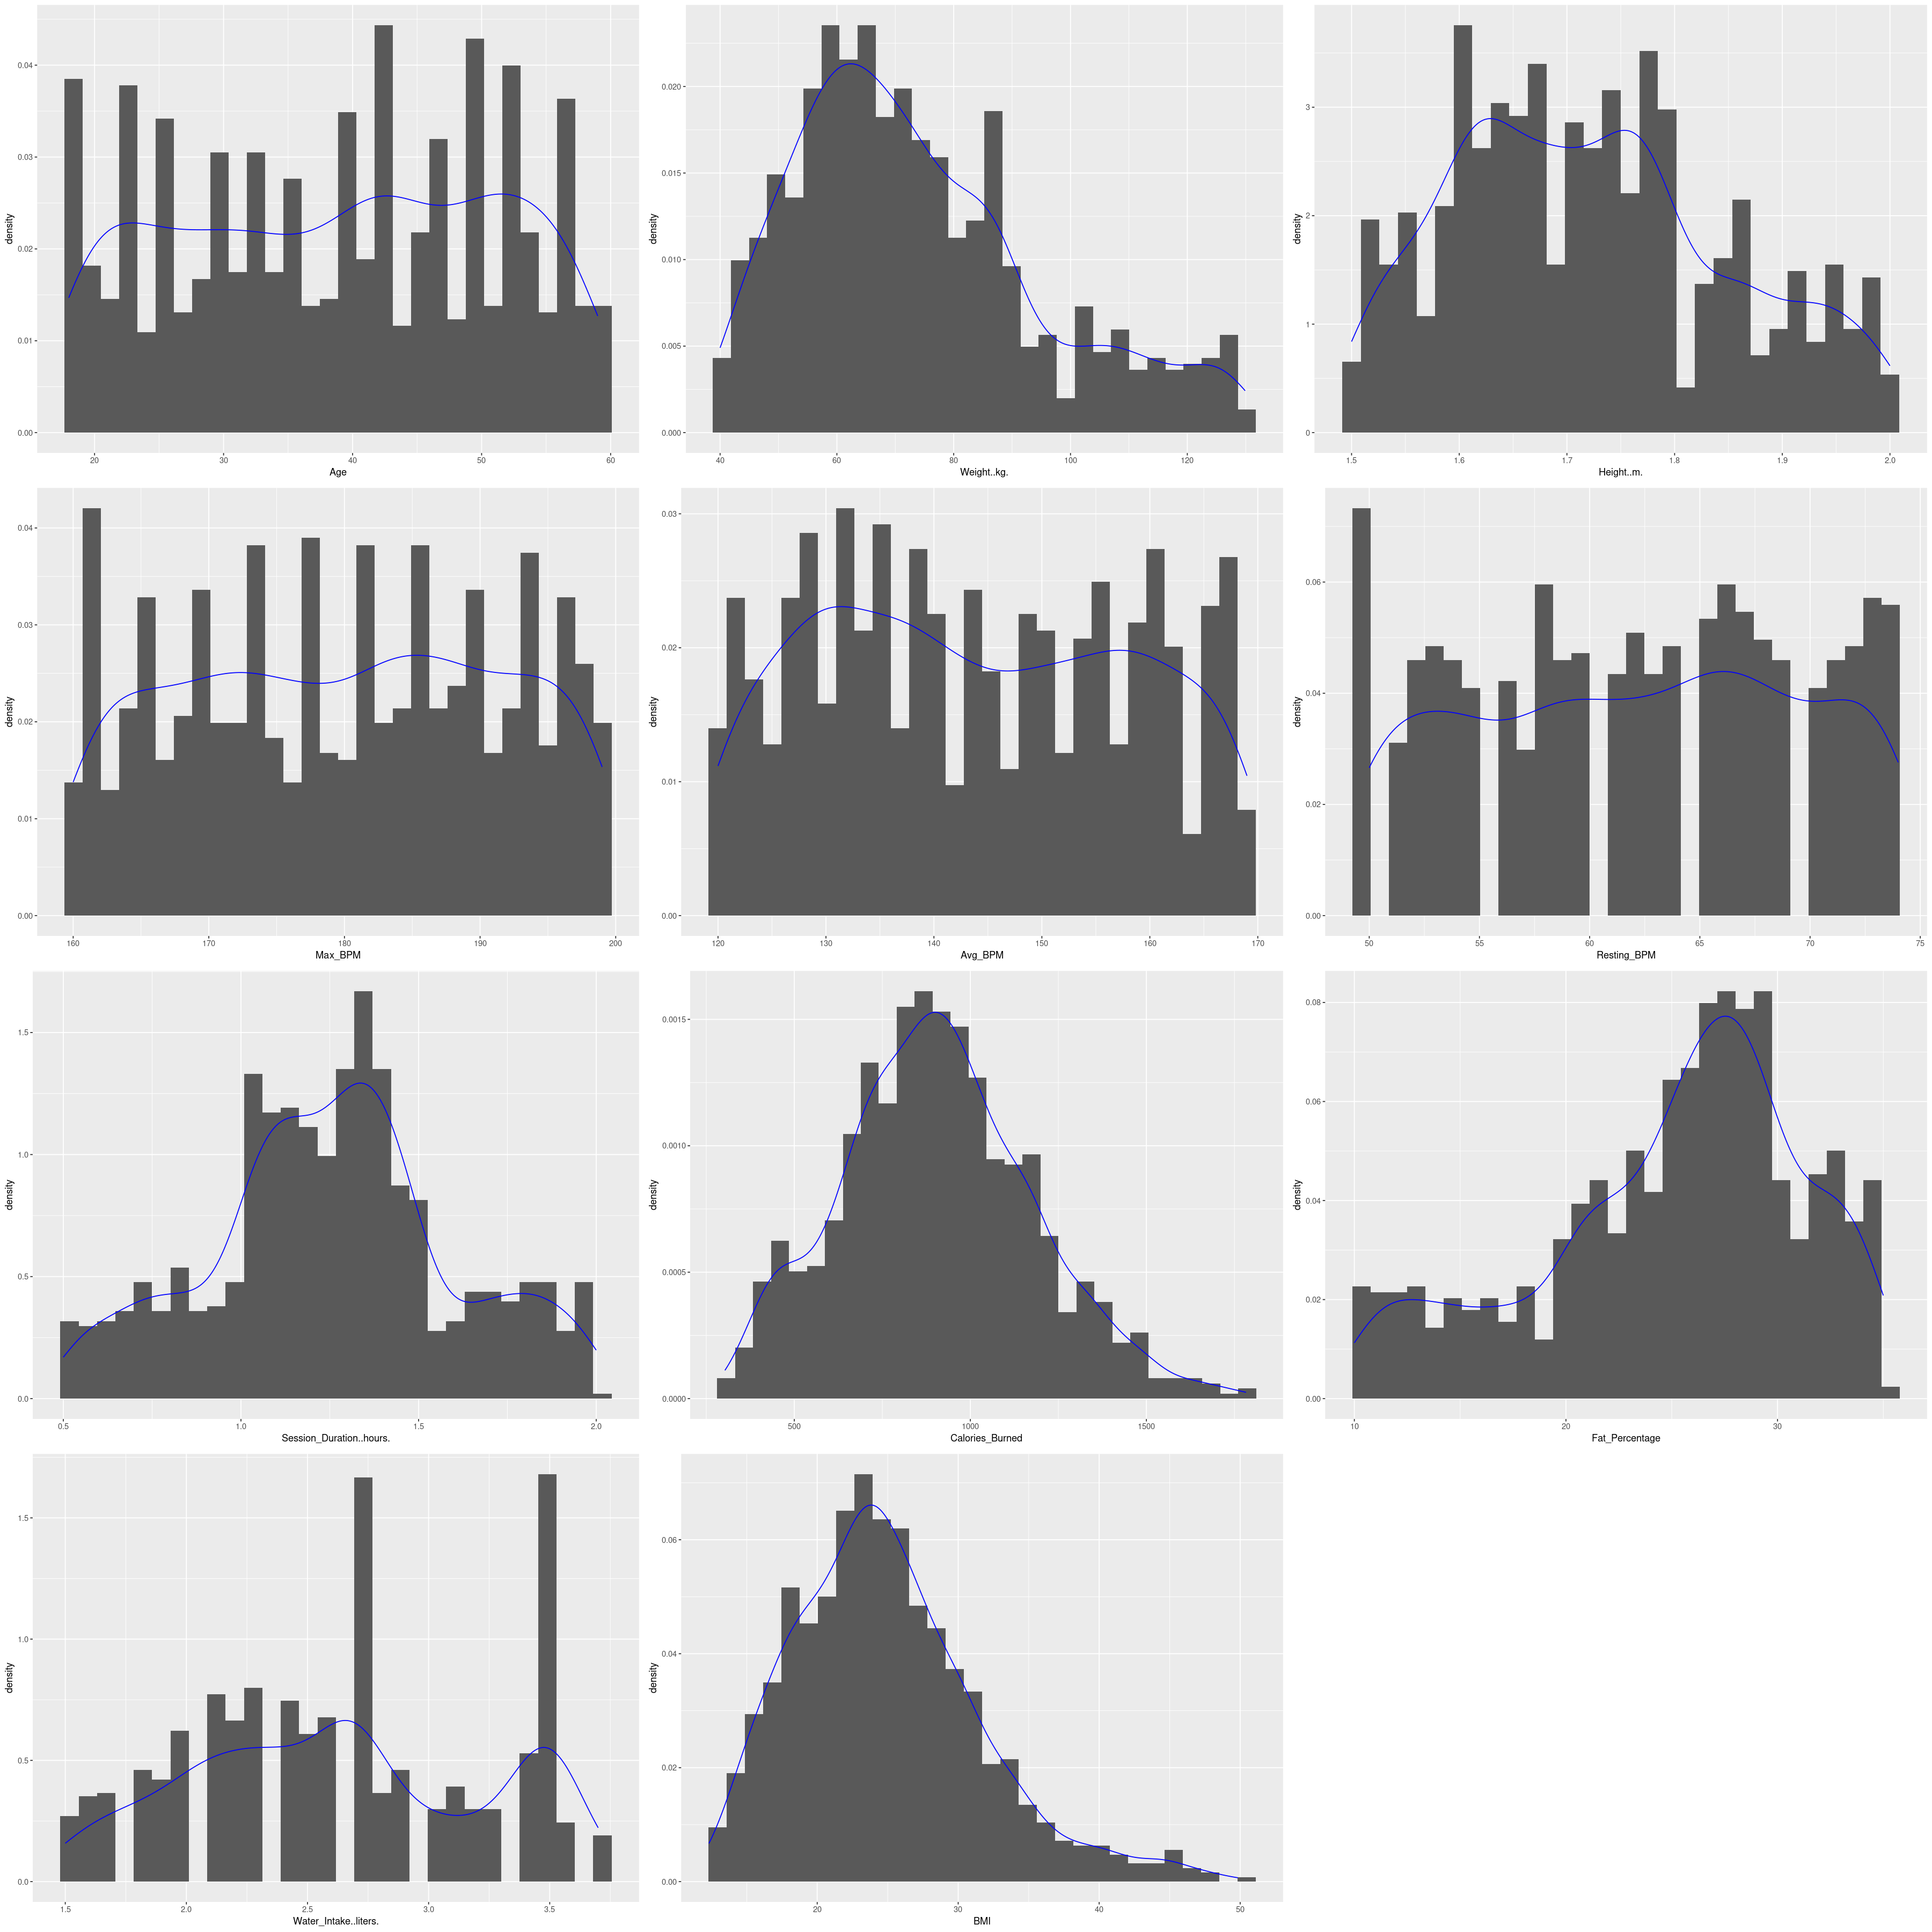

In [7]:
options(repr.plot.width=30, repr.plot.height=30)
g1<-ggplot(gym,aes(x=Age))+geom_histogram(aes(y=after_stat(density)))+geom_density(alpha=.2, col="blue") 
g2<-ggplot(gym,aes(x=Weight..kg.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g3<-ggplot(gym,aes(x=Height..m.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g4<-ggplot(gym,aes(x=Max_BPM))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g5<-ggplot(gym,aes(x=Avg_BPM))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g6<-ggplot(gym,aes(x=Resting_BPM))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g7<-ggplot(gym,aes(x=Session_Duration..hours.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g8<-ggplot(gym,aes(x=Calories_Burned))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g9<-ggplot(gym,aes(x=Fat_Percentage))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g10<-ggplot(gym,aes(x=Water_Intake..liters.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g11<-ggplot(gym,aes(x=BMI))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 

grid.arrange(g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,ncol=3)

#Les variables sont quantitatives et non symétriques sauf calories_burned et BMI à peu près.

Les variables sont quantitatives et non symétriques sauf calories_burned et BMI à peu près. On va donc passer a une transformation des variables pour rendre certaines distributions plus symétriques et ainsi plus "gaussiennes". C'est nécessaire pour certaines méthodes à venir de modélisation (linéaires), pas pour toutes (arbres).

Dans notre cas, les variables ayant une ressemblance gaussienne sont calories_burned, BMI, Weight..kg. et Fat_Percentage.
On va donc essayer de les centrer.

#### 2.1.1) Transformation des variables 

Remarque : comme nous allons prédire Calories_Burned, il n'est pas intéressant de la transformer.

##### a) BMI

Tout d'abord, on va s'intéresser à BMI car elle est plus ou moins symétrique. Ainsi il se peut qu'en appliquant une certaine fonction bien choisie, nous puissions la rendre symétrique.
MAL DIT : En s'inspirant du TP de base, on remarque que l'on aplique + des log lorsqu'il y a un gros pic au début (pour "contrer le log").
Ici, on ne remarque pas de pic particulier donc on va se contenter d'appliquer les 2 fonctions vues en TP : sqrt et log puis comparer les résultats.

In [8]:
gym[, "LBMI"] <- log(gym[, "BMI"])
gym[, "SBMI"] <- sqrt(gym[, "BMI"])

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


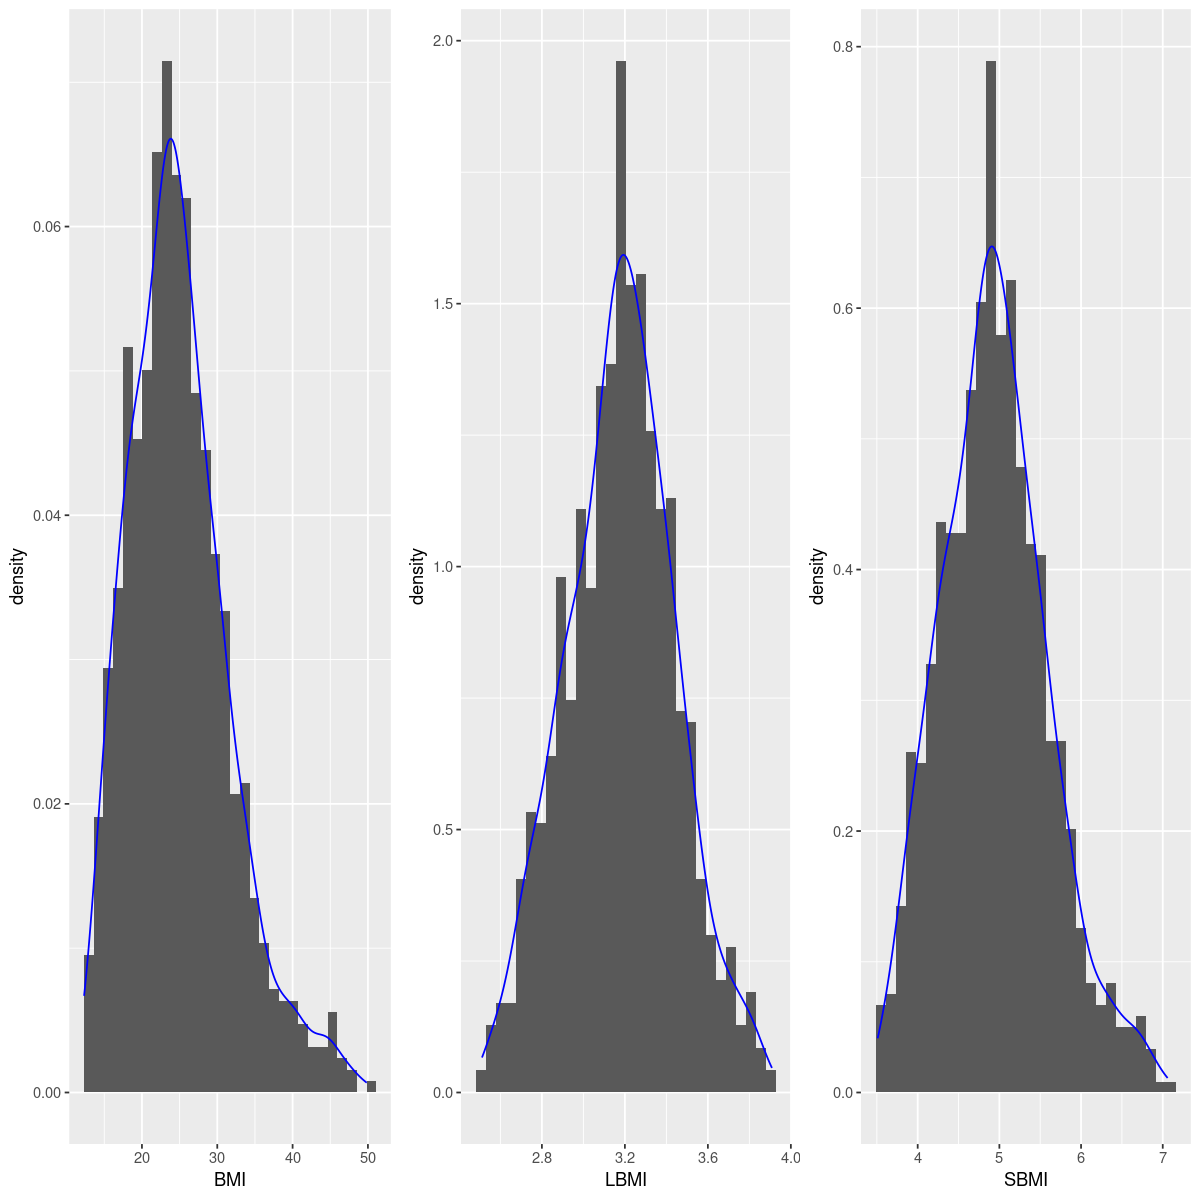

In [9]:
options(repr.plot.width=10, repr.plot.height=10)
g1<-ggplot(gym,aes(x=BMI))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g2<-ggplot(gym,aes(x=LBMI))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g3<-ggplot(gym,aes(x=SBMI))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
grid.arrange(g1, g2, g3, ncol=3)

Pour l'instant, on part sur le LBMI (log) car c'est celle qu'on trouve la plus centrée

Maintenant, est ce qu'il faut faire le même raisonnement pour chaque variables ou uniquement celle pour lesquelles on estime que c'est déjà à peu près symétrique ? => non, tout ce qui est plus ou moins uniforme, ça sert à rien d'essayer, ça restera nul

Est ce qu'il y a d'autres fonctions à utiliser que sqrt et log ? => oui 

##### b) Weight..kg

[1] -0.3434343


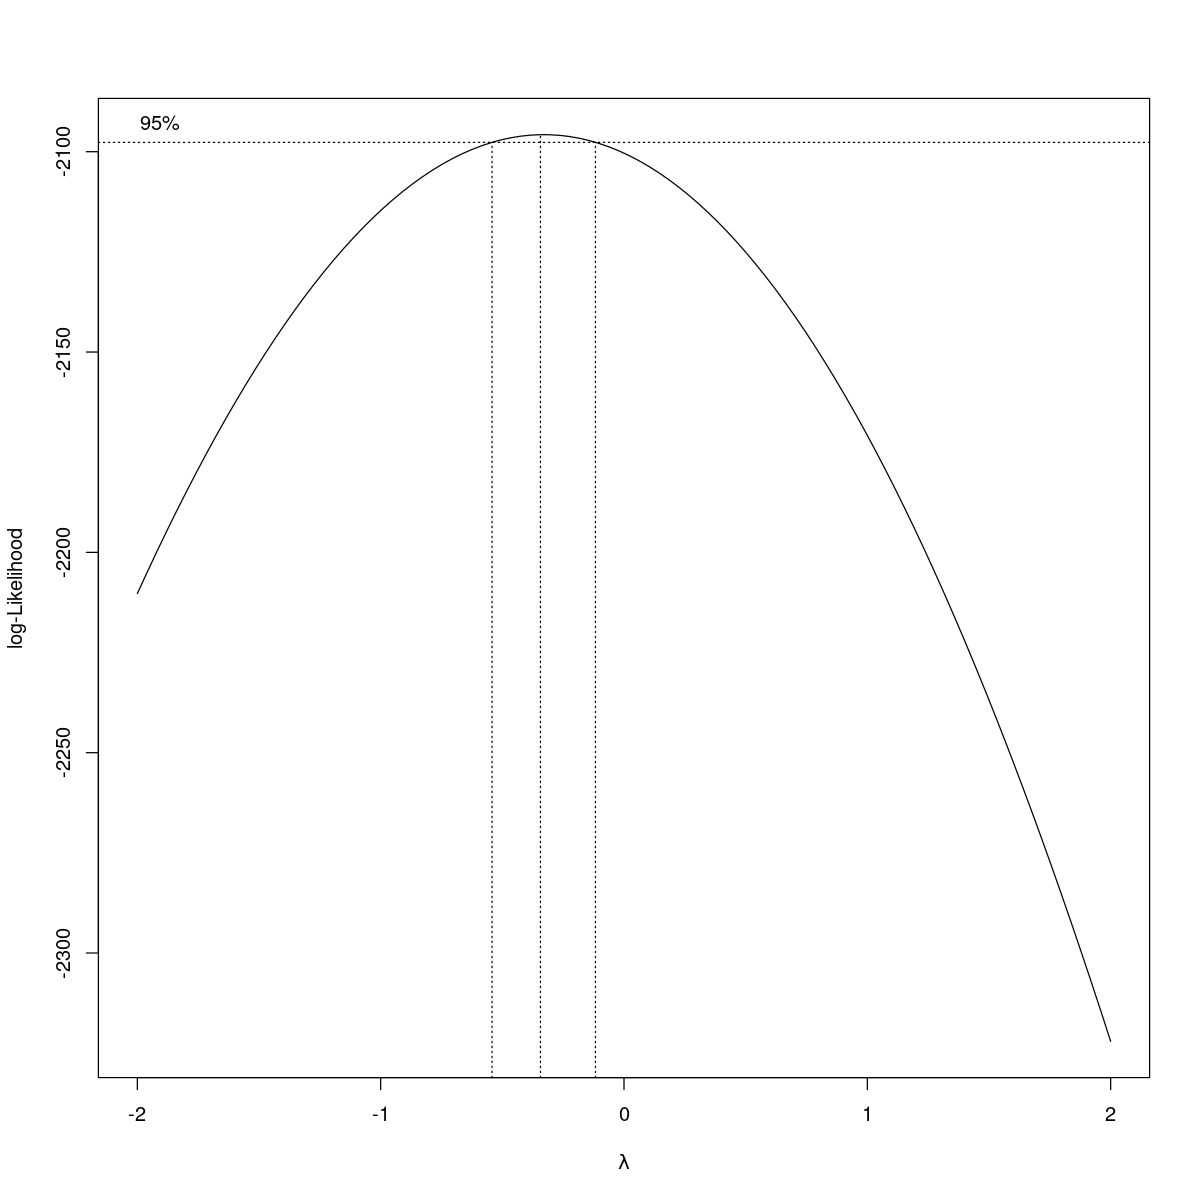

In [10]:
gym[, "LWeight..kg."] <- log(gym[, "Weight..kg."])
gym[, "SWeight..kg."] <- sqrt(gym[, "Weight..kg."])

#On essaye d'appliquer 2 autres fonctions:

gym[, "AWeight..kg."] <- atan(gym[, "Weight..kg."]) #arctan

#Méthode Box Cox => on optimise la valeur de lambda pour rendre la distribution la plus normale possible. Fonctionne pour des valeurs strictement positives (le cas ici)
lambda <- boxcox(lm(Weight..kg. ~ 1, data = gym), lambda = seq(-2, 2, by = 0.1))$x[which.max(boxcox(lm(Weight..kg. ~ 1, data = gym), lambda = seq(-2, 2, by = 0.1))$y)]
if (lambda == 0) {
  gym[, "BWeight..kg."] <- log(gym[, "Weight..kg."])
} else {
  gym[, "BWeight..kg."] <- (gym[, "Weight..kg."]^lambda - 1) / lambda
}
print(lambda)

Ici, le lambda optimal pour la méthode Box Cox est : -0.3434343

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


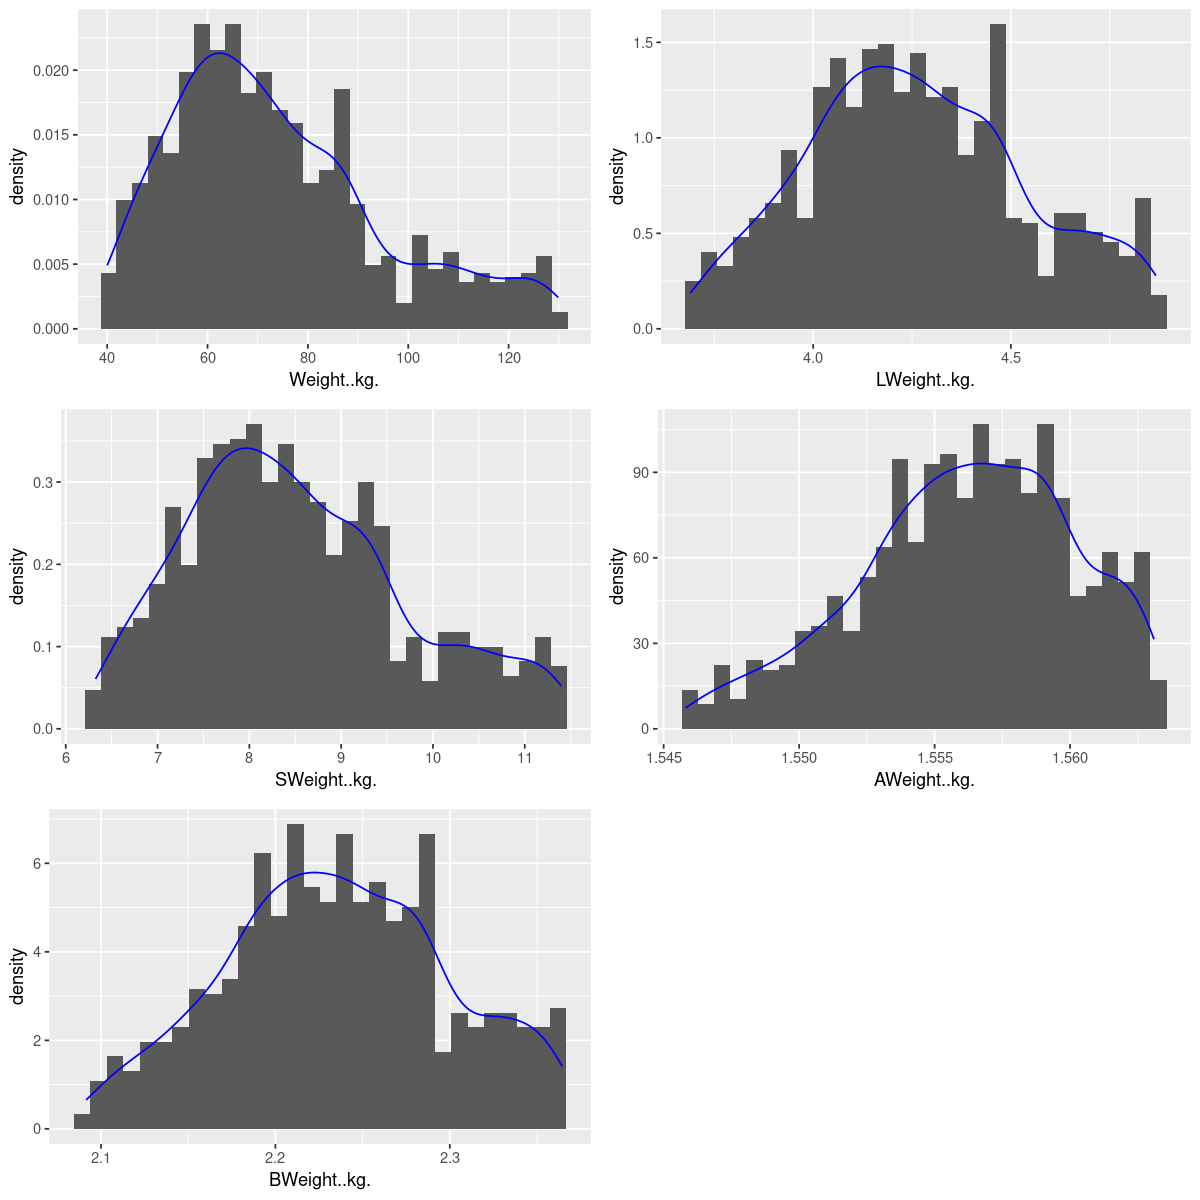

In [11]:
options(repr.plot.width=10, repr.plot.height=10)
g1<-ggplot(gym,aes(x=Weight..kg.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g2<-ggplot(gym,aes(x=LWeight..kg.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") # => le plus correct
g3<-ggplot(gym,aes(x=SWeight..kg.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g4<-ggplot(gym,aes(x=AWeight..kg.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g5<-ggplot(gym,aes(x=BWeight..kg.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
grid.arrange(g1, g2, g3, g4, g5, ncol=2)

Tout de même, la fonction log reste celle qui rend la distribution la plus gaussienne => on garde LWeight

##### c) Fat_Percentage

Pour la dernière variable Fat_Percentage, les transformations testées n'ont pas été concluantes. On la gardera tel quel. 

#### 2.1.2) Suppression des variables qui ont été transformées

In [12]:
gym <- gym[ , -which(names(gym) == "BMI")]
gym <- gym[ , -which(names(gym) == "SBMI")]
gym <- gym[ , -which(names(gym) == "Weight..kg." )]
gym <- gym[ , -which(names(gym) == "SWeight..kg." )]
gym <- gym[ , -which(names(gym) == "AWeight..kg." )]
gym <- gym[ , -which(names(gym) == "BWeight..kg." )]

In [12]:
summary(gym)

      Age           Gender      Height..m.       Max_BPM         Avg_BPM     
 Min.   :18.00   Female:462   Min.   :1.500   Min.   :160.0   Min.   :120.0  
 1st Qu.:28.00   Male  :511   1st Qu.:1.620   1st Qu.:170.0   1st Qu.:131.0  
 Median :40.00                Median :1.710   Median :180.0   Median :143.0  
 Mean   :38.68                Mean   :1.723   Mean   :179.9   Mean   :143.8  
 3rd Qu.:49.00                3rd Qu.:1.800   3rd Qu.:190.0   3rd Qu.:156.0  
 Max.   :59.00                Max.   :2.000   Max.   :199.0   Max.   :169.0  
  Resting_BPM    Session_Duration..hours. Calories_Burned    Workout_Type
 Min.   :50.00   Min.   :0.500            Min.   : 303.0   Cardio  :255  
 1st Qu.:56.00   1st Qu.:1.040            1st Qu.: 720.0   HIIT    :221  
 Median :62.00   Median :1.260            Median : 893.0   Strength:258  
 Mean   :62.22   Mean   :1.256            Mean   : 905.4   Yoga    :239  
 3rd Qu.:68.00   3rd Qu.:1.460            3rd Qu.:1076.0                 
 Max.   :7

#### 2.1.3) Vérification des outliers

Maintenant que nos variables ont été transformé, on veut s'assurer qu'il n'y pas d'outliers importants avant de pourvoir passer à la suite du projet. Pour cela, on va afficher des boxplots pour chacune de nos variables quantitatives. Etant donné que nos variables quantitatives ont des valeurs très différentes, nous allons les normaliser pour rendre l'affichage des boxplot plus propre (sinon c'est illisible), mais cela ne change rien aux outliers.

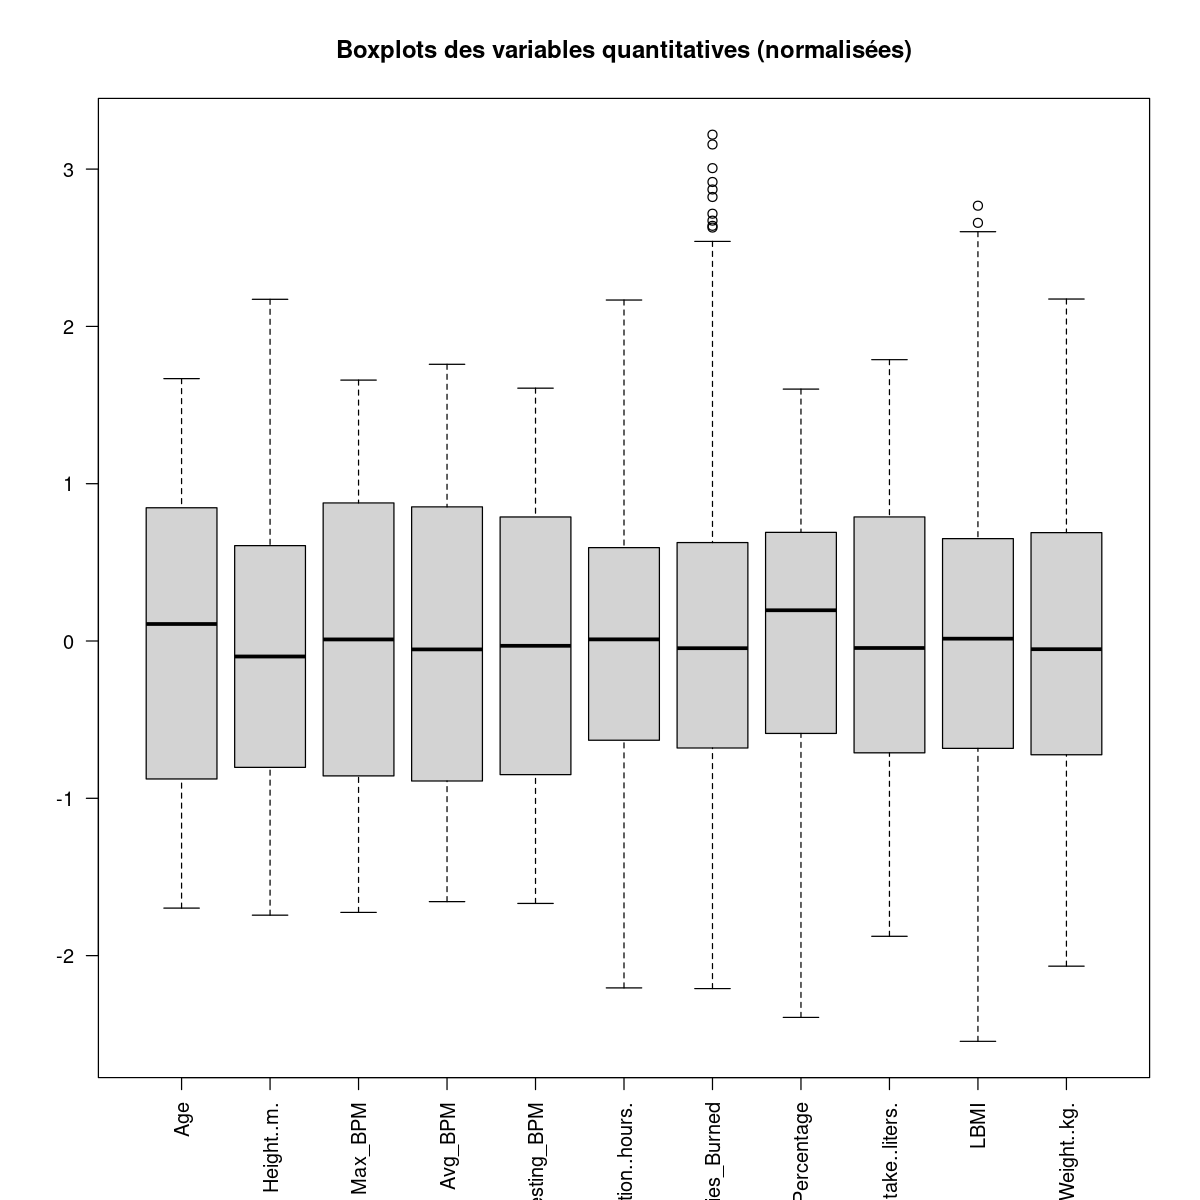

In [13]:
#Sélection des variables quanti i.e.: numeric
quanti_data <- gym[, sapply(gym, is.numeric)]

# Normalisation (centrage et réduction)
quanti_data_scaled <- scale(quanti_data)

# Boxplot des données normalisées
boxplot(quanti_data_scaled, main = "Boxplots des variables quantitatives (normalisées)", las = 2)


Aucun outliers excepté pour Calories_Burned et LBMI.  Cependant, après une inspection plus approfondie des valeurs extrêmes, nous constatons qu'elles ne sont pas aberrantes et ne risquent pas de fausser les résultats. Par conséquent, nous avons décidé de les conserver dans l'analyse.

#### 2.2) Données qualitatives 

In [14]:
# Sélection unique des variables qualitatives
quali_vars <- which(sapply(gym, function(x) is.factor(x) || is.character(x)))

# Affichage des tables de fréquence sans doublons
for (var in names(gym)[quali_vars]) {
  cat("\n---", var, "---\n")
  print(table(gym[[var]]))
}


--- Gender ---

Female   Male 
   462    511 

--- Workout_Type ---

  Cardio     HIIT Strength     Yoga 
     255      221      258      239 

--- Workout_Frequency..days.week. ---

  2   3   4   5 
197 368 306 102 

--- Experience_Level ---

  1   2   3 
376 406 191 


Pas de valeurs aberrantes ou inutiles.

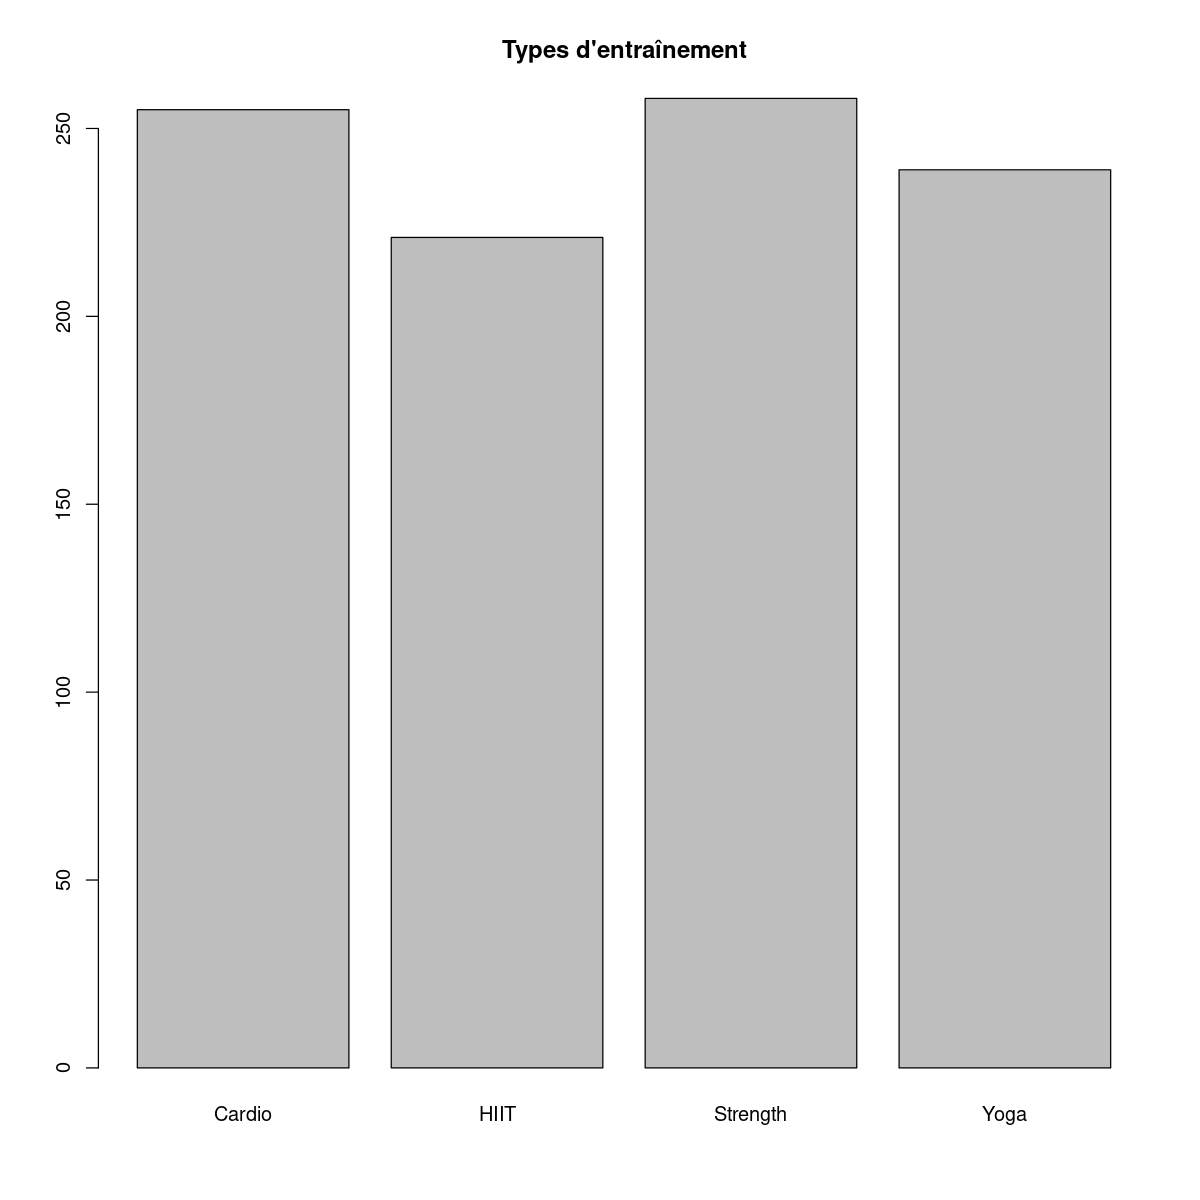

In [15]:
#On peut aussi faire des barplots
barplot(table(gym$Workout_Type), main = "Types d'entraînement")

## 3) Analyse descriptive bidimensionnelle

Utilisation des techniques de visualisation: par exemple les nuages de points (scatterplot), des graphes des correlations, des boîtes à moustaches parallèles, 
mosaicplot..

### 3.1) Comparaison quanti / quanti 

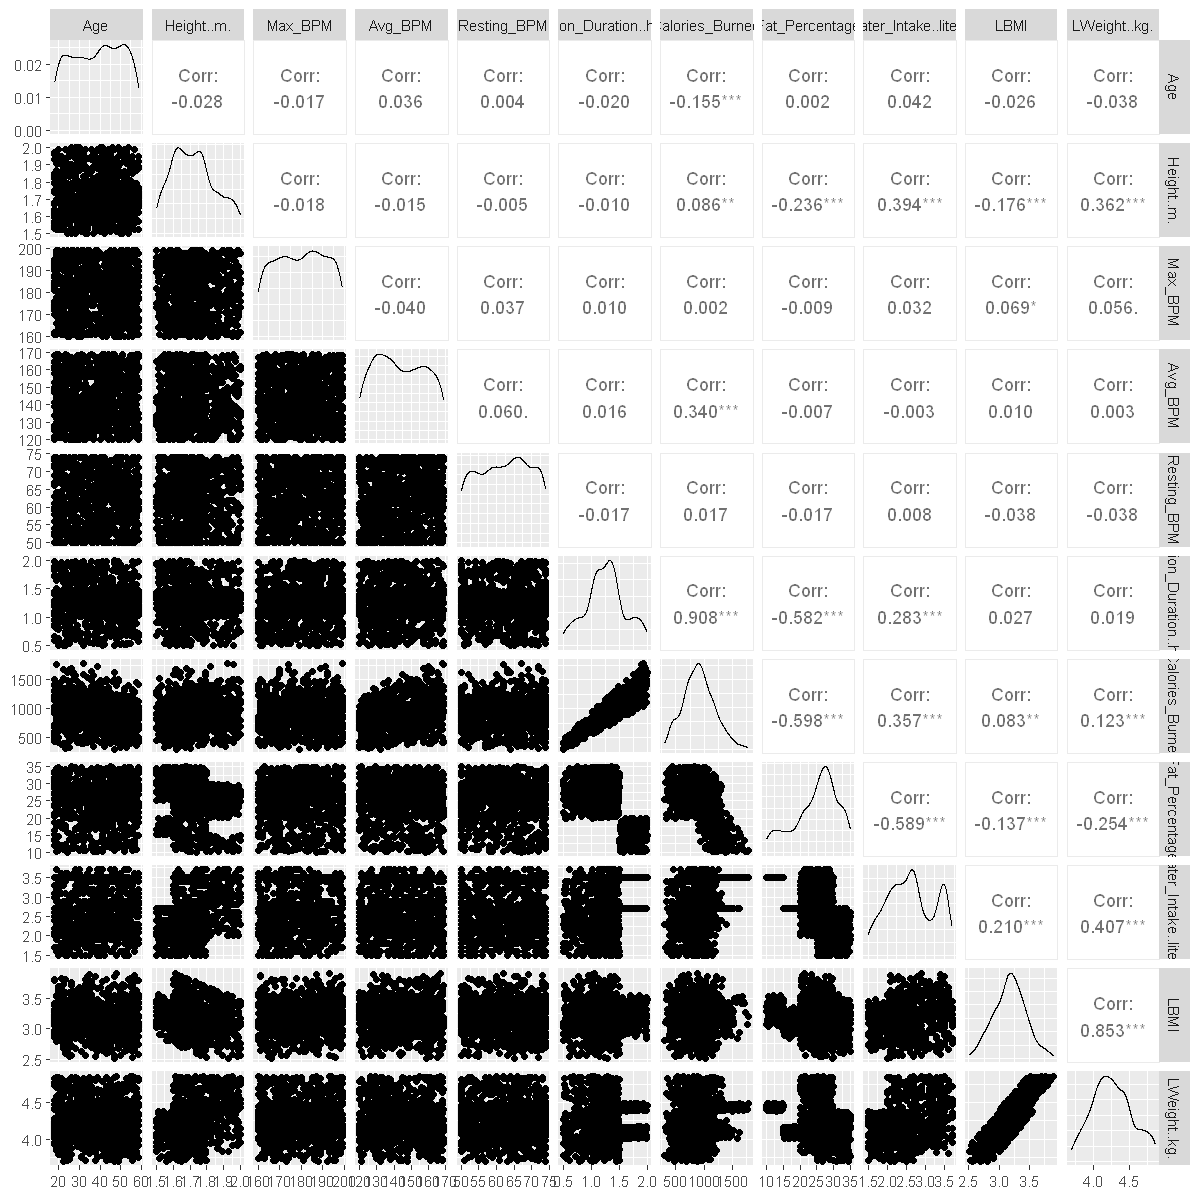

In [16]:
ggpairs(gym[, c(1,3:8,10,11,14,15)])

On voit que la durée de la session est correlée au  nombre de calories brulées. De plus, sans surprise, l'IMC est correlé au poids et à la taille du membre. => pourquoi taille ? la corr est seulement de -0.17

Il y a aussi une (plus légère) corrélation négative entre le pourcentage de graisse corporelle d'un membre et :
- la durée de la session => les personnes en difficulté physiques peuvent avoir du mal à faire de plus longues séances
- nbr de calories brulées => par conséquent, elles ont du mal à bruler des calories
- consommation quotidienne d’eau pendant les séances d’entraînement => plus on s'entraîne et plus on s'hydrate (et inversement)


On va vérifier ces corrélations avec des scatter plot (qui sont déjà présents dans le ggpairs mais cela permet de mieux visualiser en les affichant en plus grand) :

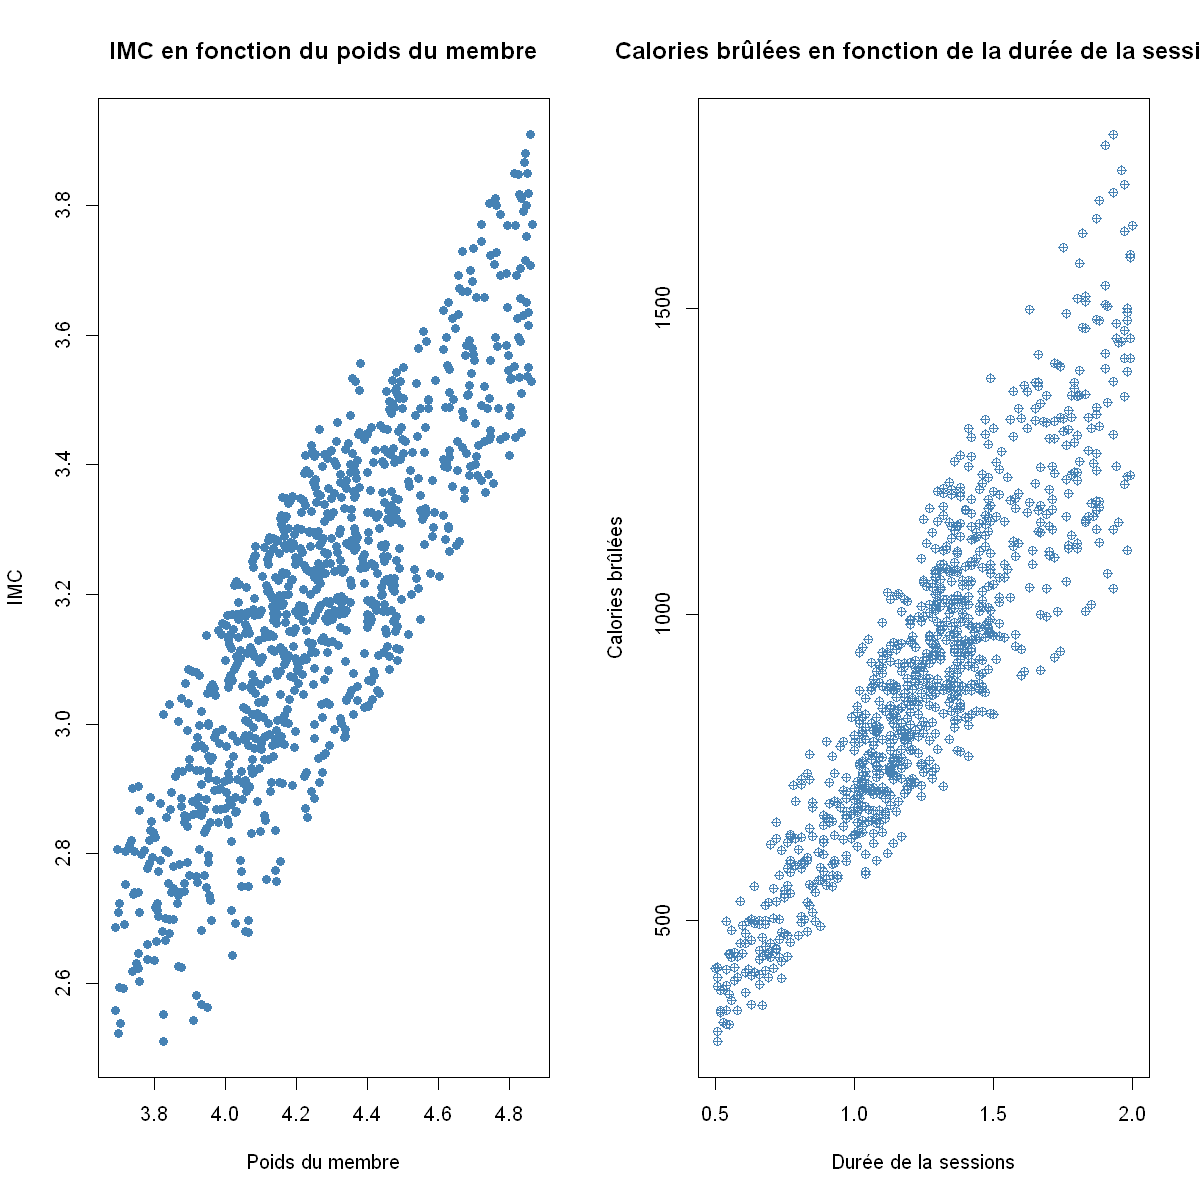

In [17]:
par(mfrow = c(1, 2))  # 1 ligne, 2 colonnes

#1er plot
plot(gym$LWeight..kg., gym$LBMI, 
     main = "IMC en fonction du poids du membre",
     xlab = "Poids du membre", ylab = "IMC",
     pch = 19, col = "steelblue")

#2nd plot 
plot(gym$Session_Duration..hours., gym$Calories_Burned,
     main = "Calories brûlées en fonction de la durée de la session",
     xlab = "Durée de la sessions", ylab = "Calories brûlées",
     pch = 10, col = "steelblue")

Cela confirme bien nos hypothèses de corrélations positives plutôt fortes

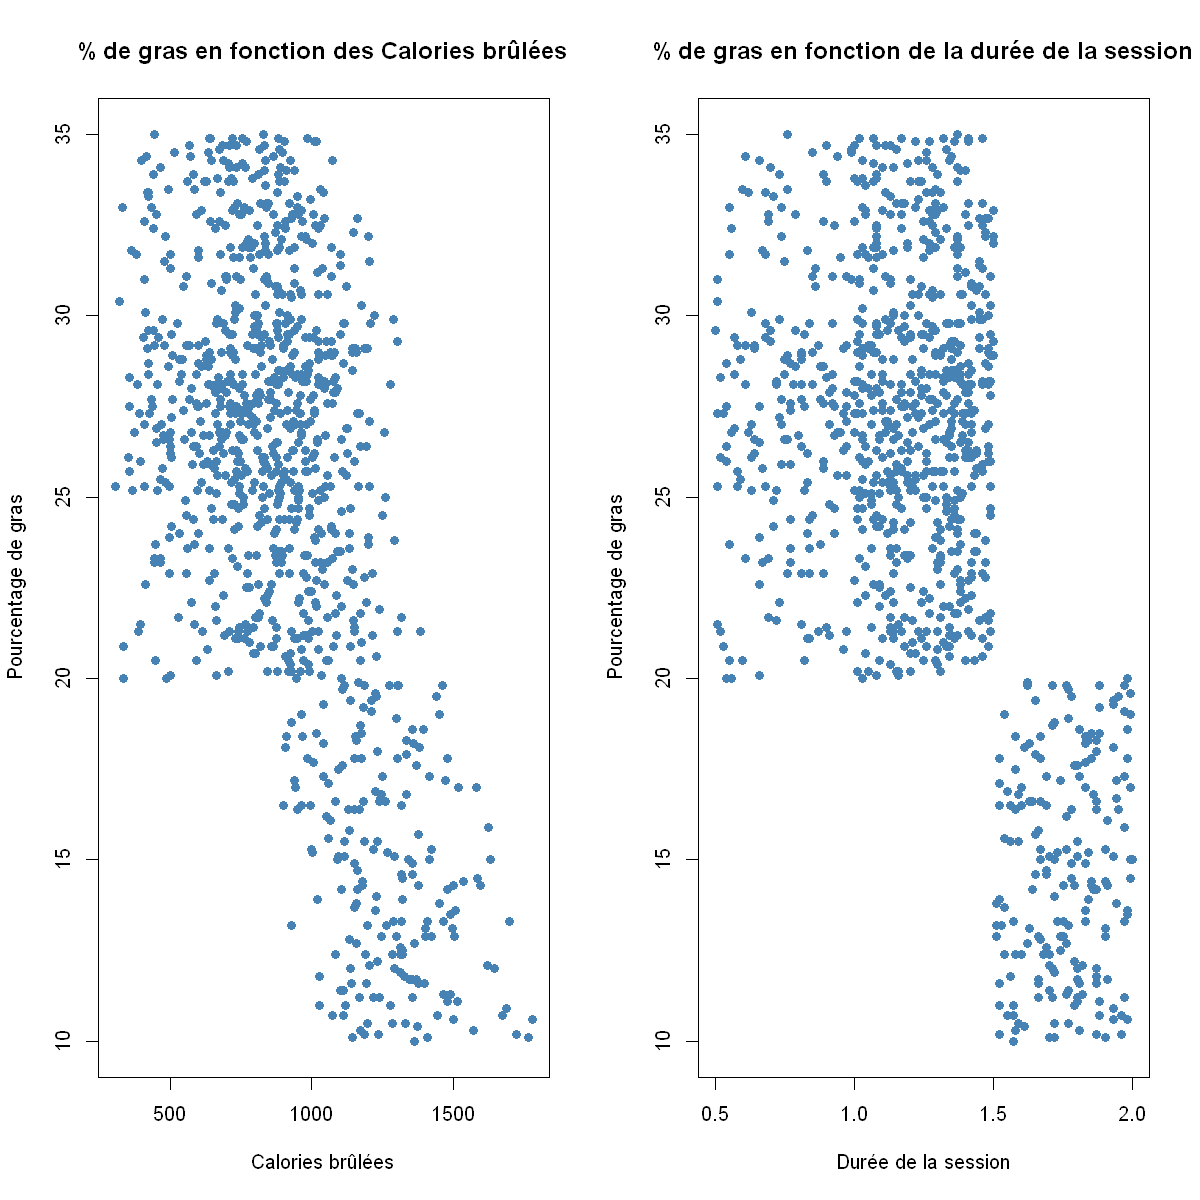

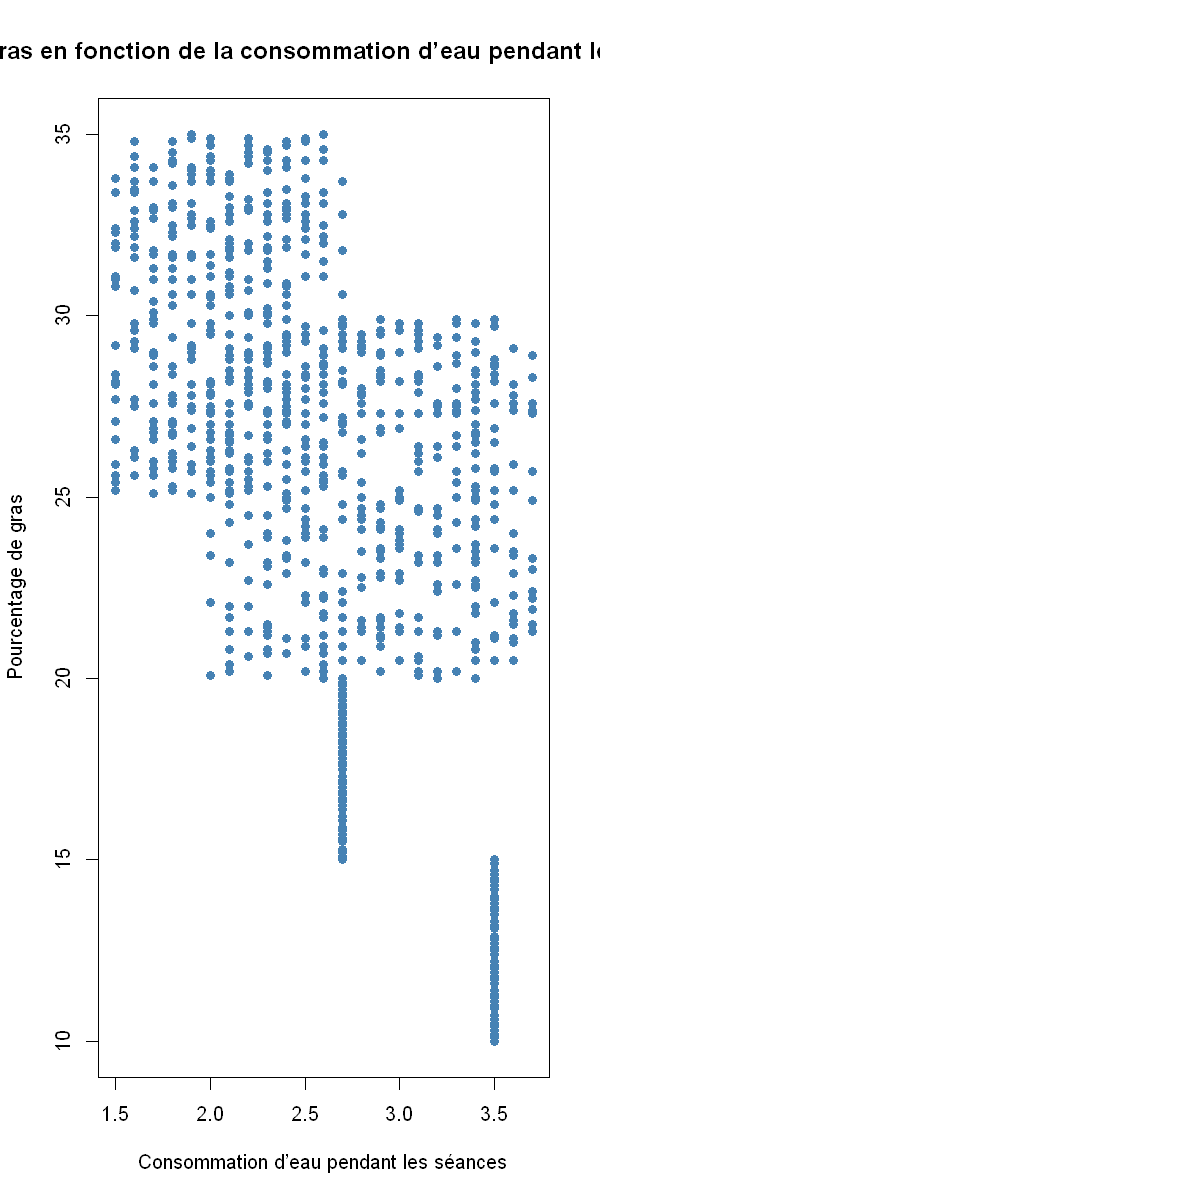

In [18]:
par(mfrow = c(1,2))  # 1 ligne, 2 colonnes

plot(gym$Calories_Burned, gym$Fat_Percentage, 
     main = "% de gras en fonction des Calories brûlées",
     xlab = "Calories brûlées", ylab = "Pourcentage de gras",
     pch = 19, col = "steelblue")

plot(gym$Session_Duration..hours., gym$Fat_Percentage,
     main = "% de gras en fonction de la durée de la session",
     xlab = "Durée de la session", ylab = "Pourcentage de gras",
     pch = 19, col = "steelblue")

plot(gym$Water_Intake..liters., gym$Fat_Percentage,
     main = "% de gras en fonction de la consommation d’eau pendant les séances",
     xlab = "Consommation d’eau pendant les séances", ylab = "Pourcentage de gras",
     pch = 19, col = "steelblue")

On confirme aussi les hypothèses de corrélations négatives moins fortes que les corrélations précédentes.

### 3.2 Comparaison quali / quali 

On effectue tout d'abord quelques mosaic plot pour observer la dépendance entre les variables qualitatives 2 à 2

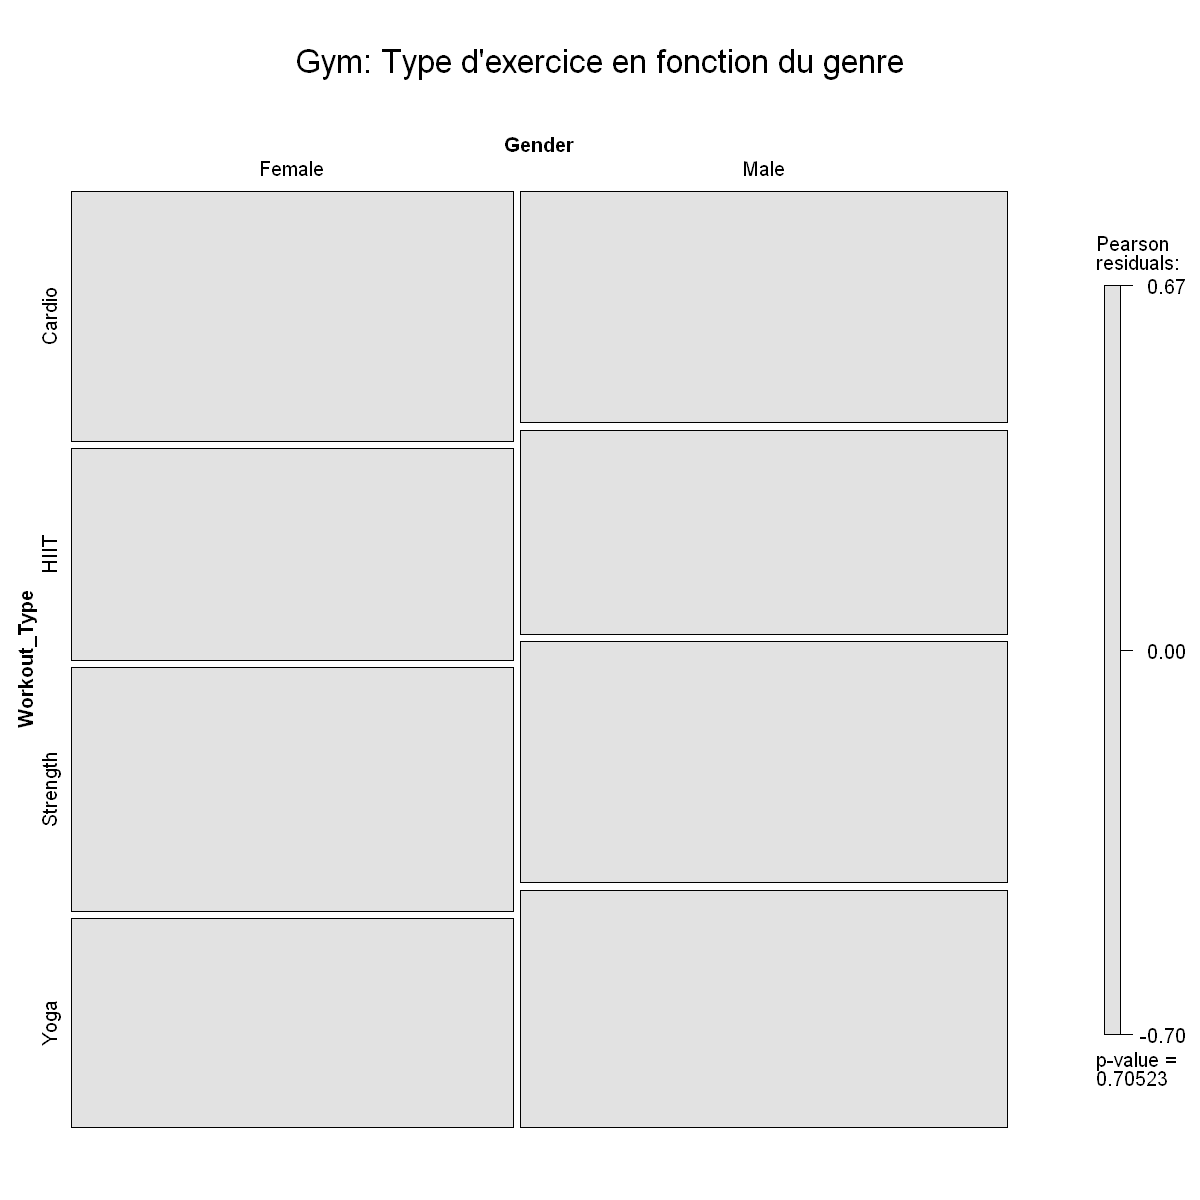

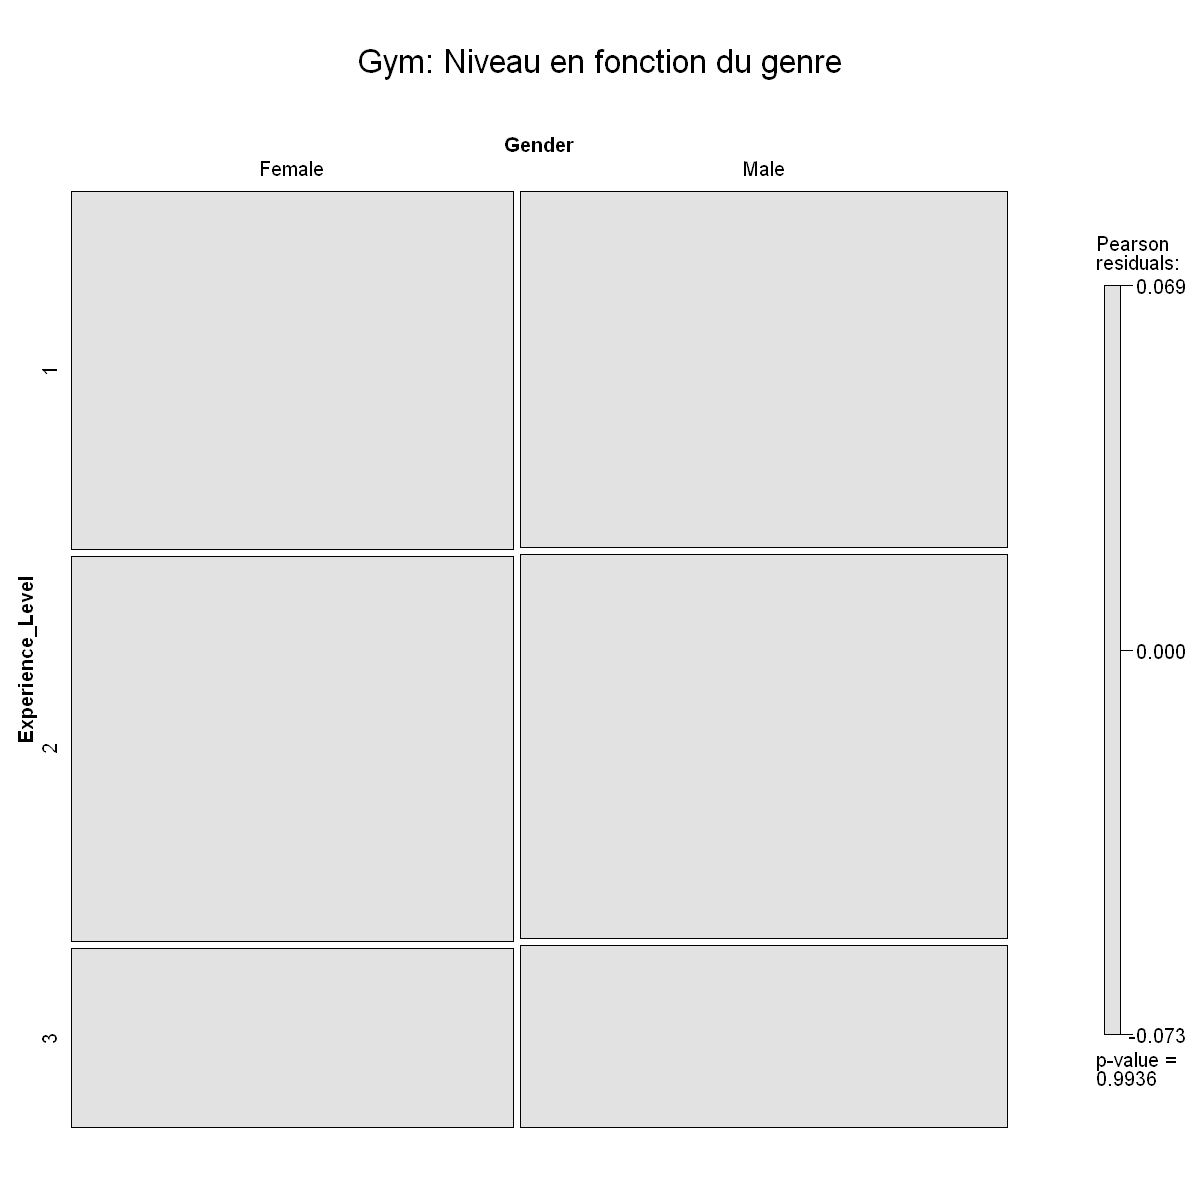

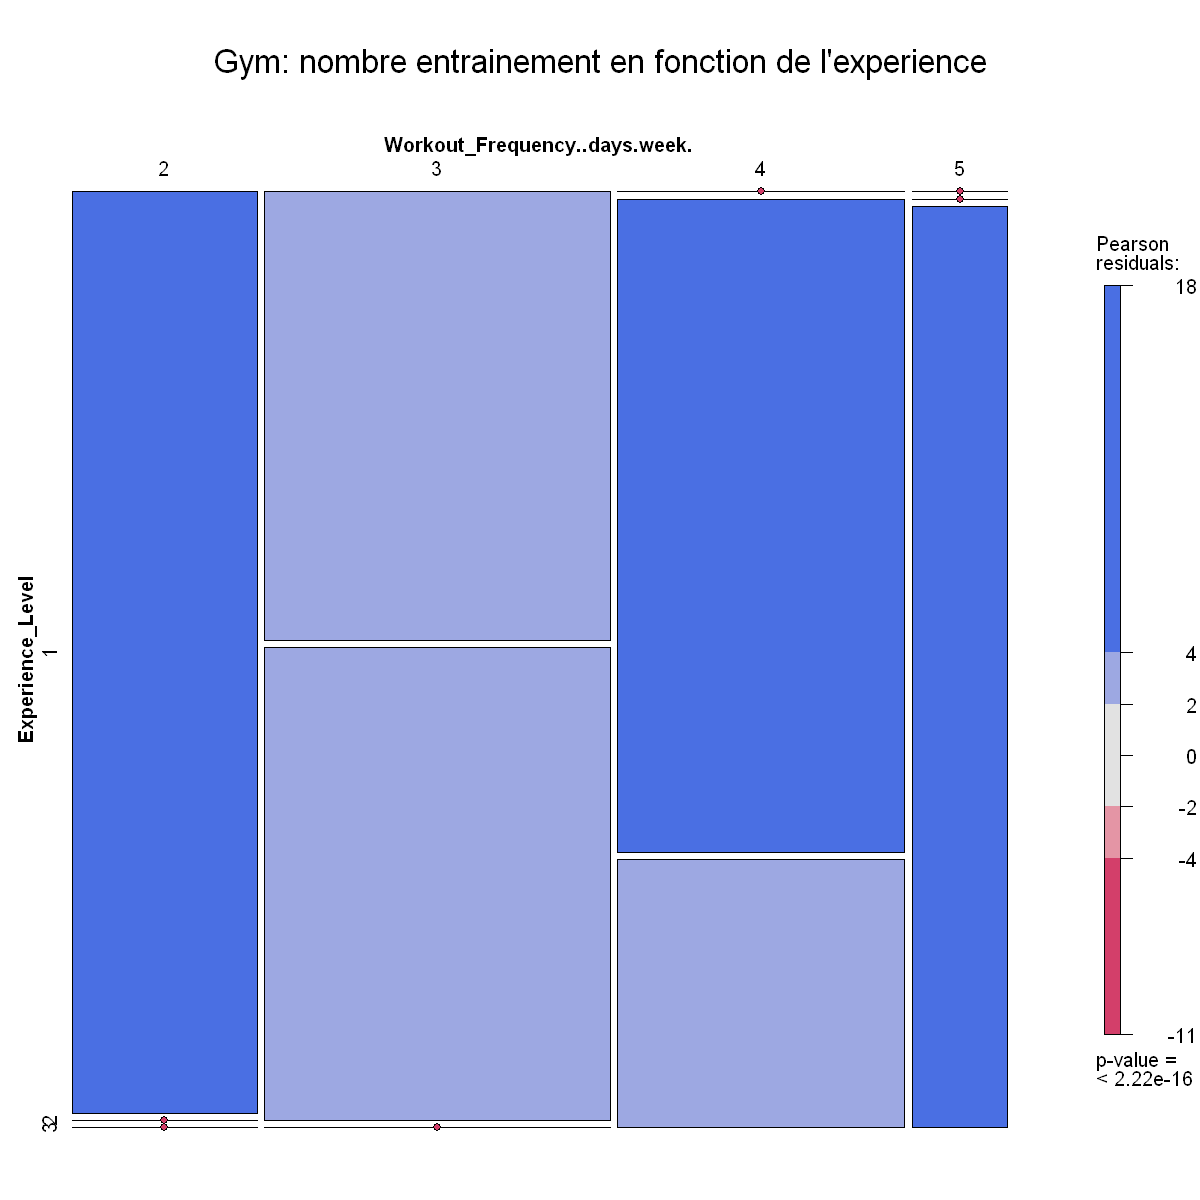

In [19]:

mosaic( xtabs(~Gender + Workout_Type, data = gym), shade = TRUE, ,
            split_vertical = TRUE,
            main="Gym: Type d'exercice en fonction du genre")

mosaic( xtabs(~Gender + Experience_Level, data = gym),  shade = TRUE, ,
            split_vertical = TRUE,
            main="Gym: Niveau en fonction du genre")
mosaic( xtabs(~Workout_Frequency..days.week. + Experience_Level, data = gym),  shade = TRUE, ,
            split_vertical = TRUE,
            main="Gym: nombre entrainement en fonction de l'experience")

Ici, il y a 3 différents cas qui correspondent à 3 niveaux de p-valeurs : 
1) Quand on compare le niveau d'expérience selon le genre, on remarque qu'il n'y a pas du tout de dépendance entre ces 2 variables car il y a quasiment aucune différence selon le genre. On le confirme avec une p-valeur presque égale à 1. 
2) Quand on compare le type de d'entrînement effectué selon le genre, il n'y a toujours pas de dépendance forte mais il y a quand même quelques légères différences. On a donc une p-valeur moins proche de 1
3) Enfin, si on compare le niveau d'expérience selon le nbr d'entrînements par semaine, il y a clairement une dépendance significative entre ces 2 variables. En effet, la p_value<2.22e-16 nous le confirme. Cette p valeur correspond à la p-valeur d'un test de chi deux d'indépendance réalisé entre les deux variables qualitatives que l'on compare dans ce graphique. Donc il y a une forte dépendance entre le nbr d'entraînements par semaine et le niveau d'expérience, ce qui est cohérent.

On confirme notre hypothèse en affichant la table de contingence

In [20]:
tab <- table(gym$Experience_Level, gym$Workout_Frequency..days.week.)
tab

# Appliquer le test du chi carré
test <- chisq.test(tab)
print(test)

   
      2   3   4   5
  1 197 179   0   0
  2   0 189 217   0
  3   0   0  89 102


	Pearson's Chi-squared test

data:  tab
X-squared = 1015, df = 6, p-value < 2.2e-16



Pour éviter d'afficher toutes les mosaics plots, on crée ci-dessous une fonction qui va effectuer un test de chi deux pour chacune de nos variables qualitatives 2 à 2 et qui va retenir uniquement les tests pour lesquels la p-valeurs est inférieur à 0.05 i.e.: les variables pour lesquelles il y a une forte dépendance au risque 5%.

In [21]:
# Sélectionner les variables qualitatives dans le jeu de données
quali_vars <- sapply(gym, is.factor)

# Récupérer les noms des variables qualitatives
quali_var_names <- names(gym)[quali_vars]

# Appliquer le test du chi carré pour chaque paire de variables qualitatives
for (i in 1:(length(quali_var_names)-1)) {
  for (j in (i+1):length(quali_var_names)) {
    # Créer un tableau de contingence entre les deux variables
    contingency_table <- table(gym[[quali_var_names[i]]], gym[[quali_var_names[j]]])
    
    # Appliquer le test du chi carré
    test <- chisq.test(contingency_table)
    
    # Vérifier si la p-valeur est inférieure à 0.05
    if (test$p.value < 0.05) {
      # Afficher le nom des variables et les résultats du test si p-valeur < 0.05
      cat("\n--- Test du Chi² entre", quali_var_names[i], "et", quali_var_names[j], "---\n")
      print(test)
    }
  }
}



--- Test du Chi² entre Workout_Frequency..days.week. et Experience_Level ---

	Pearson's Chi-squared test

data:  contingency_table
X-squared = 1015, df = 6, p-value < 2.2e-16



Le seul test où il y a une forte dépendance est celui que nous avons déjà fait précédemment entre le nbr d'entraînements et le niveau d'expérience.

### 3.3 Comparaison quanti / quali 

On s'intéresse maintenant aux effets d’une catégo sur une variable quantitative. Pour cela on peut commencer par faire des boxplots croisés qui nous permettent de visualiser la distribution d’une variable quantitative pour chaque modalité de la variable qualitative

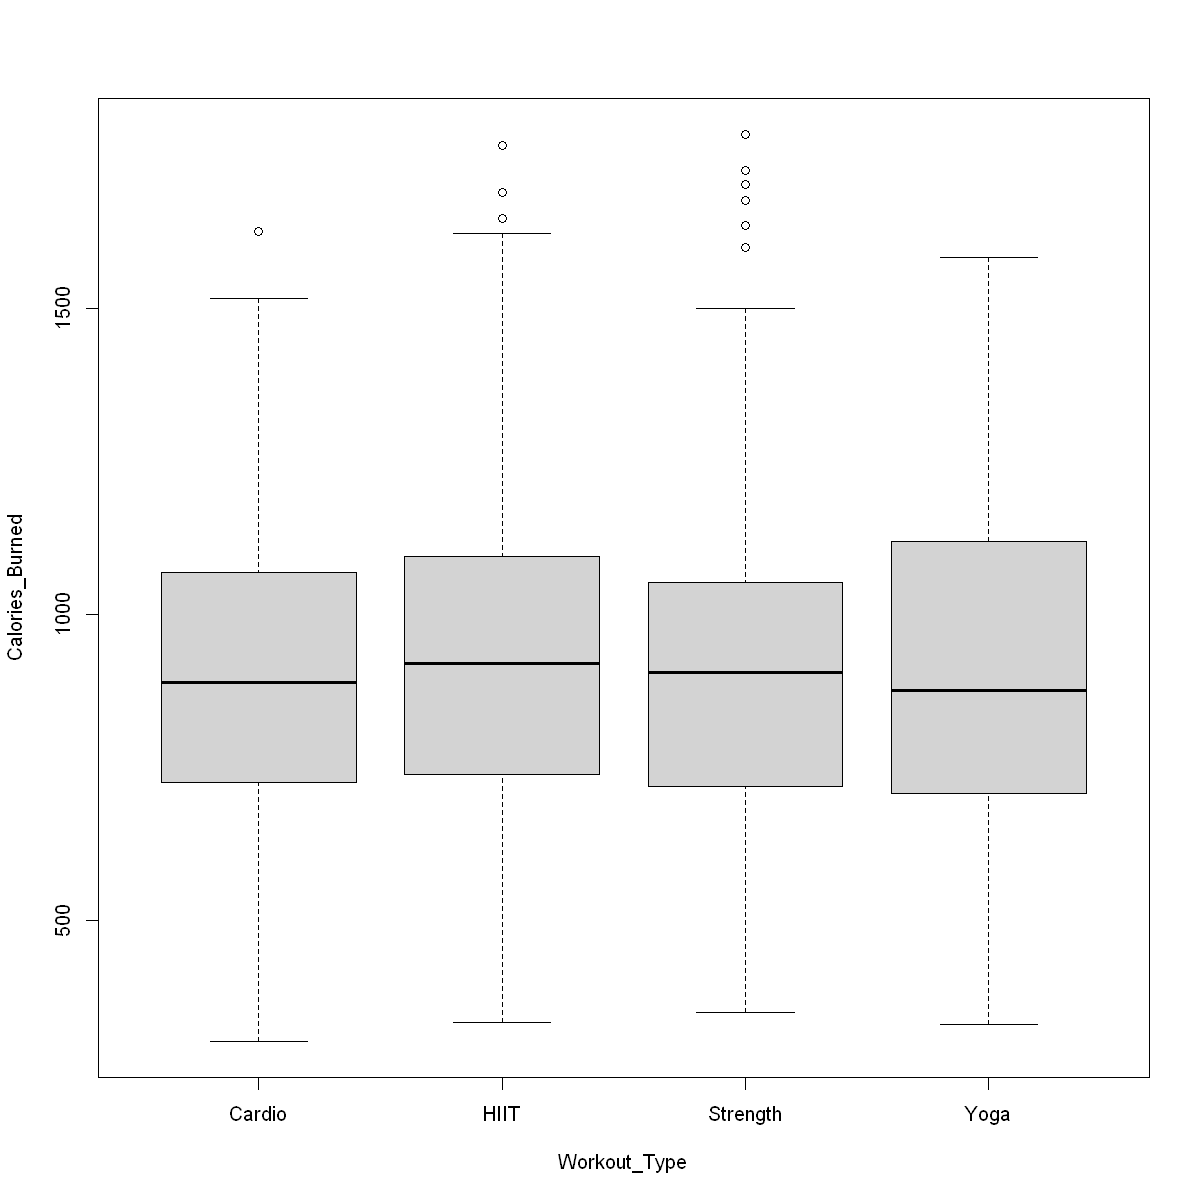

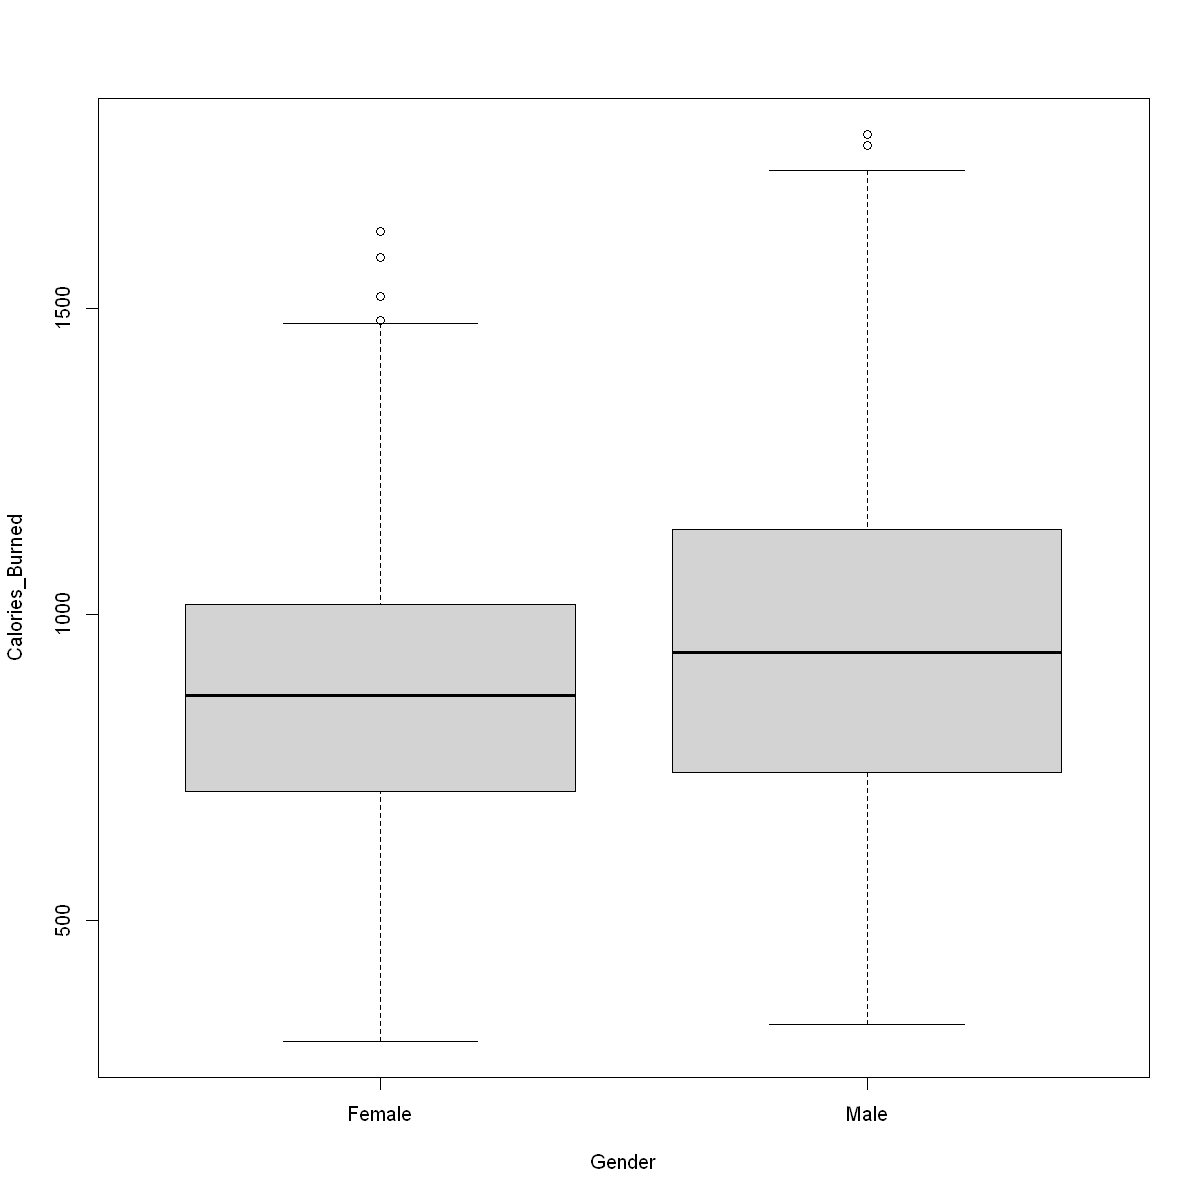

In [22]:
boxplot(Calories_Burned ~ Workout_Type, data = gym)
boxplot(Calories_Burned ~ Gender, data = gym)

Comment l'interpréter : 
- Si les médianes diffèrent beaucoup → possible effet de la quali sur la quanti.
- Si les boîtes sont très différentes en forme ou en taille → distributions différentes (hétérogénéité).

Le type de Workout ne semble pas beaucoup influencer le nombre de calories brulées. Par contre, le nombre de calories brulées semble varier selon le genre.


On peut aussi faire un violin plot qui est une extension du boxplot qui montre aussi la densité des données

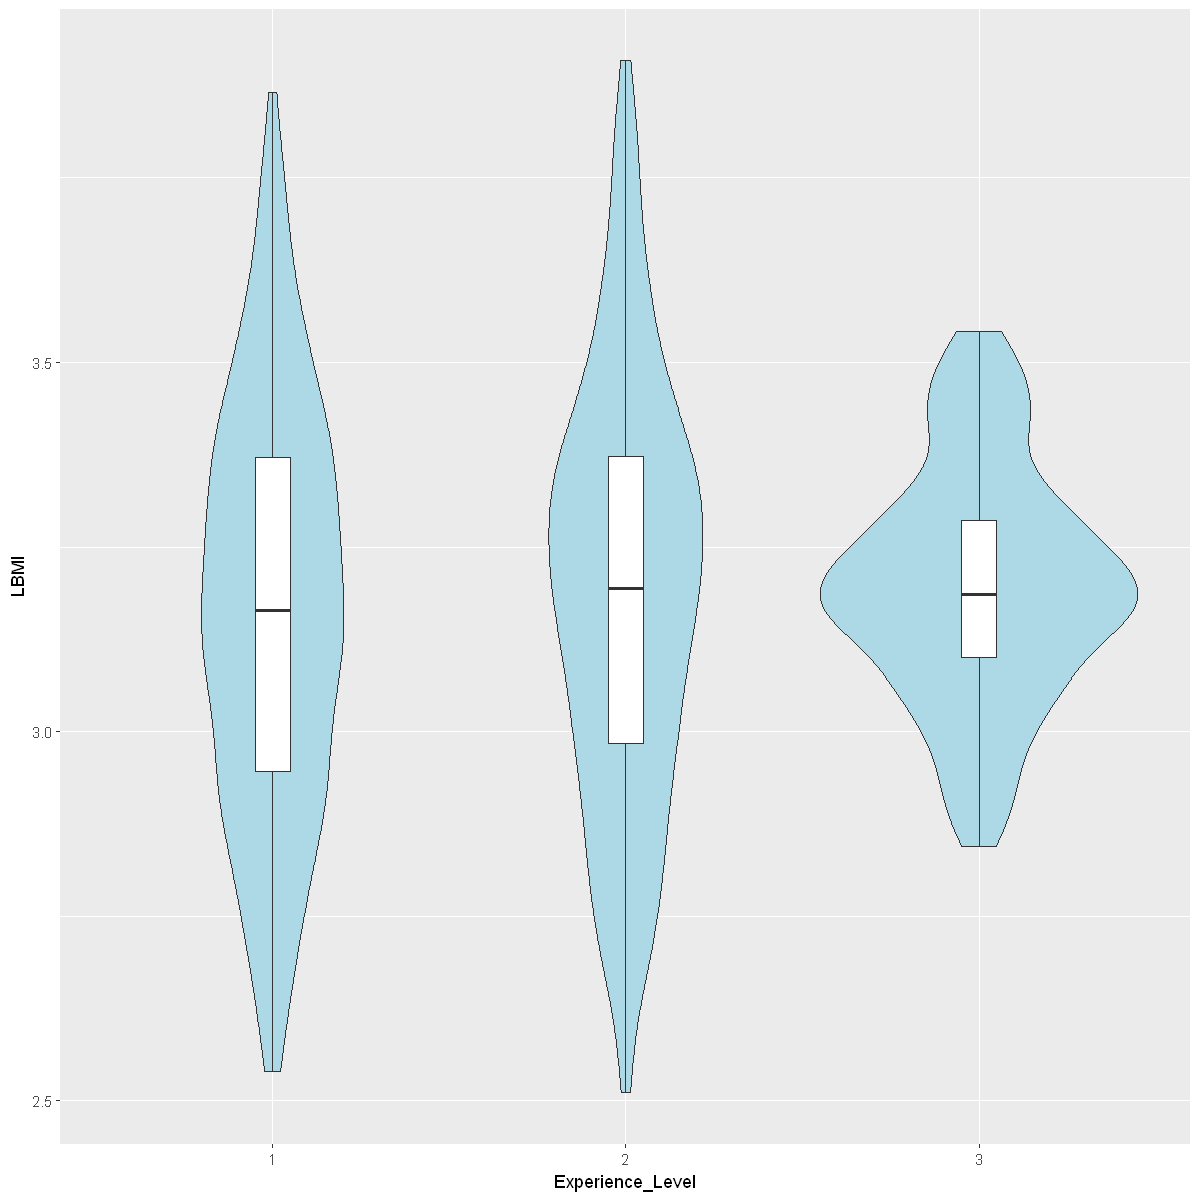

In [23]:
ggplot(gym, aes(x = Experience_Level, y = LBMI)) +
  geom_violin(fill = "lightblue") + geom_boxplot(width = 0.1)

Comment l'interpréter : 
- idem que pour les boxplots 
- Les zones plus larges montrent où les données sont plus concentrées
- on peut voir si les distributions sont symétriques ou biaisées, ou s’il y a des pics multiples

On peut aussi afficher les moyennes et écarts-types par groupe afin de résumer numériquement la distribution de la variable quantitative pour chaque modalité de la variable qualitative.

In [24]:
aggregate(Calories_Burned ~ Experience_Level, data = gym, FUN = function(x) c(mean = mean(x), sd = sd(x)))


Experience_Level,Calories_Burned
<fct>,"<dbl[,2]>"
1,"726.3750, 227.3433"
2,"901.9187, 152.6454"
3,"1265.3403, 186.8345"


Comment l'interpréter : 
- Si les moyennes sont très différentes → effet probable du facteur.
- Si les écarts-types varient → variance inégale entre groupes (important à noter pour choisir les tests).

In [25]:
#Pour la partie quanti / quali j'ai pas eu le temps de tester beaucoup de trucs j'ai juste mis les 3 tests les plus intéressants à faire.
#Par contre pour les autres comparaisons, tous les tests importants ont été faits et toutes les variables ont été passées en revu.

### 4. ACP

#### 4.1 Choix des axes principaux

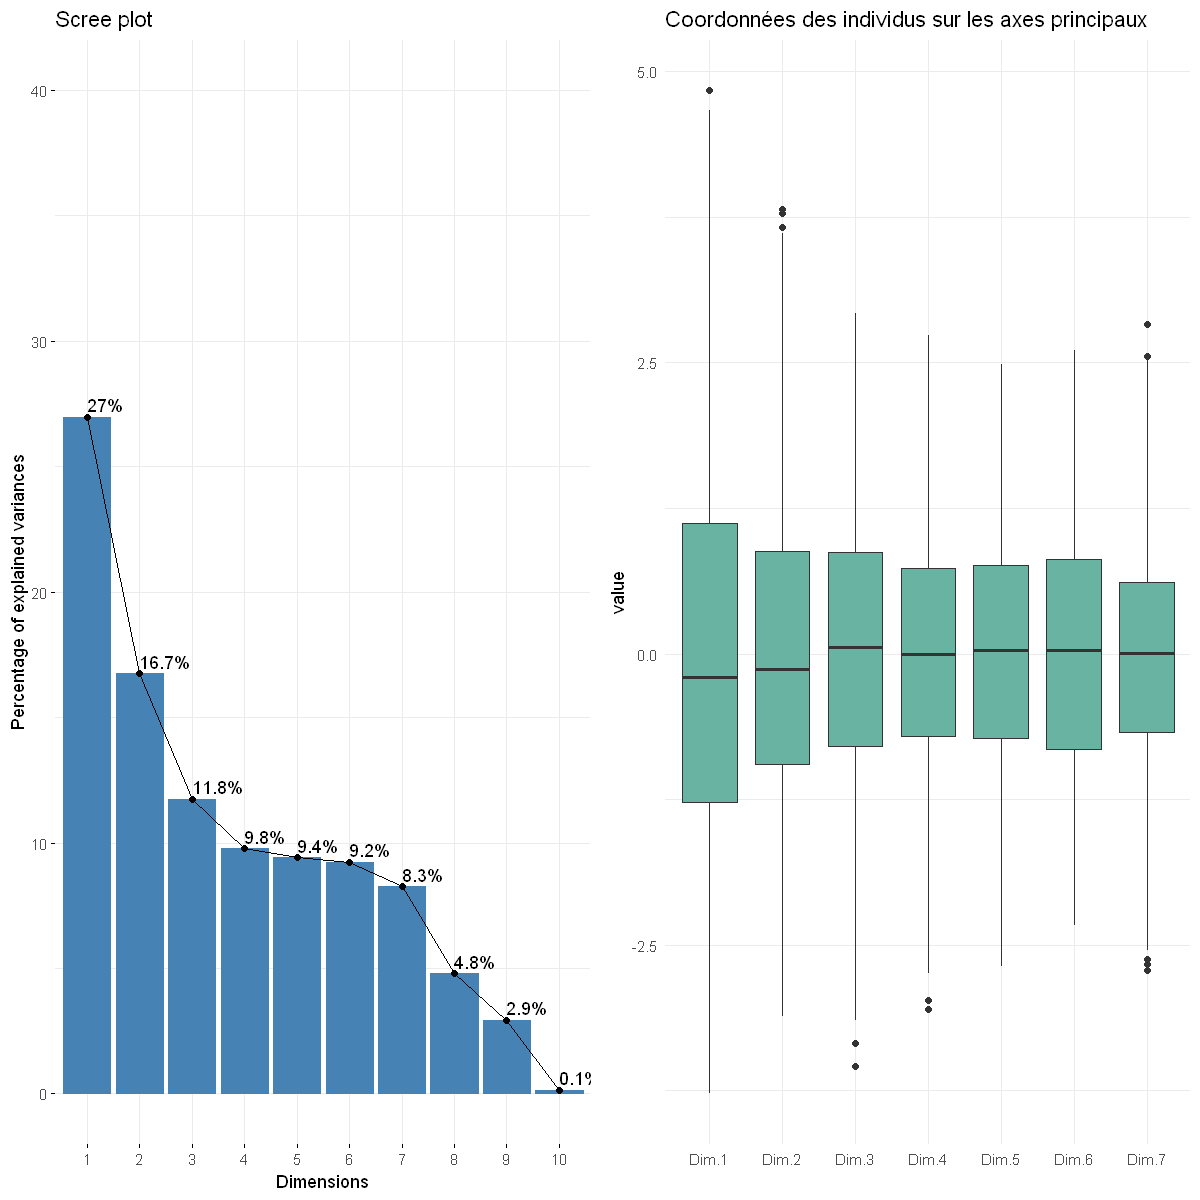

In [26]:
# Variables quantitatives à inclure dans l'ACP

# ACP
acp <- PCA(gym[, c(1,3:8,10,11,14,15)], scale.unit = TRUE, graph = FALSE, ncp = 7)

# Éboulis des valeurs propres
g1 <- fviz_eig(acp, addlabels = TRUE, ylim = c(0, 40))

# Boxplot des coordonnées des individus
g2 <- ggplot(melt(acp$ind$coord), aes(x = Var2, y = value)) +
  geom_boxplot(fill = "#69b3a2") +
  xlab("") +
  theme_minimal() +
  ggtitle("Coordonnées des individus sur les axes principaux")

# Affichage côte à côte
grid.arrange(g1, g2, ncol = 2)


D'après le graphique "Scree plot" nous savons que les 4 premières dimensions de notre ACP définissent 65.3% de la varaince (variance cumulée) ce qui est suffisant pour notre analyse. C’est un bon compromis entre réduction de dimension et information conservée. Nous garderons donc 4 composantes.

#### 4.2 Interprétation des Axes 

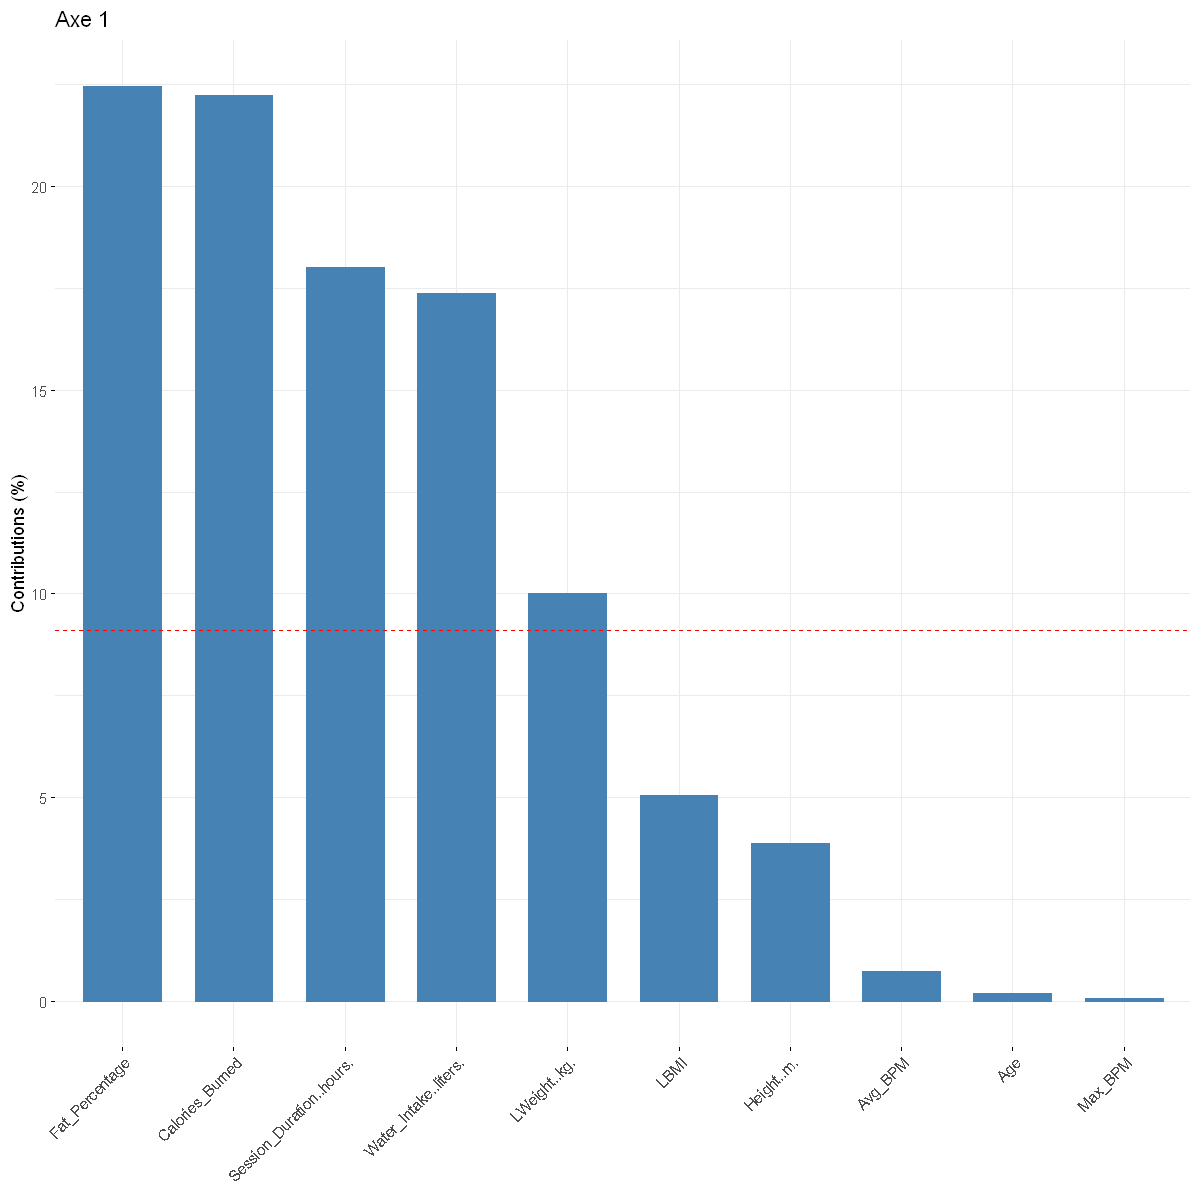

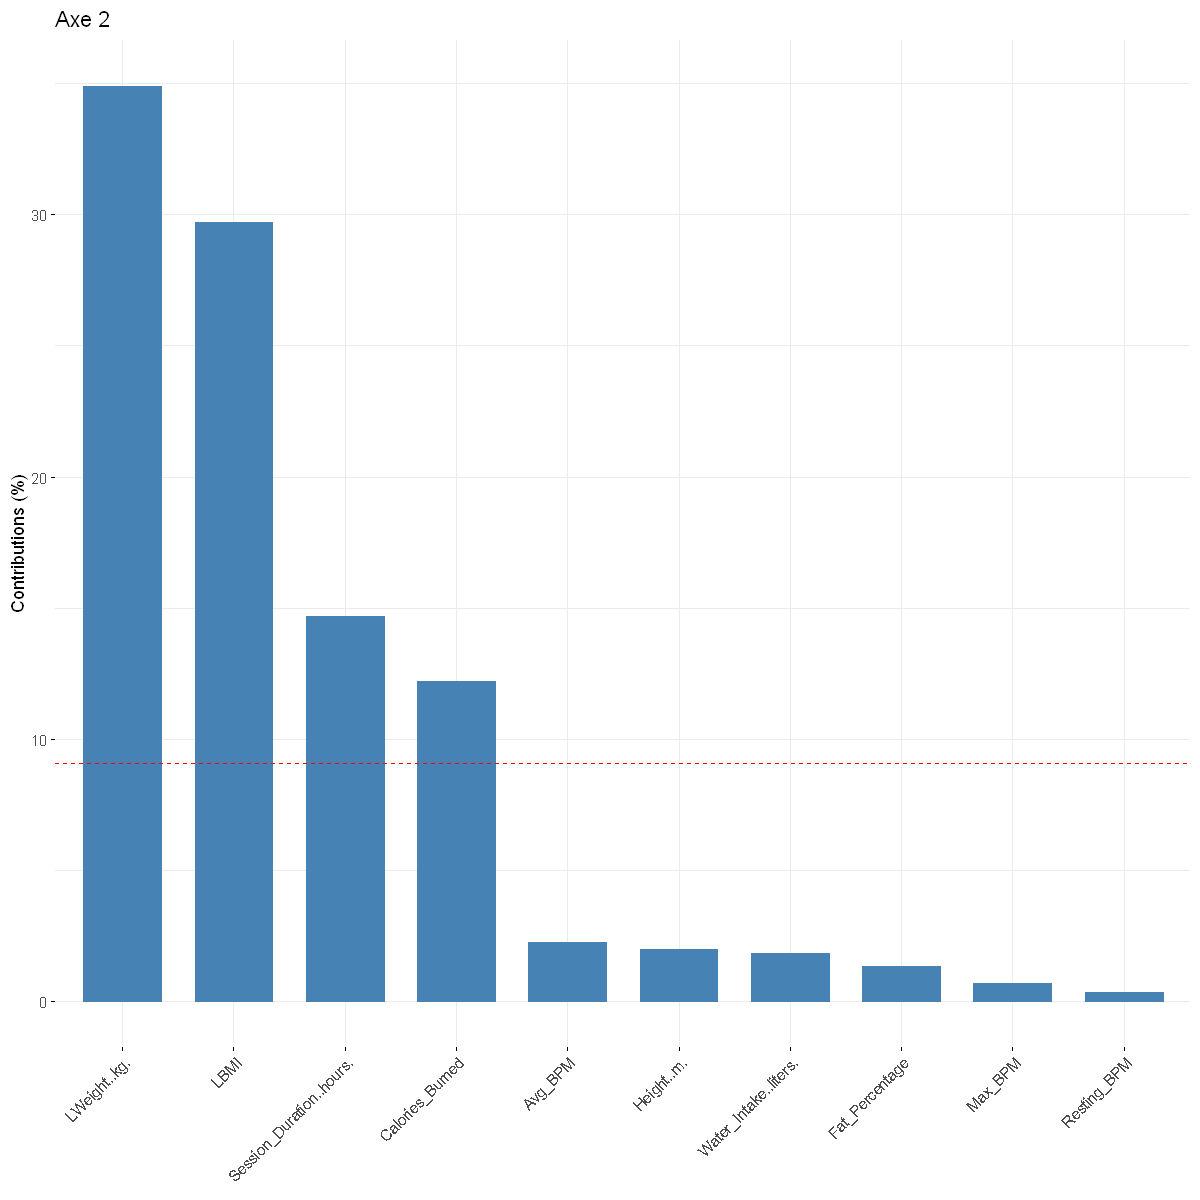

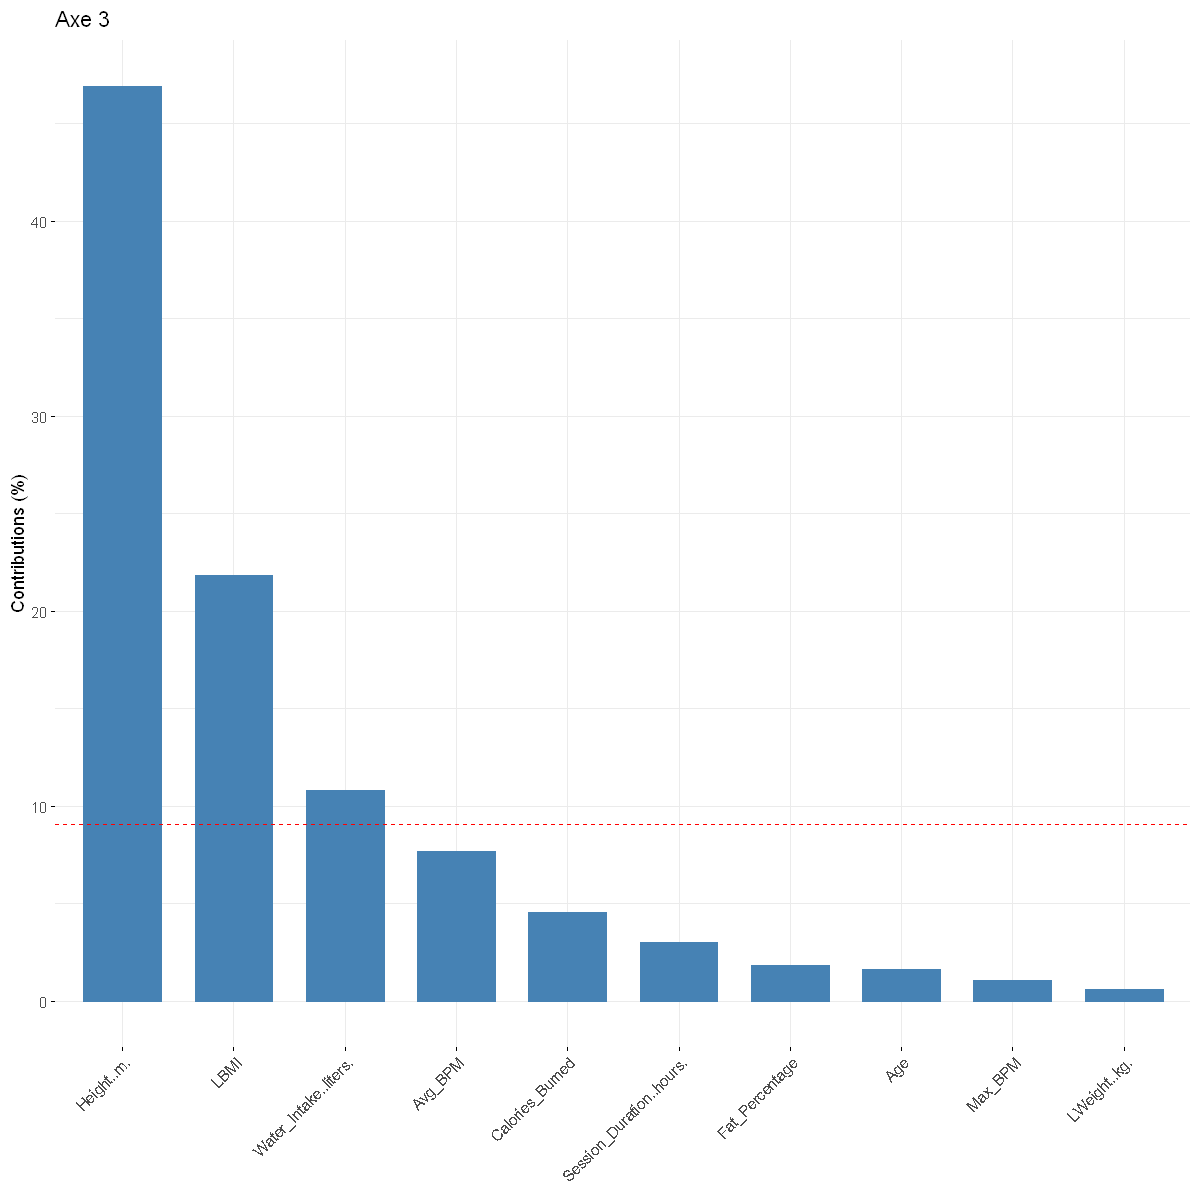

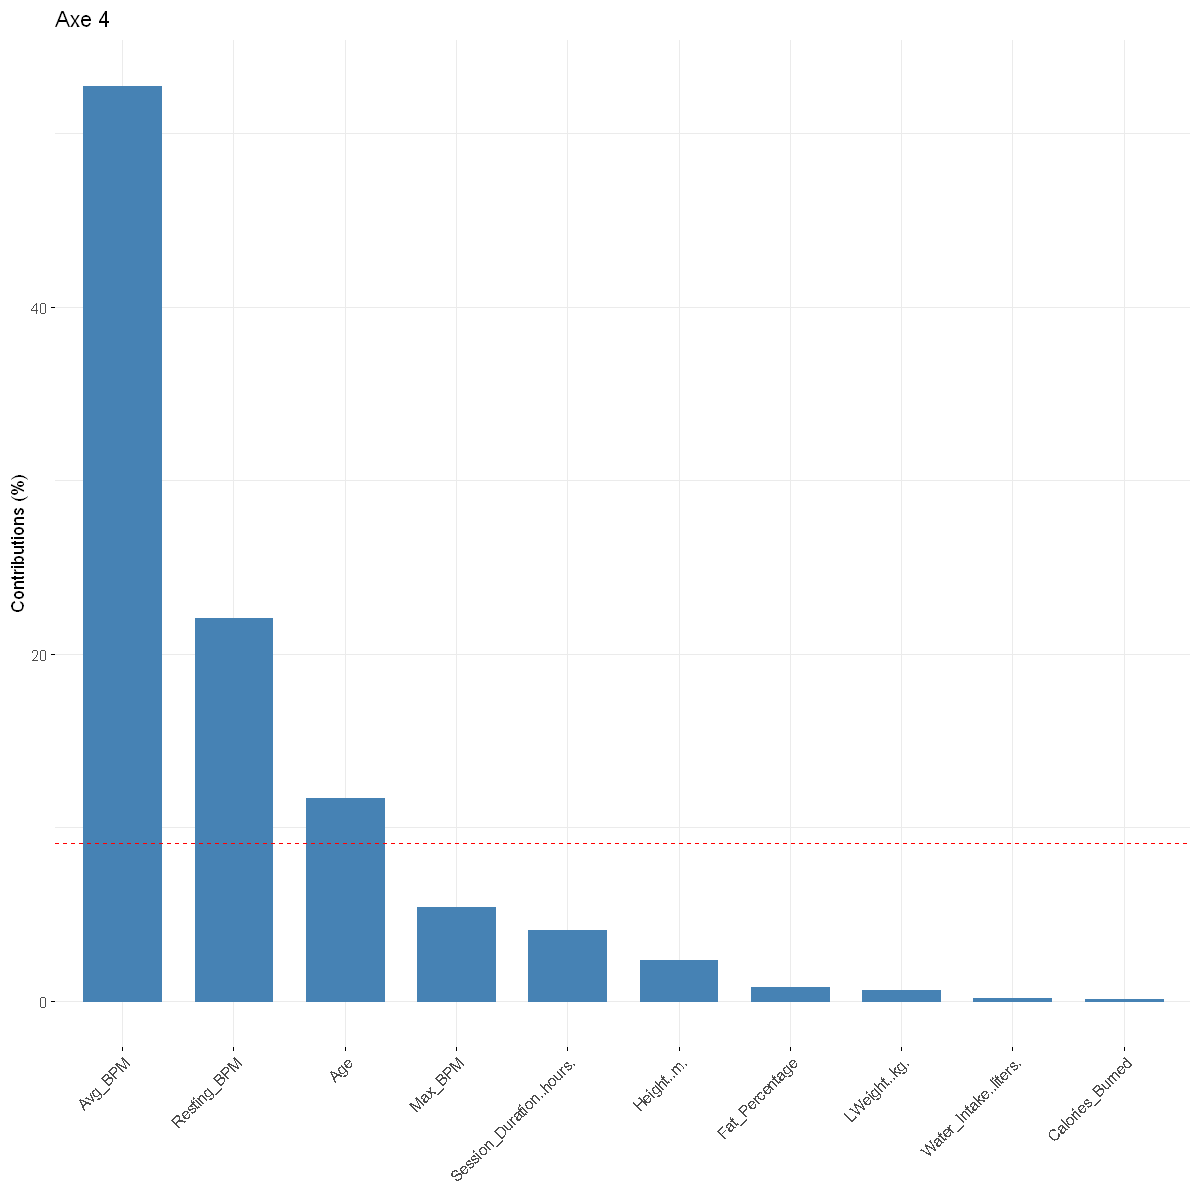

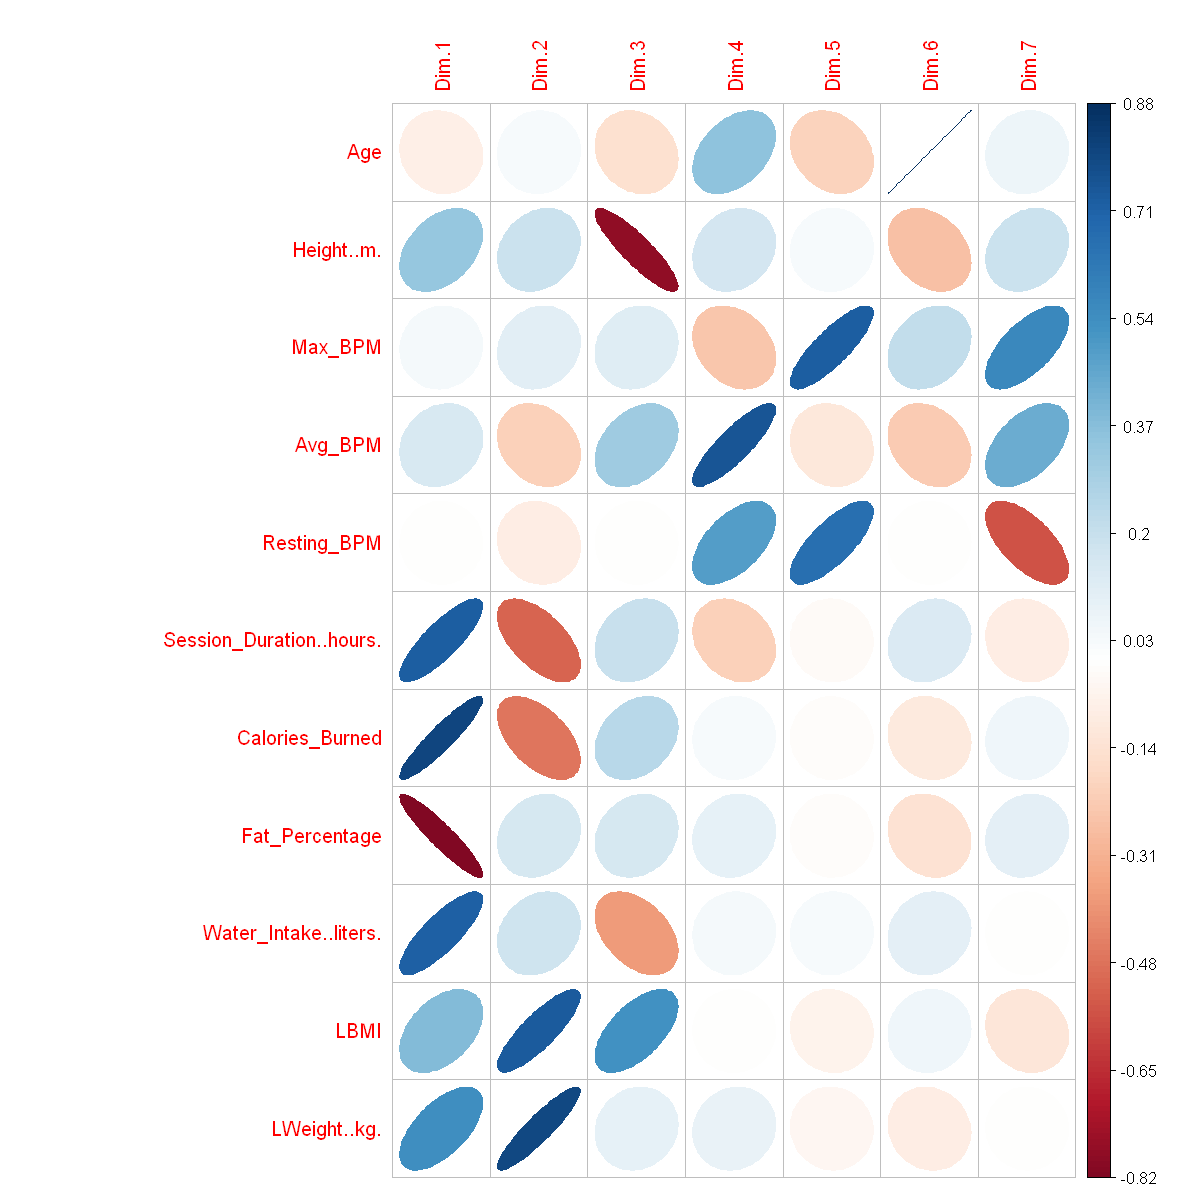

In [27]:
# Contributions des variables à chaque axe
fviz_contrib(acp, choice = "var", axes = 1, top = 10, title = "Axe 1")
fviz_contrib(acp, choice = "var", axes = 2, top = 10, title = "Axe 2")
fviz_contrib(acp, choice= "var", axes = 3, top = 10, title = "Axe 3")
fviz_contrib(acp, choice = "var", axes = 4, top = 10, title = "Axe 4")

# Corrélogramme des contributions des variables
corrplot(acp$var$cor, is.corr = FALSE, method = "ellipse")

Nous observons bien que chaque graphique peut être interpréter de la même facon que la matrice de corrélation :

* Axe 1 : Calories burned , fat pourcentage, session duration, Water intake, LWeight
* Axe 2 : LWeight, LBMI, Session duration, Calories Burned
* Axe 3 : Height, LBMI, WAter INtake
* Axe 4 : Avg BPM, Resting BPM, Age

Les axes 1 et 2 sont très corrélés à Calories Burned

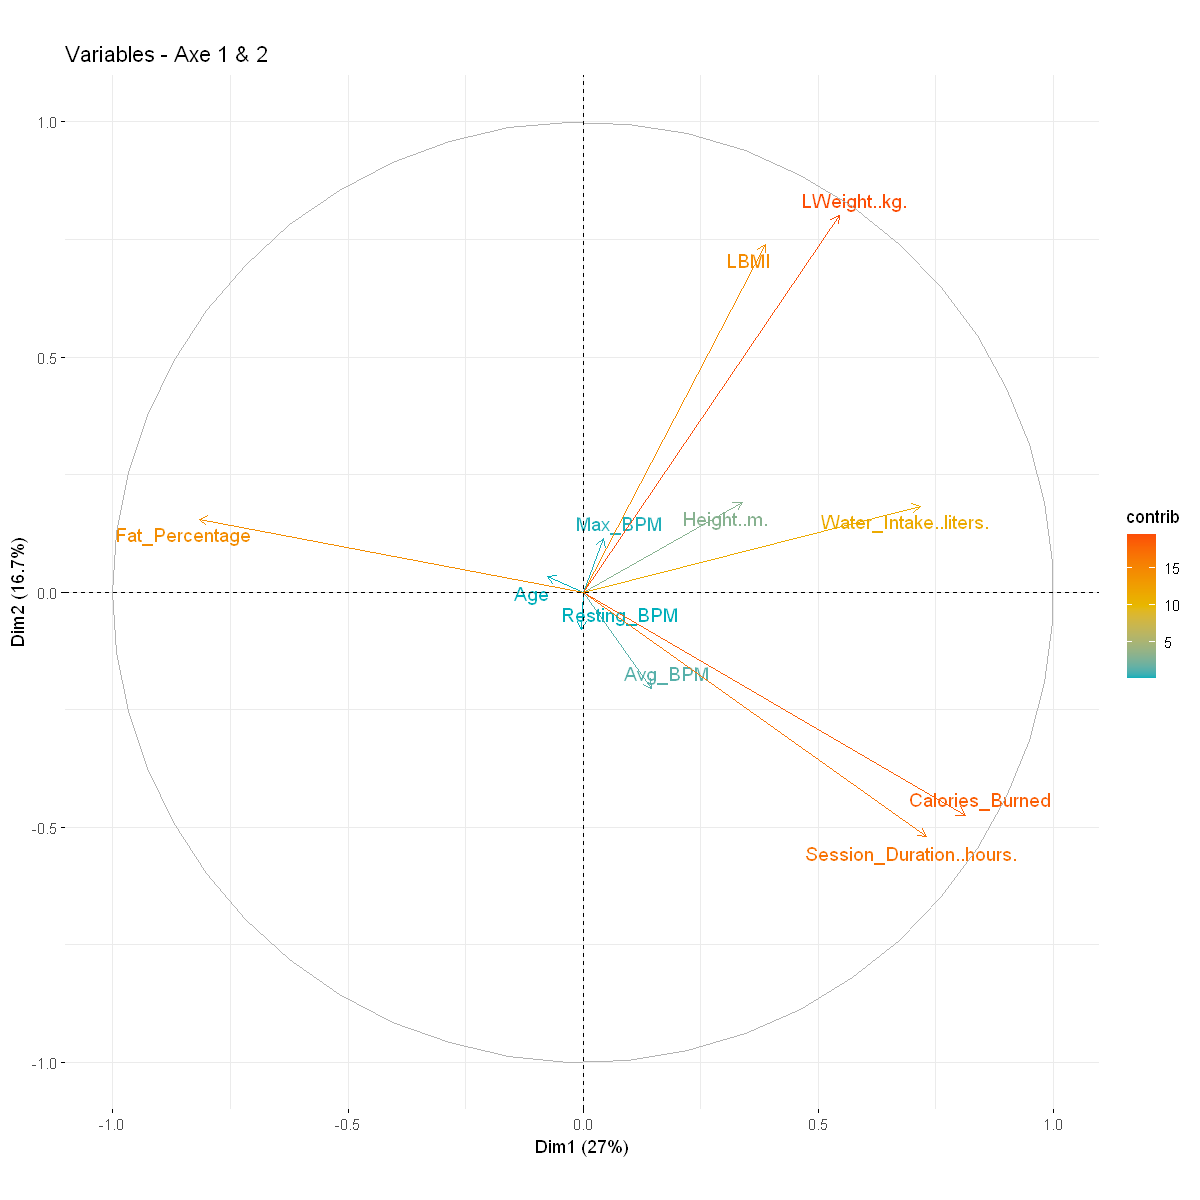

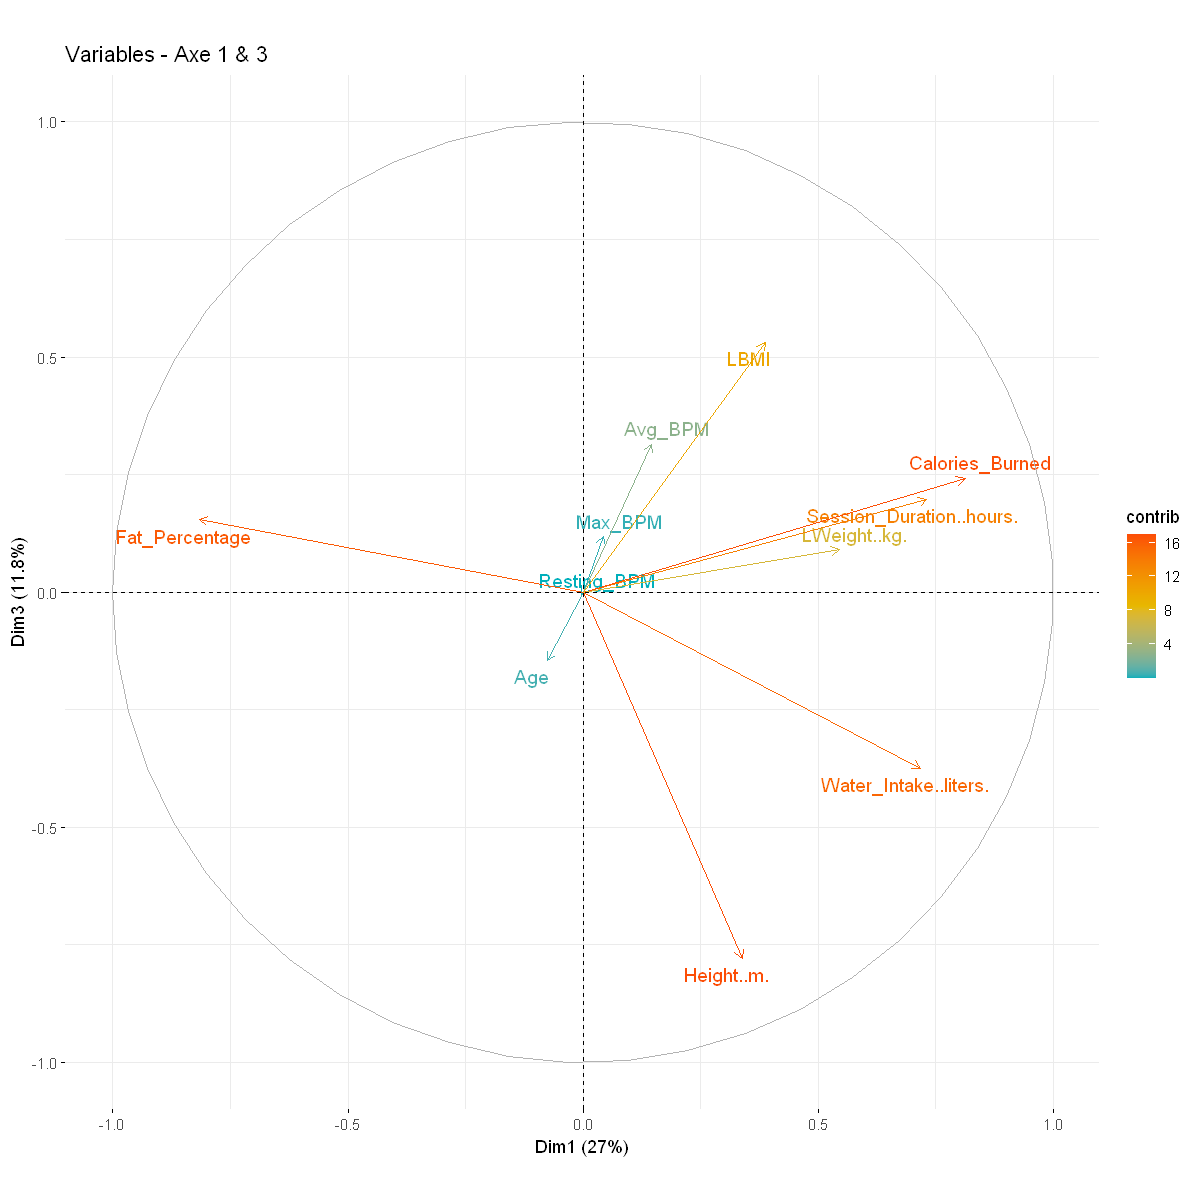

In [28]:
# Variables : plan factoriel 1-2 (par défaut)
fviz_pca_var(acp, col.var = "contrib", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE, title = "Variables - Axe 1 & 2")


# Variables sur le plan 1-3
fviz_pca_var(acp, axes = c(1,3), col.var = "contrib", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE, title = "Variables - Axe 1 & 3")


Explication :  

Analysons les dépendances éventuelles entre les variables à prédire (calories burned et Experience LEvel) et les variables explicatives : 

* Le nombre de calories brulées est positivement corrélé à la durée de la session et négativement corrélé au pourcentage de gras.Il est intéresant de noter que la taille et le poids ne dépendent pas des calories brulées.

* Pour analyser le niveau d'experience, nous habillons les graphes des individus de l'ACP selon le niveau d'expérience ci dessous.


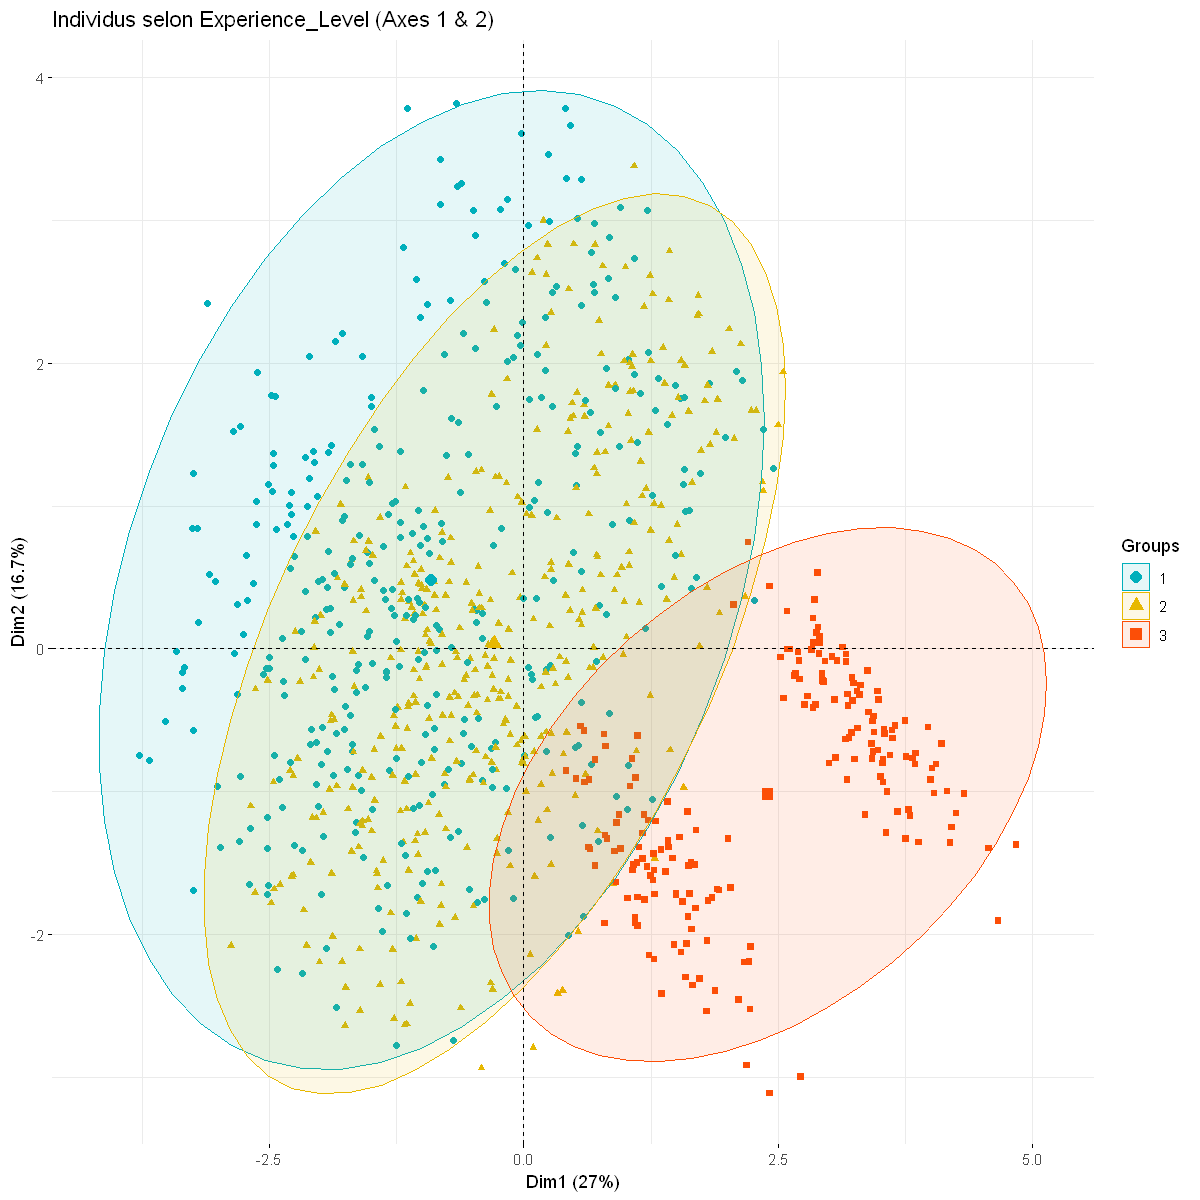

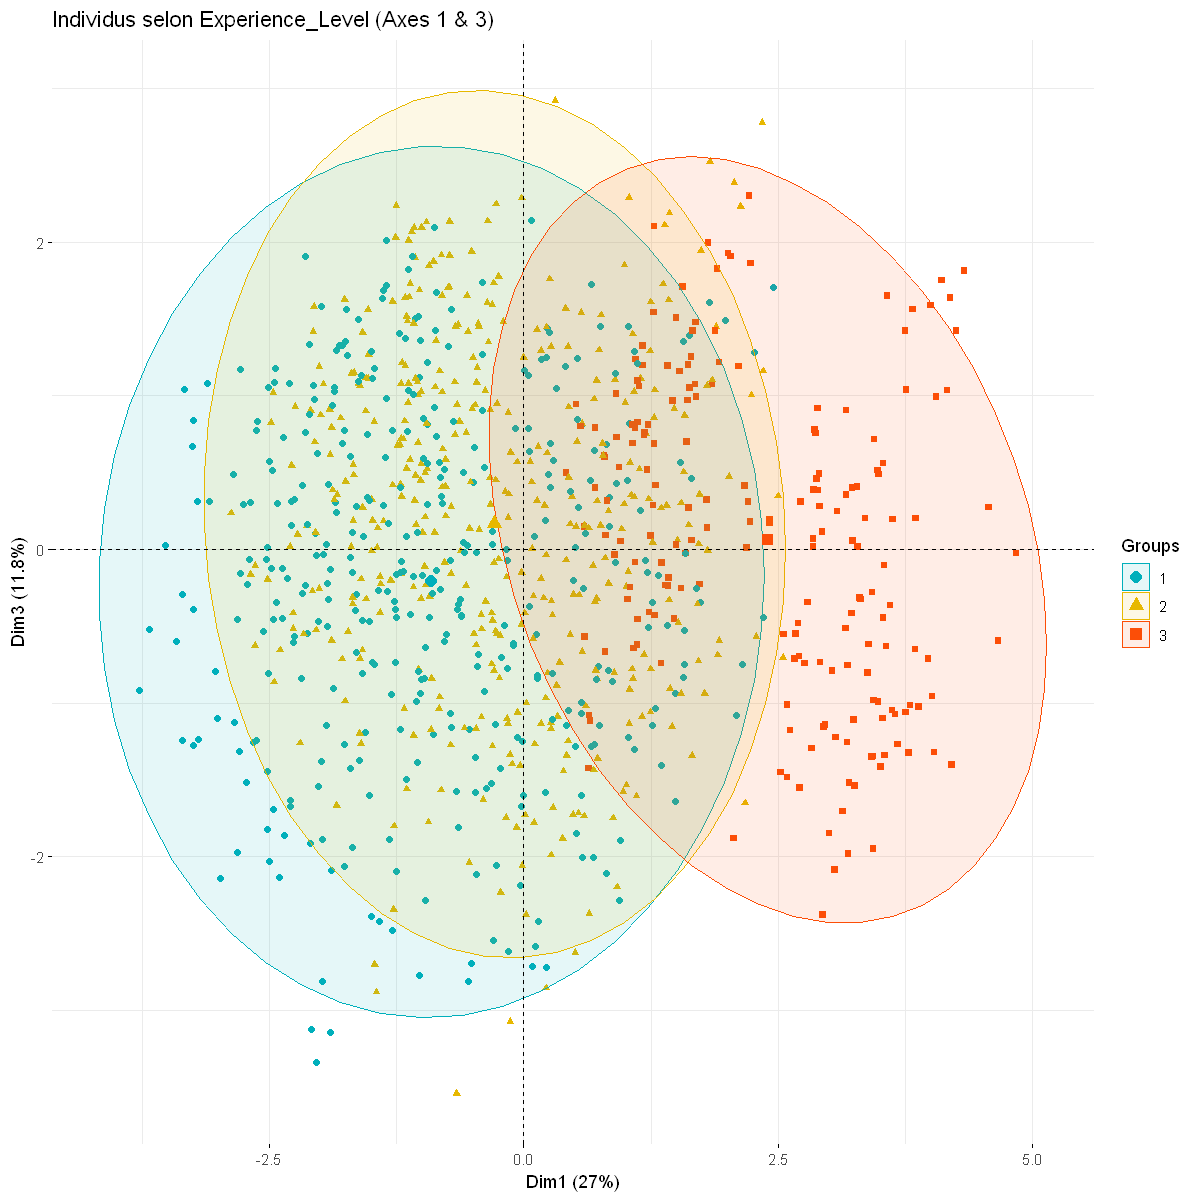

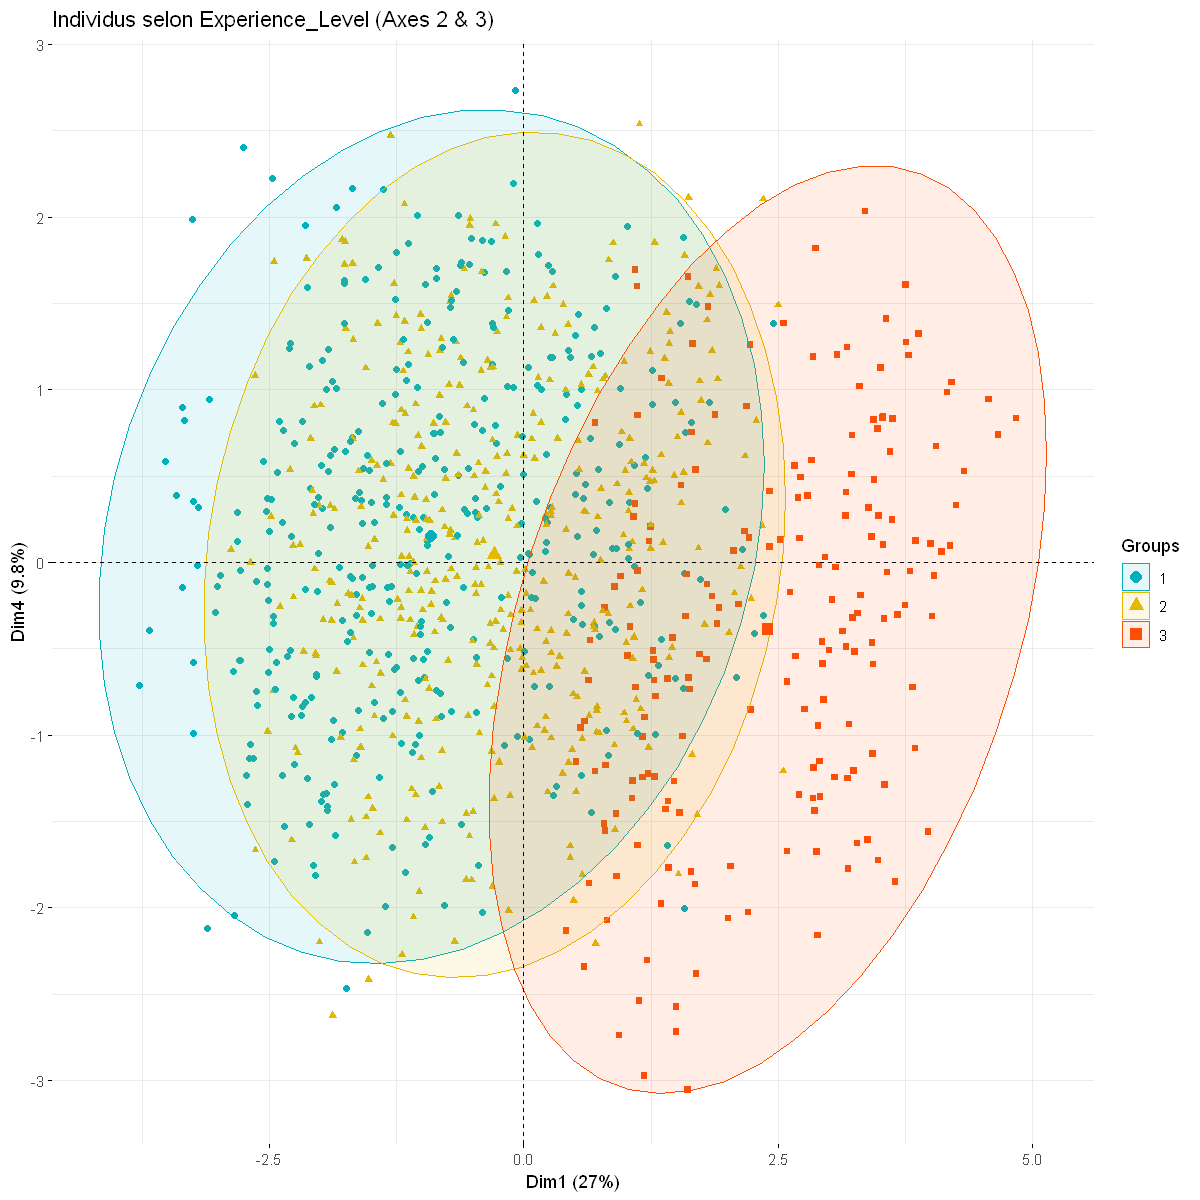

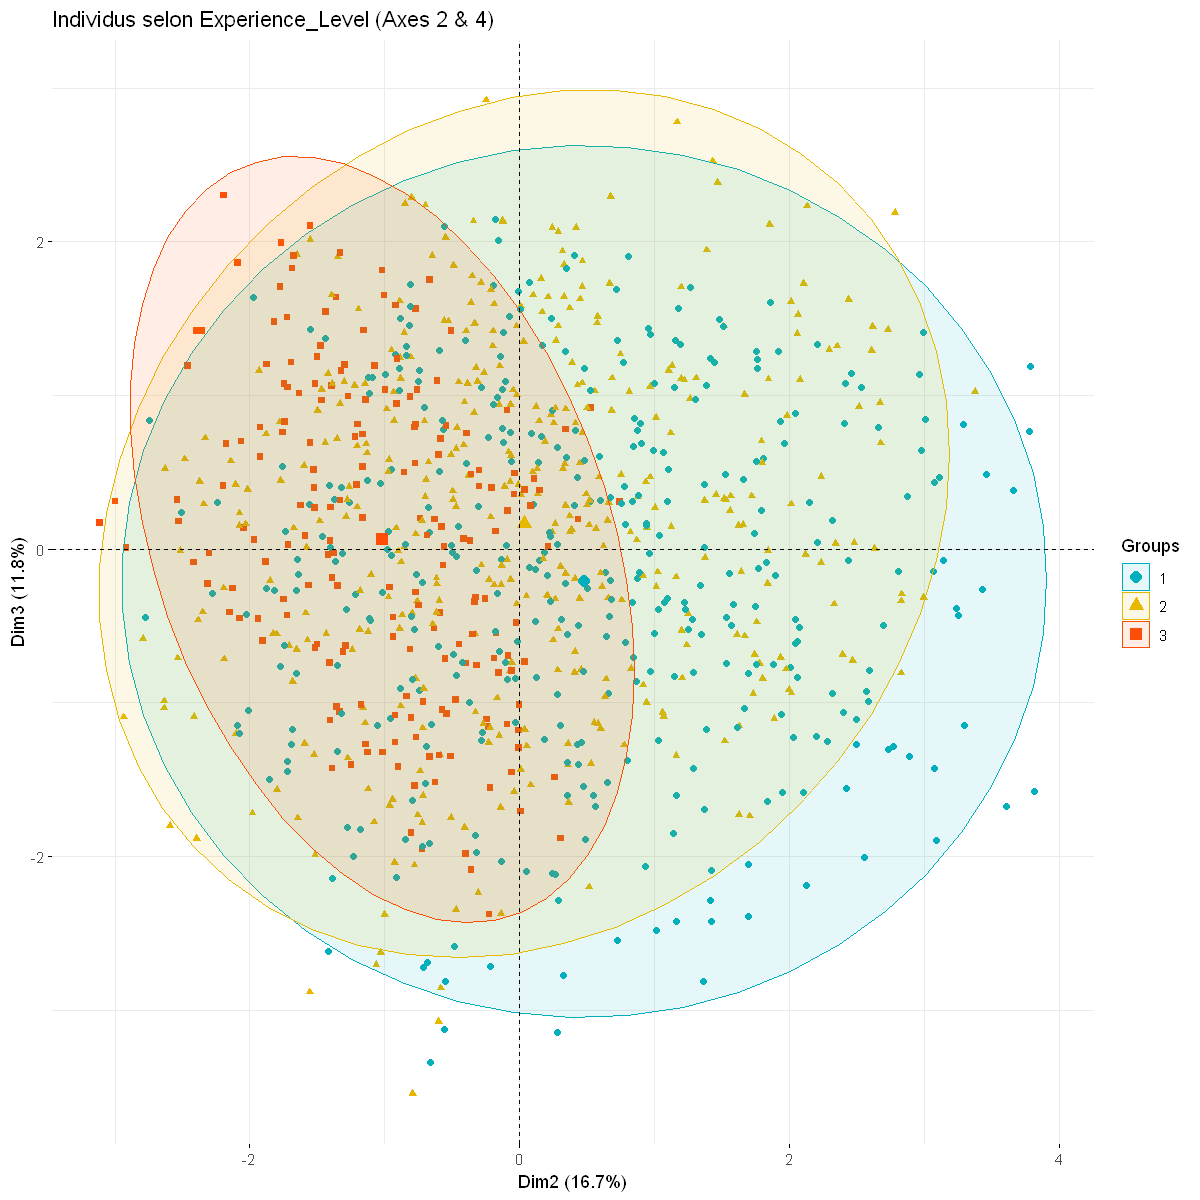

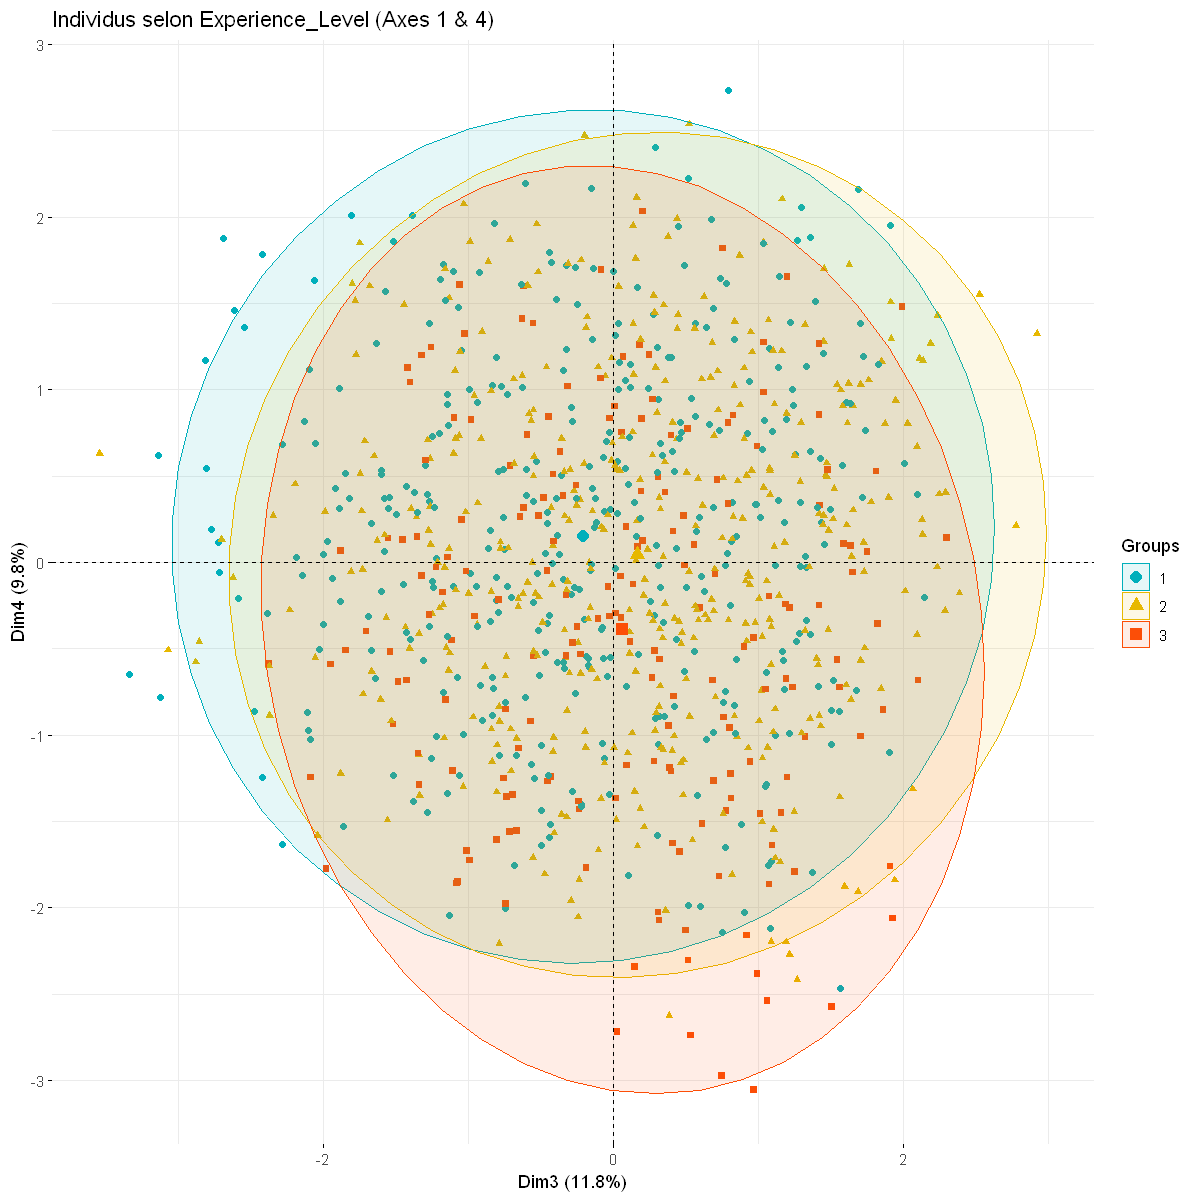

In [29]:
fviz_pca_ind(acp,
             label = "none",
             habillage = as.factor(gym$Experience_Level),
             addEllipses = TRUE,
             axes = c(1,2),
             palette = c("#00AFBB", "#E7B800", "#FC4E07"),
             title = "Individus selon Experience_Level (Axes 1 & 2)")

fviz_pca_ind(acp,
             label = "none",
             habillage = as.factor(gym$Experience_Level),
             addEllipses = TRUE,
             axes = c(1,3),
             palette = c("#00AFBB", "#E7B800", "#FC4E07"),
             title = "Individus selon Experience_Level (Axes 1 & 3)")

fviz_pca_ind(acp,
             label = "none",
             habillage = as.factor(gym$Experience_Level),
             addEllipses = TRUE,
             axes = c(1,4),
             palette = c("#00AFBB", "#E7B800", "#FC4E07"),
             title = "Individus selon Experience_Level (Axes 2 & 3)")

fviz_pca_ind(acp,
             label = "none",
             habillage = as.factor(gym$Experience_Level),
             addEllipses = TRUE,
             axes = c(2,3),
             palette = c("#00AFBB", "#E7B800", "#FC4E07"),
             title = "Individus selon Experience_Level (Axes 2 & 4)")

fviz_pca_ind(acp,
             label = "none",
             habillage = as.factor(gym$Experience_Level),
             addEllipses = TRUE,
             axes = c(3,4),
             palette = c("#00AFBB", "#E7B800", "#FC4E07"),
             title = "Individus selon Experience_Level (Axes 1 & 4)")



Sur les 2 premiers graphes, on peut voir que seule la dimension 1 peut nous permettre de séparer la classe 3 des deux autres classes. On peut donc interpréter que Experience_Level peut dépendre des variables explicatives de la dimension 1.La dimension 1 explique le niveau d'expérience.

<h1 style="color:red">II- Prédiction des Calories Brulées</h1>


Nous considérons maintenant le problème de la prédiction la variable Calories_Burned à partir des autres
variables du point de vue de l’apprentissage automatique, c’est-à-dire en nous concentrant sur les performances
du modèle. L’objectif est de déterminer les meilleures performances que nous pouvons attendre, et les modèles
qui les atteignent. 

## 2.1 Division du jeu de données en un échantillon d'apprentissage et un échantillon test
Nous divisons le jeu de données en un échantillon d’apprentissage et un échantillon test. Nous prenons un 
pourcentage de 20% pour l’échantillon test. Pourquoi cette étape est-elle nécessaire lorsque nous nous
concentrons sur les performances des algorithmes ?


In [16]:
set.seed(235) # initialisation du générateur :  Fixe la graine aléatoire pour assurer la reproductibilité des résultats.
# Extraction des échantillons
test.ratio <- .2   # part de l'échantillon test, ici 20%
npop <- nrow(gym) # nombre de lignes dans les données (nbr d'individus)
nvar <- ncol(gym) # nombre de colonnes (nbr de variables)
# taille de l'échantillon test
ntest <- ceiling(npop * test.ratio) #Calcule le nombre d’individus dans l’échantillon de test. Ceiling() arrondit à l’entier supérieur pour garantir un effectif entier.
# indices de l'échantillon test
testi <- sample(1:npop, ntest) #Tire au hasard ntest indices parmi 1:npop (toutes les lignes du dataset). testi contient donc les indices des individus sélectionnés pour le test. En gros, il tire au hasard 20% des individus
# indices de l'échantillon d'apprentissage
appri <- setdiff(1:npop, testi) #etdiff(1:npop, testi) renvoie toutes les lignes qui ne sont pas dans testi, donc celles pour l'apprentissage.

In [17]:
# construction de l'échantillon d'apprentissage
datappr0 <- gym[appri, ] 
# construction de l'échantillon test
datestr0 <- gym[testi, ] 
# vérification
str(datappr0)
str(datestr0)
#summary(datappr0) 

'data.frame':	778 obs. of  15 variables:
 $ Age                          : int  56 46 32 38 56 36 40 28 28 41 ...
 $ Gender                       : Factor w/ 2 levels "Female","Male": 2 1 1 2 1 2 1 2 2 2 ...
 $ Height..m.                   : num  1.71 1.53 1.66 1.79 1.68 1.72 1.51 1.94 1.84 2 ...
 $ Max_BPM                      : int  180 179 167 188 168 174 189 185 169 179 ...
 $ Avg_BPM                      : int  157 151 122 158 156 169 141 127 136 136 ...
 $ Resting_BPM                  : int  60 66 54 68 74 73 64 52 64 69 ...
 $ Session_Duration..hours.     : num  1.69 1.3 1.11 0.64 1.59 1.49 1.27 1.03 1.08 1.18 ...
 $ Calories_Burned              : num  1313 883 677 556 1116 ...
 $ Workout_Type                 : Factor w/ 4 levels "Cardio","HIIT",..: 4 2 1 3 2 1 1 3 1 2 ...
 $ Fat_Percentage               : num  12.6 33.9 33.4 29.2 15.5 21.3 30.6 28.9 29.7 27.6 ...
 $ Water_Intake..liters.        : num  3.5 2.1 2.3 2.8 2.7 2.3 1.9 2.6 2.7 3.7 ...
 $ Workout_Frequency..days.week.:

On normalise l'échantillon d'apprentissage et de test pour Éviter le déséquilibre entre les variables : Certaines variables comme Height..m. (de l'ordre de 1-2) et Calories_Burned (de l'ordre de centaines ou milliers) ont des échelles très différentes
Cela permet aussi d'améliorer la convergence de certains algorithmes (SVM, réseaux de neurones ou reg logistique par exemple) et d'améliorer les performances.

On ne normalise pas les variables quali donc on va les exclure de la normalisation. On les exclut seulement de la normalisation mais pas des échantillons tests et apprentissages contrairement. Pour cela, on récupère les identifiants des colonnes de toutes les variables quali :



In [18]:
which(sapply(datappr0, is.factor))
cat("Calories_Burned : " ,which(colnames(datappr0) == "Calories_Burned"))

Gender                  Workout_Type 
                            2                             9 
Workout_Frequency..days.week.              Experience_Level 
                           12                            13

Calories_Burned :  8

In [19]:
#échantillon appr
datappr=datappr0

#on ne modifie pas les variables quali + calories brulées
datappr[,-c(2,8,9,12,13)]=scale(datappr0[,-c(2,8,9,12,13)])

# on normalise l'échantillon test 
# à l'aide des caractéristiques de l'échantillon d'apprentissage
datestr=datestr0
datestr[,-c(2,8,9,12,13)]=scale(datestr0[,-c(2,8,9,12,13)],
                            center=sapply(datappr0[,-c(2,8,9,12,13)],mean), # on centre avec les moyennes de l'échantillon d'apprentissage
                            scale=sapply(datappr0[,-c(2,8,9,12,13)],sd)) # on réduit avec les écart-types de l'échantillon d'apprentissage
summary(datappr)
summary(datestr)

      Age              Gender      Height..m.          Max_BPM        
 Min.   :-1.68603   Female:368   Min.   :-1.75705   Min.   :-1.73044  
 1st Qu.:-0.86543   Male  :410   1st Qu.:-0.82012   1st Qu.:-0.87212  
 Median : 0.03723                Median :-0.03934   Median : 0.07204  
 Mean   : 0.00000                Mean   : 0.00000   Mean   : 0.00000  
 3rd Qu.: 0.85783                3rd Qu.: 0.58528   3rd Qu.: 0.84454  
 Max.   : 1.67844                Max.   : 2.14683   Max.   : 1.61703  
    Avg_BPM          Resting_BPM       Session_Duration..hours.
 Min.   :-1.64966   Min.   :-1.64729   Min.   :-2.20804        
 1st Qu.:-0.87874   1st Qu.:-0.83521   1st Qu.:-0.60730        
 Median :-0.03774   Median :-0.02314   Median : 0.03299        
 Mean   : 0.00000   Mean   : 0.00000   Mean   : 0.00000        
 3rd Qu.: 0.87334   3rd Qu.: 0.78894   3rd Qu.: 0.55687        
 Max.   : 1.78442   Max.   : 1.60101   Max.   : 2.15761        
 Calories_Burned    Workout_Type Fat_Percentage    Wate

      Age              Gender      Height..m.         Max_BPM        
 Min.   :-1.68603   Female: 94   Min.   :-1.7570   Min.   :-1.73044  
 1st Qu.:-0.86543   Male  :101   1st Qu.:-0.8982   1st Qu.:-0.87212  
 Median : 0.20135                Median :-0.3517   Median :-0.09962  
 Mean   : 0.05617                Mean   :-0.0958   Mean   :-0.11855  
 3rd Qu.: 0.93989                3rd Qu.: 0.5072   3rd Qu.: 0.67287  
 Max.   : 1.67844                Max.   : 2.1468   Max.   : 1.61703  
    Avg_BPM          Resting_BPM       Session_Duration..hours.
 Min.   :-1.64966   Min.   :-1.64729   Min.   :-2.178932       
 1st Qu.:-0.87874   1st Qu.:-0.69987   1st Qu.:-0.665508       
 Median : 0.03234   Median : 0.11221   Median : 0.003891       
 Mean   : 0.07978   Mean   : 0.03517   Mean   :-0.032527       
 3rd Qu.: 1.01350   3rd Qu.: 0.78894   3rd Qu.: 0.585977       
 Max.   : 1.78442   Max.   : 1.60101   Max.   : 2.070296       
 Calories_Burned    Workout_Type Fat_Percentage     Water_Inta

On ajoute center et scale pour garantir que l’échantillon de test (datestr) est normalisé avec les mêmes moyennes et écarts-types que l’échantillon d’apprentissage (datappr0). Pourquoi ne pas utiliser les moyennes/écarts-types du test ? Parce que l’échantillon de test est censé être inconnu pendant l’apprentissage. Si on normalisait datestr avec ses propres moyennes et écarts-types, on introduirait une fuite de données qui fausserait la prédiction.

Avant de passer aux différents algorithmes, on définit une fonction tracant le graphe des résidus avec des couleurs et des échelles fixes sur les axes.

In [20]:
gplot.res <- function(x, y, titre = "titre") {
  ggplot(data.frame(x = x, y = y), aes(x, y)) +
    geom_point(col = "blue") +
    coord_cartesian(xlim = c(250, 1700), ylim = c(-155, 155)) +
    ylab("Résidus") +
    xlab("Valeurs prédites") +
    ggtitle(titre) +
    geom_hline(yintercept = 0, col = "red")}

##  2.2 Modèle linéaire (généralisé) avec/sans sélection de variables, avec/sans pénalisation


travail ensuite : Comparez les performances d’un modèle linéaire (éventuellement généralisé) avec/sans sélection de variables, avec/sans pénalisation, d’un SVR/SVM, d’un arbre optimal, d’une forêt aléatoire, du boosting,
et de réseaux de neurones. Justifiez vos choix (par exemple le noyau pour le SVR/SVM), et ajustez
soigneusement les hyperparamètres de chaque modèle (par validation croisée). Interprétez les résultats et
quantifiez l’amélioration éventuelle apportée par les modèles non linéaires.

### 2.2.1 sans sélection de variable

                               Df   Sum Sq  Mean Sq   F value   Pr(>F)    
Age                             1  1276747  1276747   868.731  < 2e-16 ***
Gender                          1  1396801  1396801   950.419  < 2e-16 ***
Height..m.                      1      130      130     0.088 0.766257    
Max_BPM                         1      321      321     0.219 0.640127    
Avg_BPM                         1  6885236  6885236  4684.891  < 2e-16 ***
Resting_BPM                     1    18071    18071    12.296 0.000481 ***
Session_Duration..hours.        1 47122528 47122528 32063.377  < 2e-16 ***
Workout_Type                    3     5711     1904     1.295 0.274876    
Fat_Percentage                  1     1552     1552     1.056 0.304412    
Water_Intake..liters.           1       37       37     0.025 0.873810    
Workout_Frequency..days.week.   3     2393      798     0.543 0.653113    
Experience_Level                2     3426     1713     1.166 0.312313    
LBMI                     

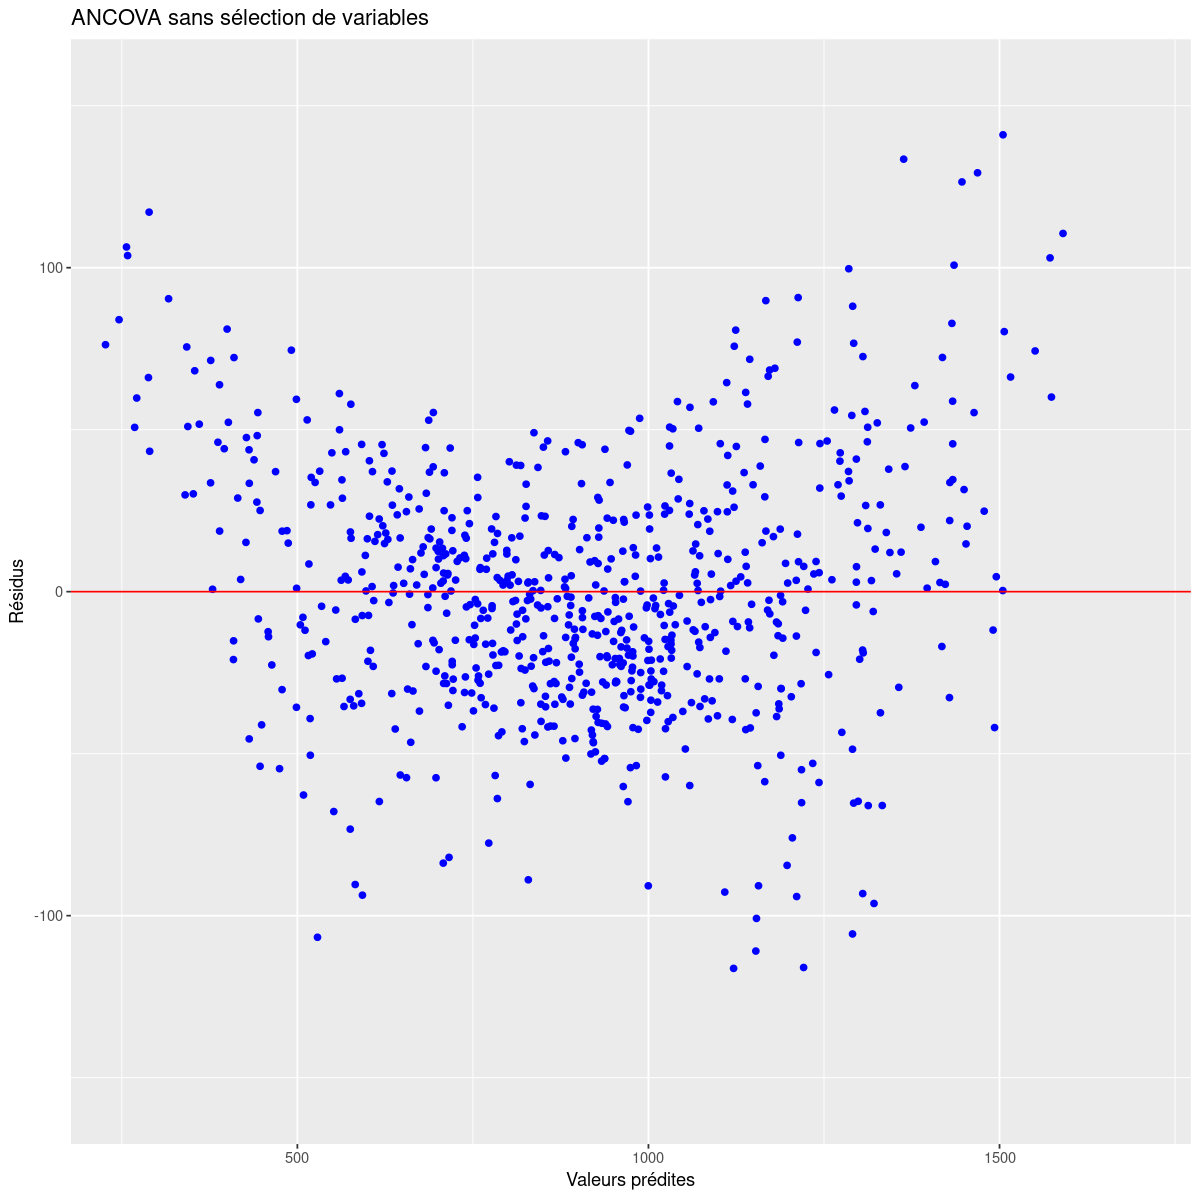

In [104]:
# estimation du modèle sans interaction
reg.lm <-aov(Calories_Burned ~ . , data = datappr)
# Extraction des résidus et des valeurs ajustées de ce modèle
res.lm <- reg.lm$residuals
fit.lm <- reg.lm$fitted.values
# Graphe des résidus.
gplot.res(fit.lm,res.lm,"ANCOVA sans sélection de variables")

summary(reg.lm)

Les résidus ne sont pas indépendants, car on observe une parabole.

### 2.2.2 Sélection de variable par régularisation L1 (LASSO)

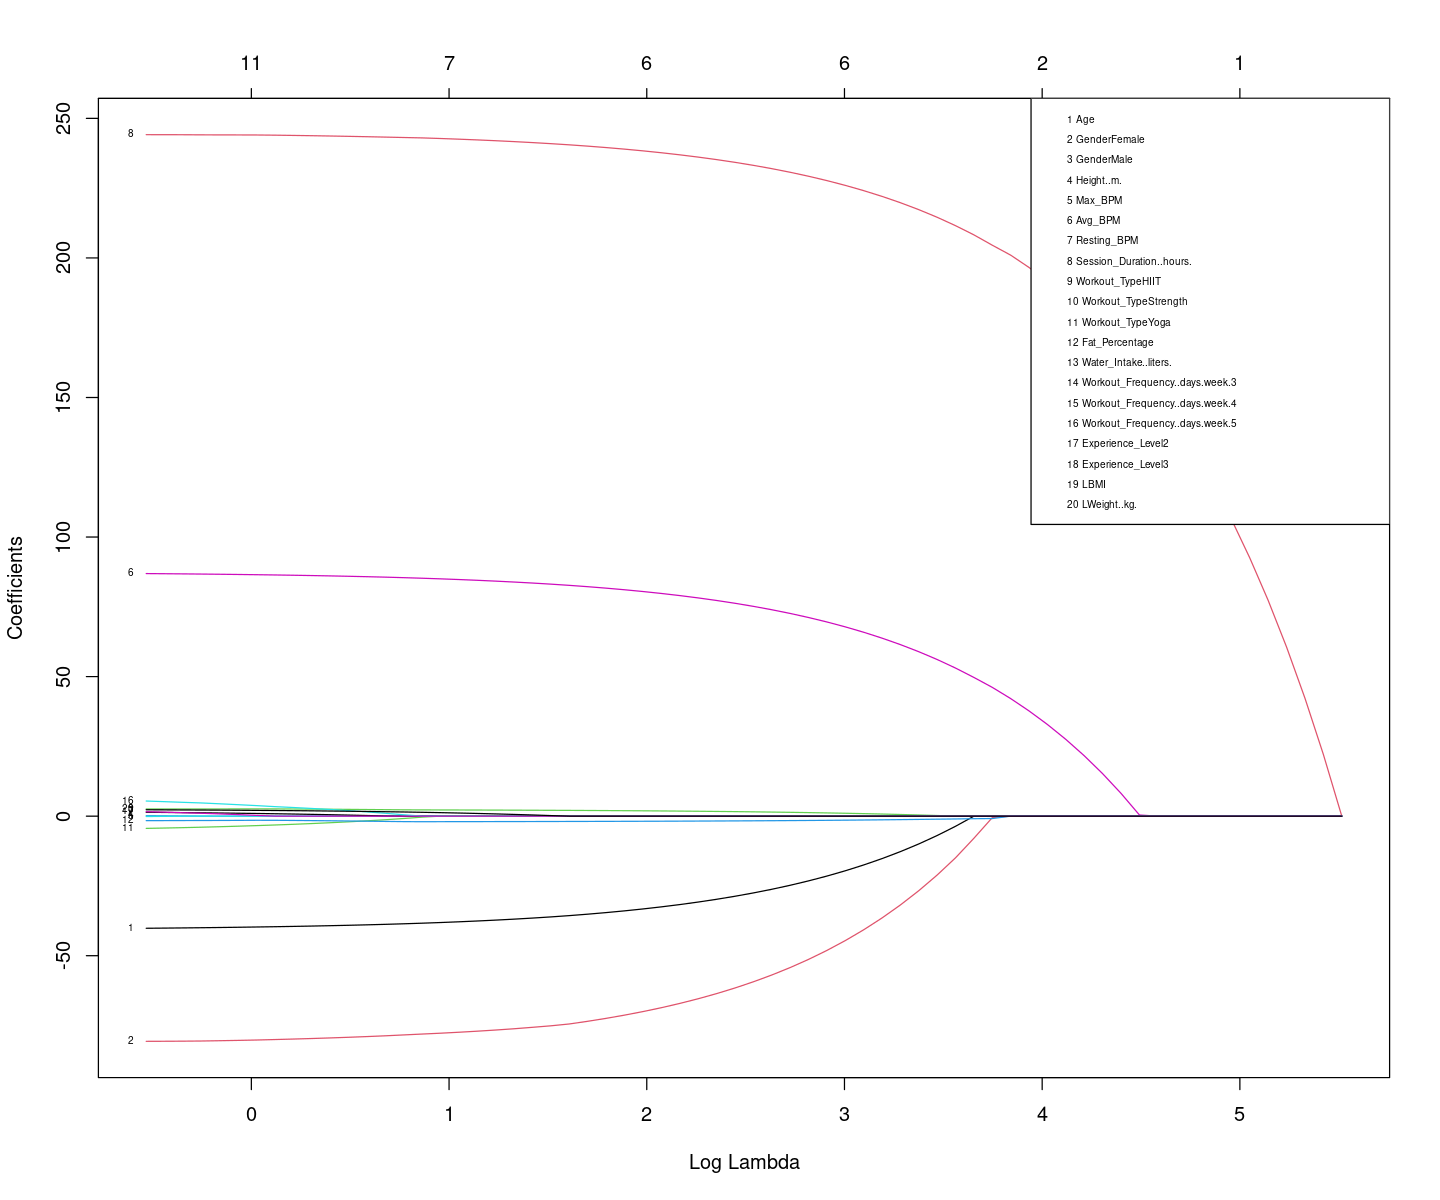

In [106]:
library(glmnet)
# avec des variables quantitatives seulement
reg.lasso.quanti <- glmnet(y = datappr[, 8],
                           x = as.matrix(datappr[, -c(2,8,9,12,13)]))


# avec toutes les variables, créer d'abord la matrice d'expériences
# avec 'model.matrix' (penser à retirer l'intercept du modèle en faisant -1)
x.mat <- model.matrix(Calories_Burned ~ . - 1, data = datappr)
reg.lasso <- glmnet(y = datappr$Calories_Burned, x = x.mat)
options(repr.plot.width = 12, repr.plot.height = 10)


plot(reg.lasso, xvar = "lambda", label = TRUE)
legend("topright",
       legend = paste(1:ncol(x.mat), colnames(x.mat)),
       cex = 0.5) 

Chaque ligne du graphique représente le coefficient estimé d’une variable dans le modèle.
Lambda est le paramètre de pénalisation (plus il est grand, plus les coefficients sont poussés vers zéro).

À gauche (lambda grand), beaucoup de coefficients sont nuls car pénalisation forte ➜ le modèle est simple 

À droite (lambda petit), plus de variables entrent dans le modèle car pénalisation faible (coefficients ≠ 0) ➜ modèles plus complexes.

Pour choisir le lambda optimal nous allons effectuer une validation croisée.

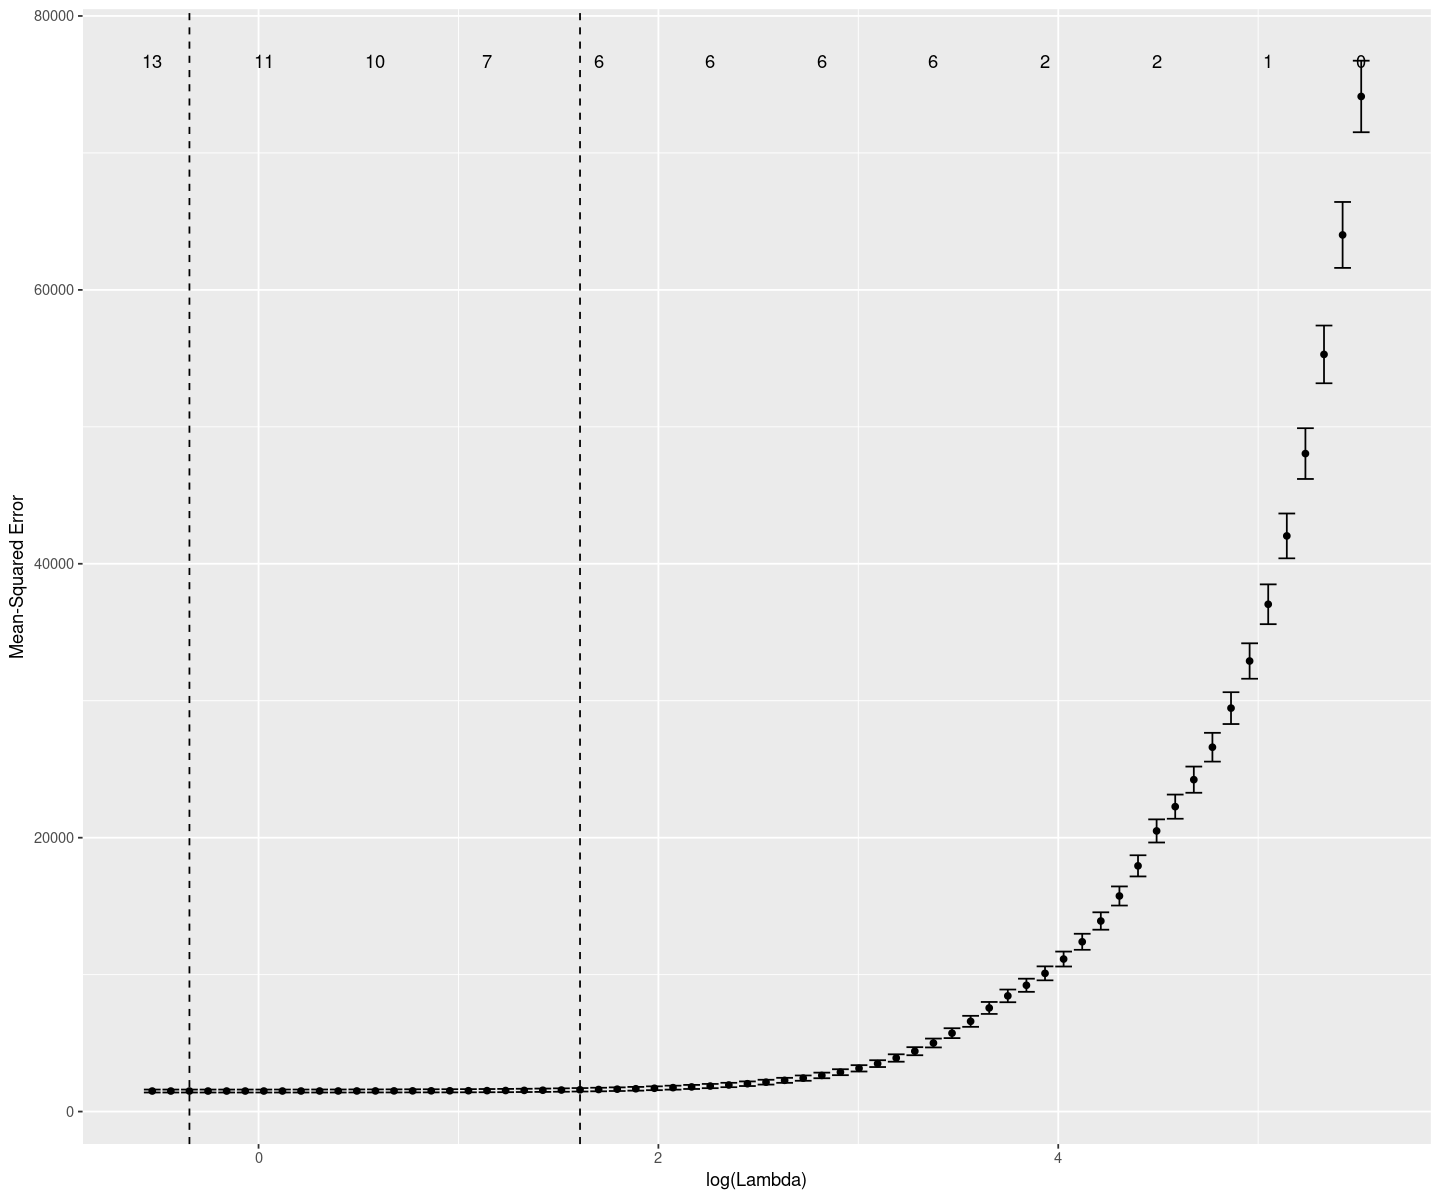

In [107]:
reg.lasso.cv<-cv.glmnet(y=datappr[,8],x=x.mat)
autoplot(reg.lasso.cv)

In [108]:
#LAMBDA LSE

#valeur estimée
paste("CV estimée de lambda :", round (reg.lasso.cv$lambda.1se, 3))
#modèle correspondant
coef(reg.lasso.cv,s="lambda.1se")

[1] "CV estimée de lambda : 4.993"

21 x 1 sparse Matrix of class "dgCMatrix"
                                       s1
(Intercept)                    940.718702
Age                            -35.640392
GenderFemale                   -74.463335
GenderMale                       2.064286
Height..m.                       .       
Max_BPM                          .       
Avg_BPM                         82.692356
Resting_BPM                      .       
Session_Duration..hours.       240.527551
Workout_TypeHIIT                 .       
Workout_TypeStrength             .       
Workout_TypeYoga                 .       
Fat_Percentage                  -1.900788
Water_Intake..liters.            .       
Workout_Frequency..days.week.3   .       
Workout_Frequency..days.week.4   .       
Workout_Frequency..days.week.5   .       
Experience_Level2                .       
Experience_Level3                .       
LBMI                             .       
LWeight..kg.                     .       

Le lambda LSE est celui qui sélectionne le moins de variables. Dans les variables seléctionnées nous retrouvons bien celles que nous avions analysées comme "corrélées" au nombre de calories brulées lors de la première partie exploratoire, ce qui confirme notre travail.

In [39]:
#LAMBDA MIN
#valeur estimée
paste("CV estimée de lambda :", round (reg.lasso.cv$lambda.min, 3))
#modèle correspondant
coef(reg.lasso.cv,s="lambda.min")

[1] "CV estimée de lambda : 0.852"

21 x 1 sparse Matrix of class "dgCMatrix"
                                        s1
(Intercept)                    943.4177230
Age                            -39.8974922
GenderFemale                   -80.4598051
GenderMale                       2.5819774
Height..m.                       .        
Max_BPM                          .        
Avg_BPM                         86.6660944
Resting_BPM                      1.1228734
Session_Duration..hours.       244.0883772
Workout_TypeHIIT                 .        
Workout_TypeStrength             .        
Workout_TypeYoga                -3.7865620
Fat_Percentage                  -1.5440623
Water_Intake..liters.            .        
Workout_Frequency..days.week.3   .        
Workout_Frequency..days.week.4   .        
Workout_Frequency..days.week.5   4.4248925
Experience_Level2                0.8033516
Experience_Level3                .        
LBMI                             .        
LWeight..kg.                     2.1563690

On trace ensuite les résidus en fonction des valeurs prédites. 

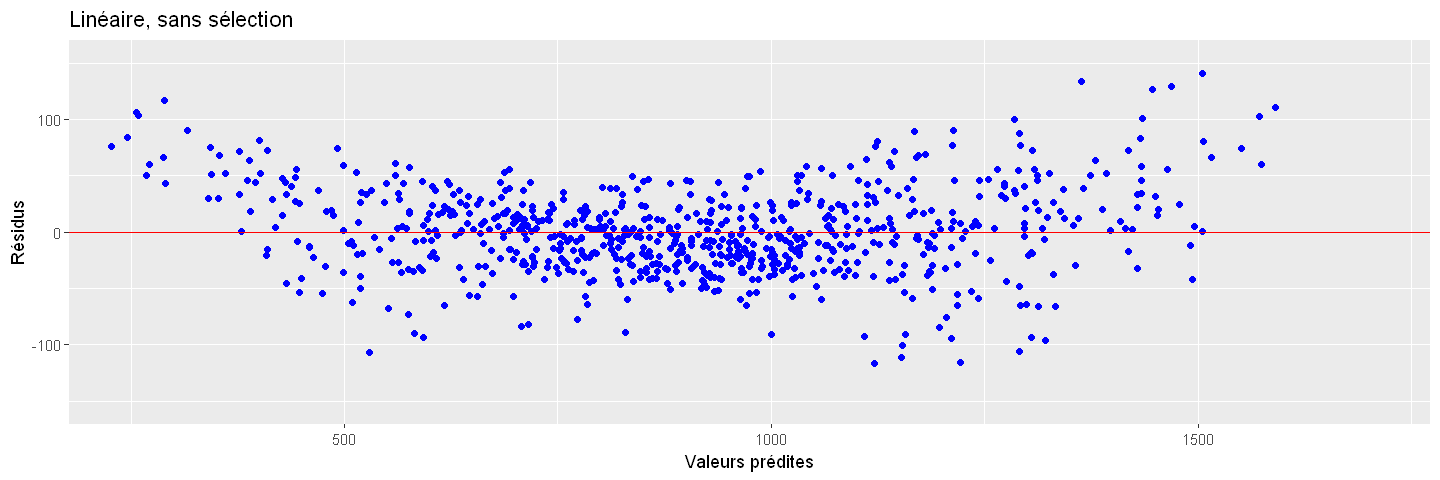

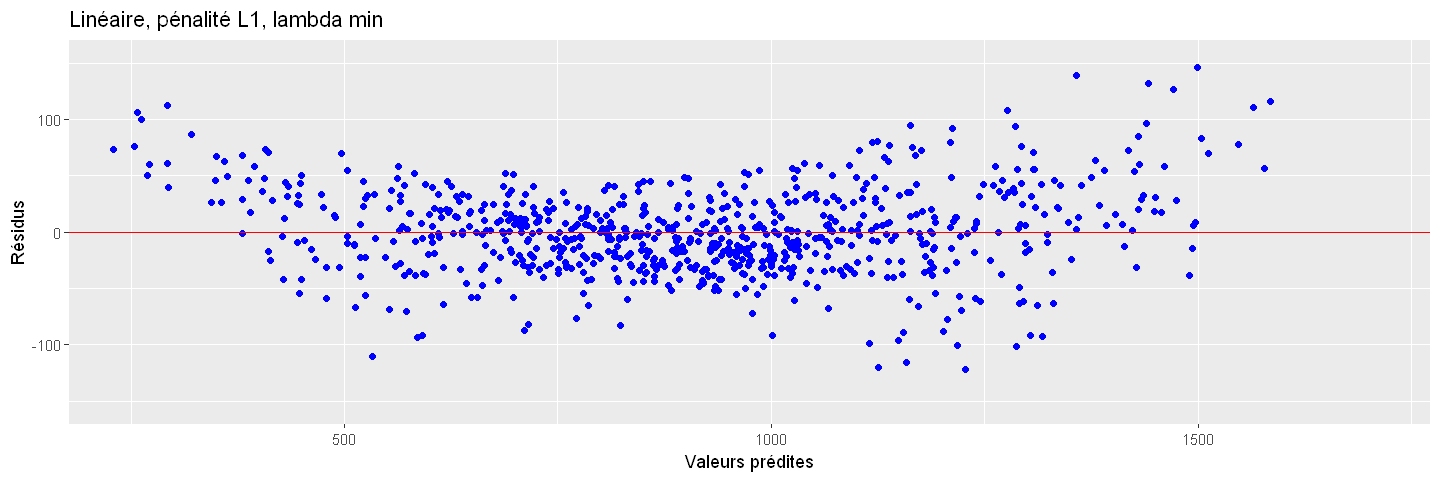

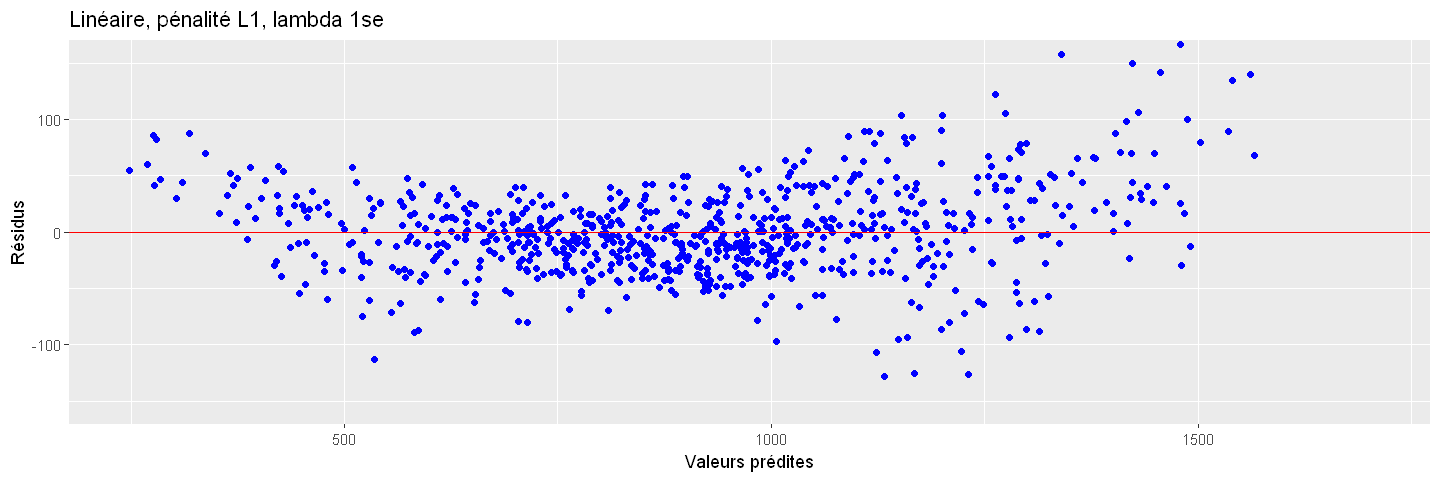

In [40]:
# Extraction des valeurs ajustées et des résidus

fit.lasso <- predict(reg.lasso.cv, s = "lambda.min", newx = x.mat)
res.lasso <- datappr$Calories_Burned - fit.lasso

fit.lasso.1se <- predict(reg.lasso.cv, s = "lambda.1se", newx = x.mat)
res.lasso.1se <- datappr$Calories_Burned - fit.lasso.1se 

# Graphe des résidus
options(repr.plot.width = 12, repr.plot.height = 4)
par(mfrow = c(1, 3))
gplot.res(fit.lm, res.lm, "Linéaire, sans sélection")
gplot.res(fit.lasso, res.lasso, "Linéaire, pénalité L1, lambda min")
gplot.res(fit.lasso.1se, res.lasso.1se, "Linéaire, pénalité L1, lambda 1se") 

Quelque soit le modèle linéaire, les résidus ne sont pas indépendants des valeurs prédites.
Regardons l'erreur de prévision par validation croisée.

In [41]:
V=10 ; nV=floor(nrow(datappr)/V)
S=sample(1:nrow(datappr),replace=FALSE)
error.CV = c()
for(v in 1:V)
{ # Rq : les deux dernières obs sont tjs dans l'échantillon d'apprentissage...
    datappr.learn=datappr[-c(S[(nV*(v-1)):(nV*v)]),] 
    datappr.valid=datappr[c(S[(nV*(v-1)):(nV*v)]),]
    error.CV=c(error.CV,mean((datappr.valid$Calories_Burned-predict(aov(Calories_Burned ~ ., data=datappr.learn),newdata=datappr.valid))^2))
}
mean(error.CV)

print(reg.lasso.cv)

[1] 1560.085


Call:  cv.glmnet(x = x.mat, y = datappr[, 8]) 

Measure: Mean-Squared Error 

    Lambda Index Measure    SE Nonzero
min  0.852    62    1496 75.07      11
1se  4.549    44    1570 96.05       7


On voit que le modele sans sélection de variable n'est pas intéressant car l'erreur est proche de celle avec LASSO et lambda lse (qui garde beaucoup moins de variables).
Par validation croisée, LASSO avec lamda min est le plus précis mais garde 13 variables contre 7 variables conservées par LASSO avec lambda lse.


### 2.2.3 Prévsion de l'échantillon test : Erreur de regréssion

In [105]:
# Préparations des données test 
x.mattest <- model.matrix(Calories_Burned ~ . - 1, data = datestr)

# Prédictions et MSE pour lambda.1se
pred.lasso.1se <- predict(reg.lasso.cv, newx = x.mattest, s = "lambda.1se")
mse.lasso.1se <- mean((pred.lasso.1se - datestr[, "Calories_Burned"])^2)
cat("Erreur quadratique moyenne (MSE) pour Lasso avec lambda.1se :", mse.lasso.1se, "\n")

# Prédictions et MSE pour lambda.min
pred.lasso.min <- predict(reg.lasso.cv, newx = x.mattest, s = "lambda.min")
mse.lasso.min <- mean((pred.lasso.min - datestr[, "Calories_Burned"])^2)
cat("Erreur quadratique moyenne (MSE) pour Lasso avec lambda.min :", mse.lasso.min, "\n")

# Prédictions et MSE pour le modèle sans sélection
pred.lm <- predict(reg.lm, newdata = datestr)
mse.lm <- mean((pred.lm - datestr[, "Calories_Burned"])^2)
cat("Erreur quadratique moyenne modèle linéaire sans sélection de variable :", mse.lm, "\n")

ERROR: Error in eval(expr, envir, enclos): objet 'reg.lasso.cv' introuvable


ON fait le modèle quadratique ?? c'est pas implémenté en python donc perso je pense pas, à voir

## 2.3 Support Vector Regression (SVR)


### 2.3.1 Régression sur l'échantillon d'apprentissage

In [43]:
library(e1071)

Warning message:
"le package 'e1071' a été compilé avec la version R 4.3.3"


In [44]:
svm.reg0 = svm(Calories_Burned ~ ., data = datappr)
summary(svm.reg0)


Call:
svm(formula = Calories_Burned ~ ., data = datappr)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.05 
    epsilon:  0.1 


Number of Support Vectors:  325






Nous allons estimer les meilleurs paramètres pour le SVR avec noyau linéaire, radial et polynomial. Ensuite nous allons prédires les calories brulées puis observer les résidus.

In [45]:
set.seed(2025)
svm.reg.tune.rdl = tune.svm(Calories_Burned ~ ., data = datappr, kernel="radial", cost = c(0.5,1, 1.5, 2, 2.5, 3, 3.5), 
    gamma = seq(0.01, 0.1, by = 0.02))

svm.reg.tune.linear = tune.svm(Calories_Burned ~ ., data = datappr, kernel="linear", cost = c(0.5,1, 1.5, 2, 2.5, 3, 3.5), 
    gamma = seq(0.01, 0.1, by = 0.02))

svm.reg.tune.polynomial = tune.svm(Calories_Burned ~ ., data = datappr, kernel="polynomial", cost = c(0.5,1, 1.5, 2, 2.5, 3, 3.5), 
    gamma = seq(0.01, 0.1, by = 0.02))

In [46]:
svm.reg.rdl = svm(Calories_Burned ~ ., data = datappr, cost = svm.reg.tune.rdl$best.parameters$cost, 
    gamma = svm.reg.tune.rdl$best.parameters$gamma, kernel="radial")
summary(svm.reg.rdl)

svm.reg.linear = svm(Calories_Burned ~ ., data = datappr, cost = svm.reg.tune.linear$best.parameters$cost, 
    gamma = svm.reg.tune.linear$best.parameters$gamma, kernel="linear")
summary(svm.reg.linear)

svm.reg.poly = svm(Calories_Burned ~ ., data = datappr, cost = svm.reg.tune.polynomial$best.parameters$cost, 
    gamma = svm.reg.tune.polynomial$best.parameters$gamma, kernel="polynomial")
summary(svm.reg.poly)


Call:
svm(formula = Calories_Burned ~ ., data = datappr, cost = svm.reg.tune.rdl$best.parameters$cost, 
    gamma = svm.reg.tune.rdl$best.parameters$gamma, kernel = "radial")


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  3.5 
      gamma:  0.01 
    epsilon:  0.1 


Number of Support Vectors:  234







Call:
svm(formula = Calories_Burned ~ ., data = datappr, cost = svm.reg.tune.linear$best.parameters$cost, 
    gamma = svm.reg.tune.linear$best.parameters$gamma, kernel = "linear")


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  linear 
       cost:  0.5 
      gamma:  0.01 
    epsilon:  0.1 


Number of Support Vectors:  348







Call:
svm(formula = Calories_Burned ~ ., data = datappr, cost = svm.reg.tune.polynomial$best.parameters$cost, 
    gamma = svm.reg.tune.polynomial$best.parameters$gamma, kernel = "polynomial")


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  polynomial 
       cost:  3 
     degree:  3 
      gamma:  0.09 
     coef.0:  0 
    epsilon:  0.1 


Number of Support Vectors:  491






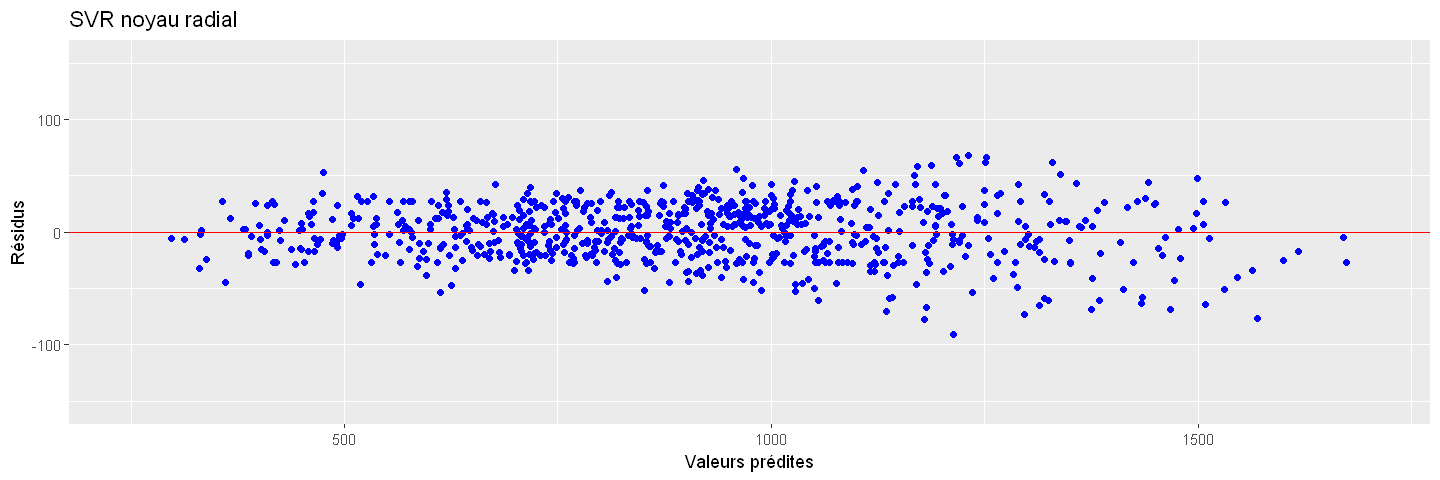

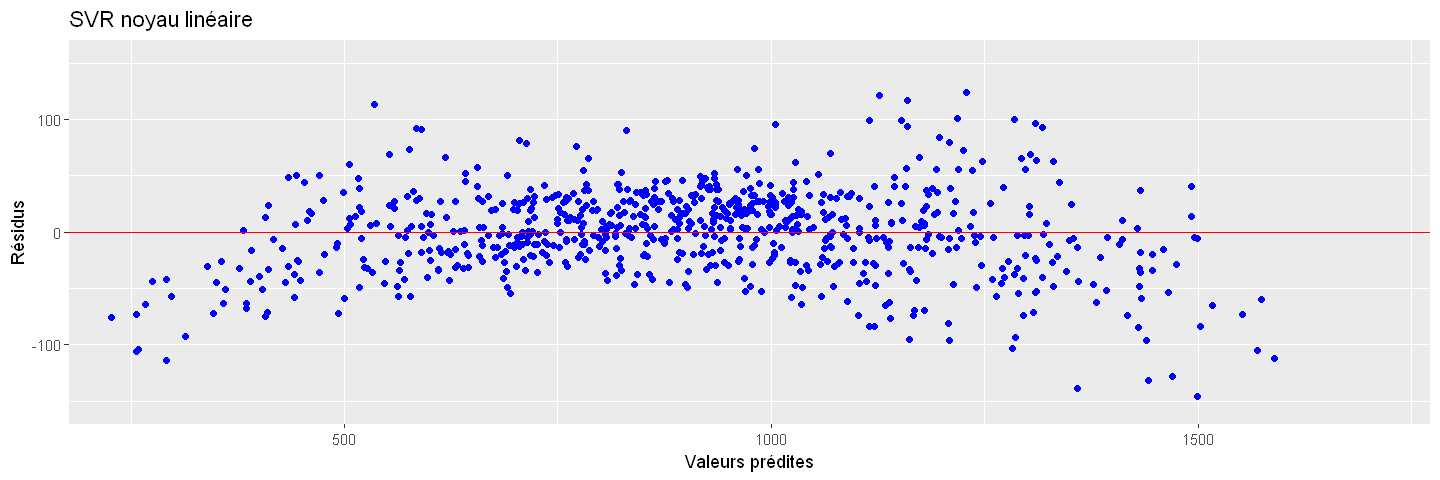

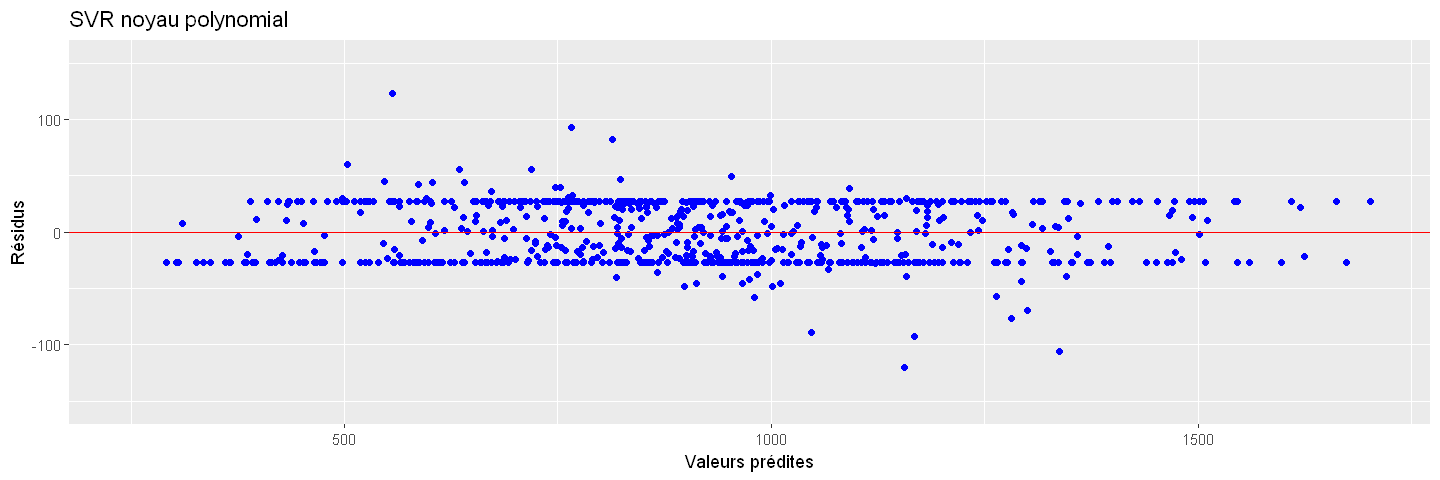

In [47]:
# calcul et graphe des résidus
fit.svmr.rdl=svm.reg.rdl$fitted
res.svmr.rdl=fit.svmr.rdl-datappr[,"Calories_Burned"]
gplot.res(fit.svmr.rdl,res.svmr.rdl,titre="SVR noyau radial")

fit.svmr.linear=svm.reg.linear$fitted
res.svmr.linear=fit.svmr.linear-datappr[,"Calories_Burned"]
gplot.res(fit.svmr.linear,res.svmr.linear,titre="SVR noyau linéaire")

fit.svmr.polynomial=svm.reg.poly$fitted
res.svmr.polynomial=fit.svmr.polynomial-datappr[,"Calories_Burned"]
gplot.res(fit.svmr.polynomial,res.svmr.polynomial,titre="SVR noyau polynomial")

Les résidus des SVR avec noyau linéaire et noyau polynomial ne sont pas indépendants. On observe pour le premier une "parabole" et pour le second un effet couloir. Nous choisissons donc de continuer avec le noyau gaussien, RBF (radial).

### 2.3.2 Erreur de regression sur l'échantillon test

Regardons l'erreur de regression sur l'échantillon test.

In [48]:
pred.svmr.rdl=predict(svm.reg.rdl,newdata=datestr)
# Erreur quadratique moyenne de prévision
erreur_SVR =sum((pred.svmr.rdl-datestr[,"Calories_Burned"])^2)/nrow(datestr)
cat("Erreur quadratique moyenne pour un SVR avec noyau radial :",erreur_SVR , "\n")

Erreur quadratique moyenne pour un SVR avec noyau radial : 906.3458 


Le modèle SVR avec un noyau radial est bien plus performant que les modèles linéaires. En effet, l'erreur de prevision est d'environ 900 pour le SVR alors qu'elle est autour de 2000 pour les modèles linéaires. Ainsi, SVR est plus précis.

## 2.4 Arbre optimal

### 2.4.1 Estimation et élagage de l'arbre de régression

In [2]:
library(rpart) 
library(rpart.plot)
options(repr.plot.width = 15, repr.plot.height = 10)
library(partykit)

Le chargement a nécessité le package : libcoin

Le chargement a nécessité le package : mvtnorm



##### Recherche du cp optimal

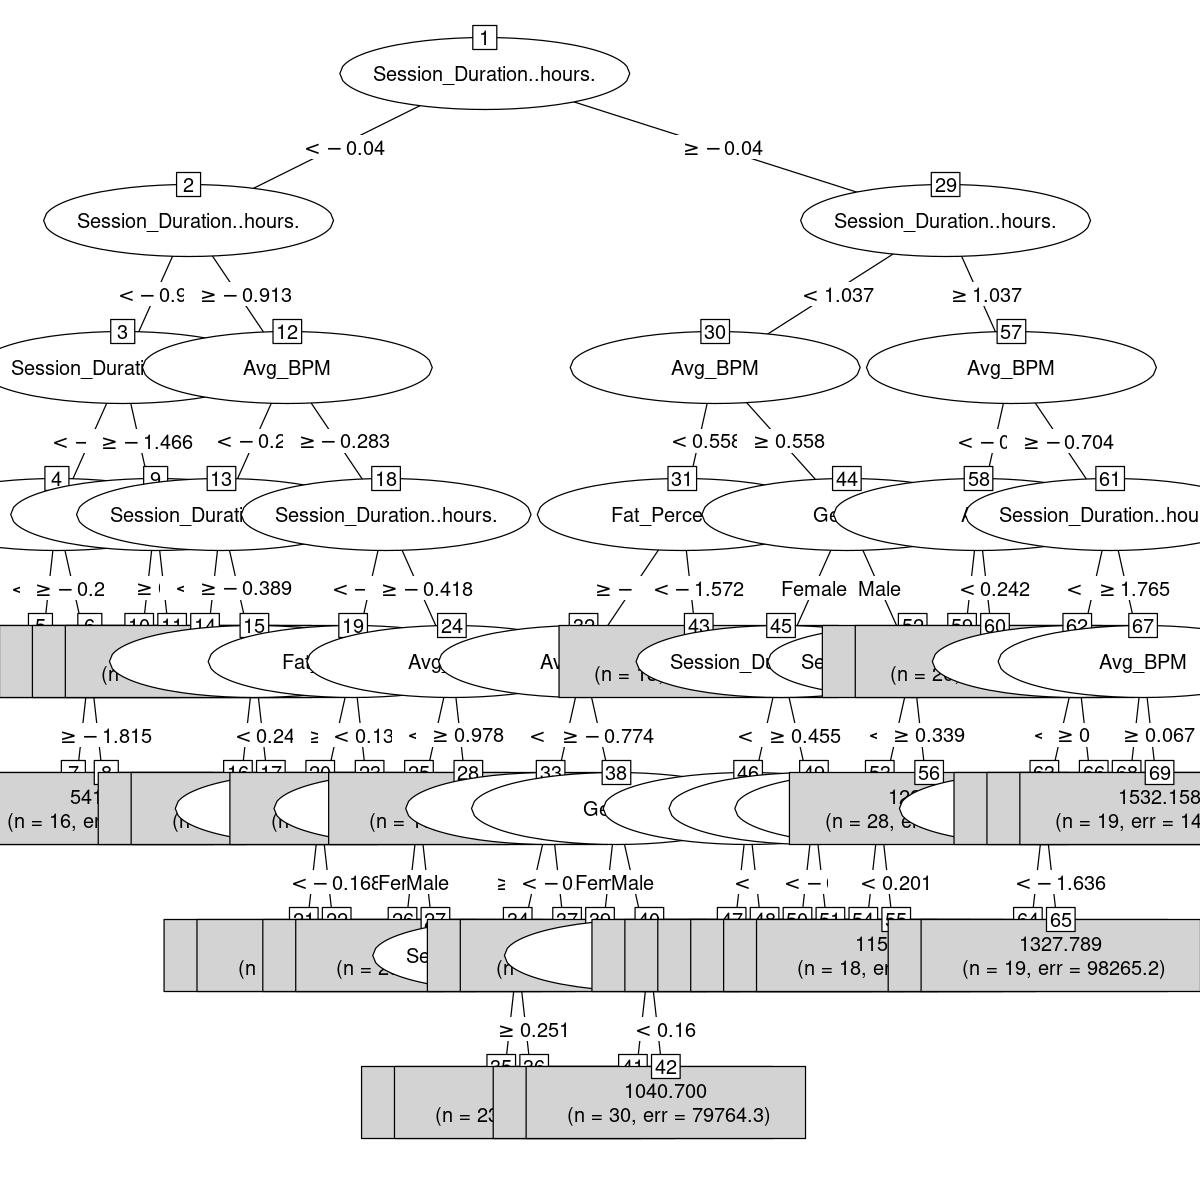

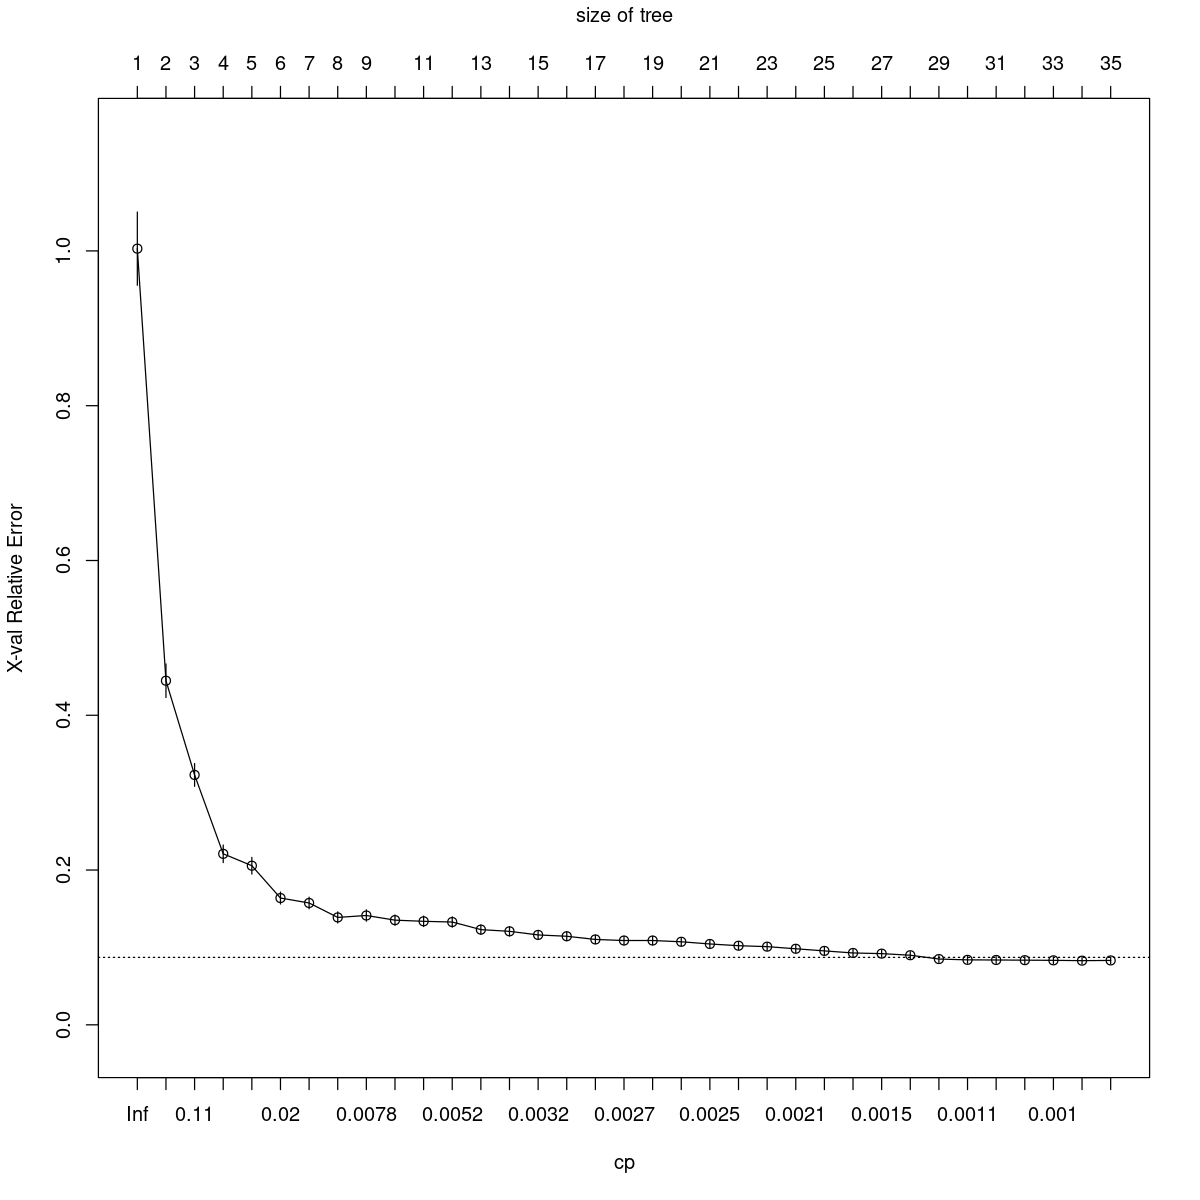

In [34]:
tree.reg=rpart(Calories_Burned~.,data=datappr,control=rpart.control(cp=0.001)) #Création de l’arbre de régression avec un cp très petit 
plot(as.party(tree.reg), type="simple")
#identifier le cp optimal via validation croisée
xmat<-xpred.rpart(tree.reg,xval=10) 

# Cross-validation error par valeur de CP
CVerr<-apply((xmat-datappr[,"Calories_Burned"])^2,2,sum)

plotcp(tree.reg)

Sur le graphe on voit que la valeur de cp optimale est la valeur la plus basse.

##### Arbre Optimal

[1] 0.001004666

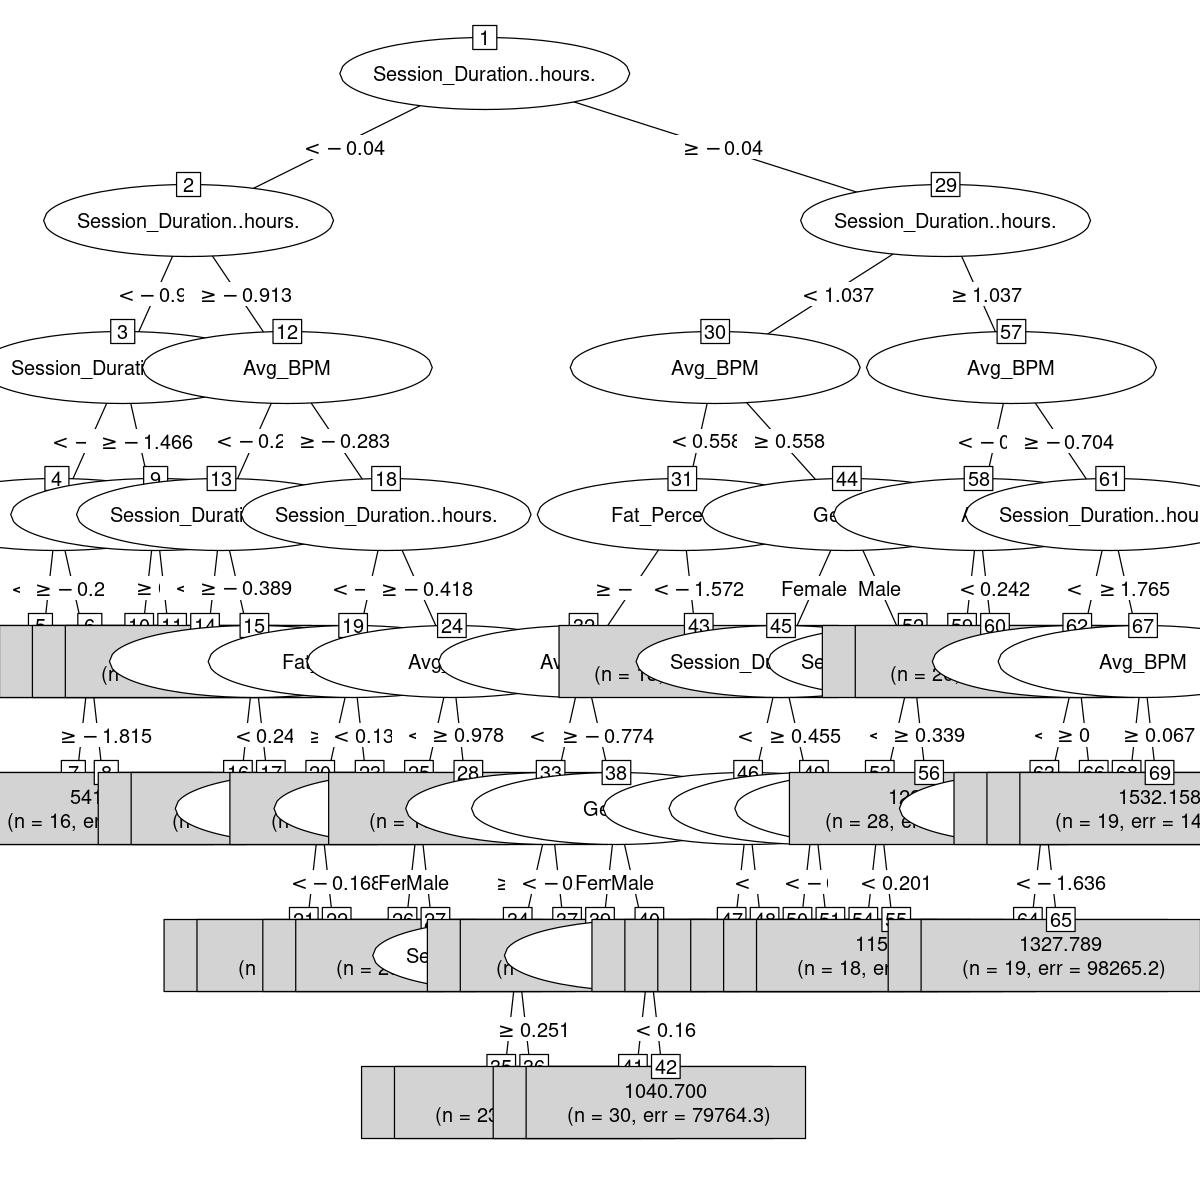

In [22]:
as.numeric(attributes(which.min(CVerr))$names)
tree.reg=rpart(Calories_Burned~.,data=datappr,control=rpart.control(cp=as.numeric(attributes(which.min(CVerr))$names)))
plot(as.party(tree.reg), type="simple")

Cet arbre montre clairement que la durée de la session est la variable qui contribue le plus au nombre de calories brulées ce qui correspond bien aux analyses faites dans la partie 1.

##### Graphe des résidus

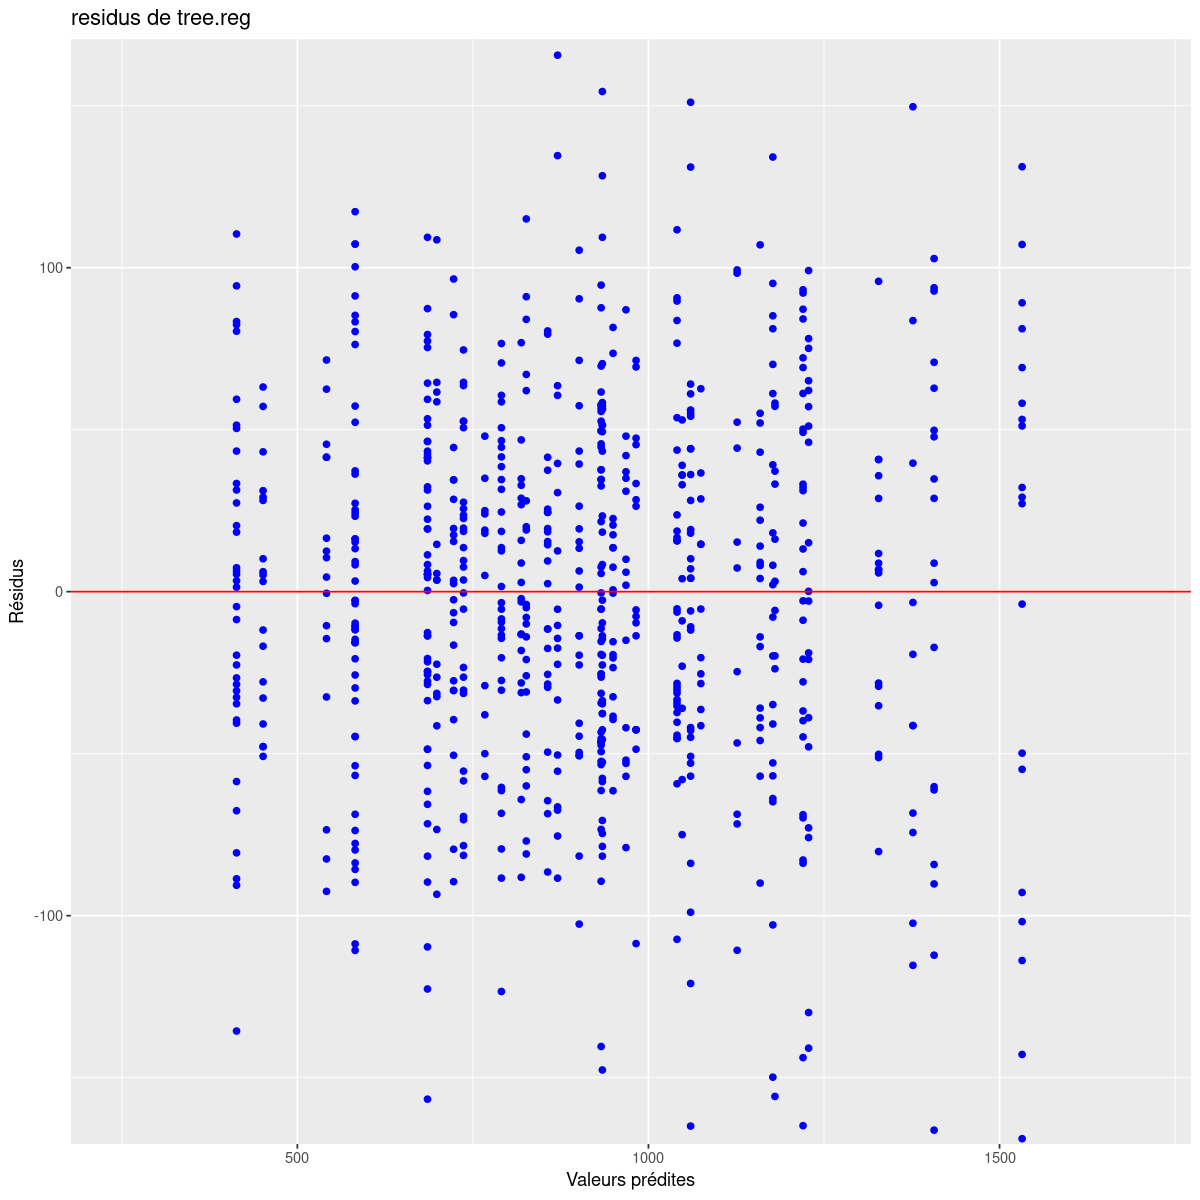

In [23]:
fit.tree=predict(tree.reg)
res.tree=fit.tree-datappr[,"Calories_Burned"]
gplot.res(fit.tree,res.tree,"residus de tree.reg")

### 2.4.2 Erreur de régression

In [24]:
# Calcul des prévisions
pred.treer=predict(tree.reg,newdata=datestr)
# Erreur quadratique moyenne de prévision en régression
erreur_arbreoptimal=sum((pred.treer-datestr[,"Calories_Burned"])^2)/nrow(datestr)
cat("Erreur quadratique moyenne Arbre optimal :",erreur_arbreoptimal , "\n")

Erreur quadratique moyenne Arbre optimal : 6325.555 


Avec une erreur de prévision sur l'échantillon test de 6325, l'arbre optimal est moins précis que le SVR et les modèles linéaires.

## 2.5 Forêt aléatoire

In [28]:
library(randomForest)
library(caret)
library(e1071)

### 2.5.1 Regression

In [44]:
rf.reg=randomForest(Calories_Burned~., data=datappr,xtest=datestr[,-8],ytest=datestr[,"Calories_Burned"],
   ntree=600,do.trace=50,importance=TRUE)

     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
  50 |     5204     7.00 |     5266     7.12 |
 100 |     4526     6.09 |     5120     6.93 |
 150 |     4246     5.71 |     4824     6.53 |
 200 |     4114     5.53 |     4730     6.40 |
 250 |     4075     5.48 |     4715     6.38 |
 300 |     4021     5.41 |     4740     6.41 |
 350 |     3933     5.29 |     4643     6.28 |
 400 |     3940     5.30 |     4675     6.32 |
 450 |     3929     5.29 |     4698     6.35 |
 500 |     3906     5.25 |     4712     6.37 |
 550 |     3905     5.25 |     4737     6.41 |
 600 |     3873     5.21 |     4699     6.36 |


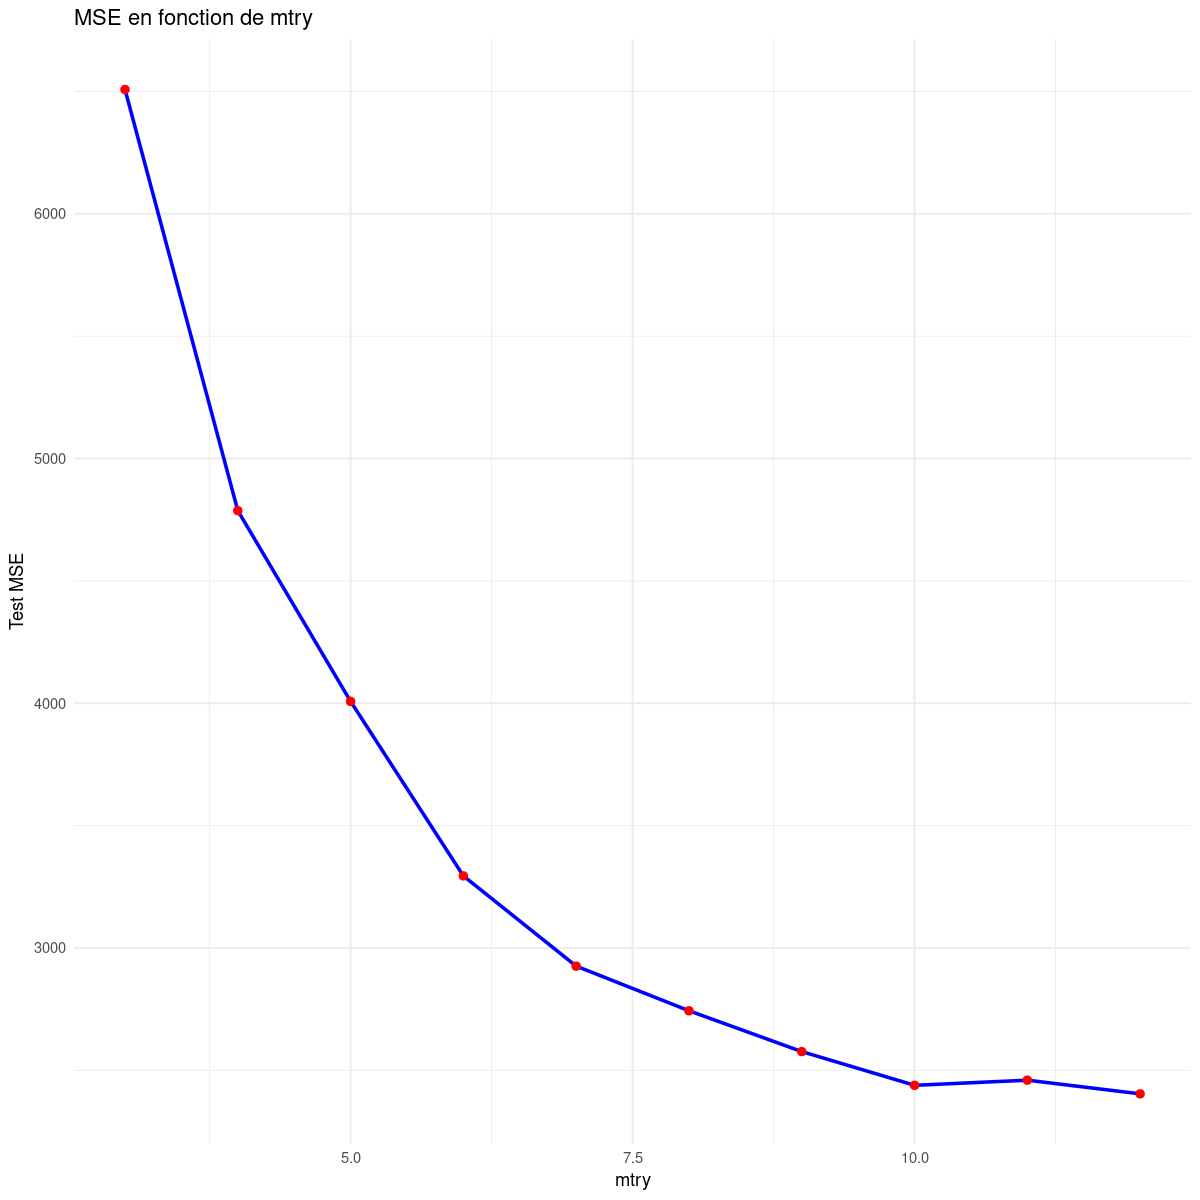

In [43]:
mtry_vals <- 3:12
test_mse <- numeric(length(mtry_vals))

for (i in seq_along(mtry_vals)) {
  set.seed(123)
  rf <- randomForest(Calories_Burned ~ ., data = datappr,
                     xtest = datestr[, -8],
                     ytest = datestr[, "Calories_Burned"],
                     mtry = mtry_vals[i],
                     ntree = 500)

  test_mse[i] <- rf$test$mse[500]  # Erreur après 500 arbres
}
# Mettre les résultats dans un data frame
df_mse <- data.frame(
  mtry = mtry_vals,
  MSE = test_mse
)

# Tracer avec ggplot2
ggplot(df_mse, aes(x = mtry, y = MSE)) +
  geom_line(color = "blue", size = 1) +
  geom_point(color = "red", size = 2) +
  ggtitle("MSE en fonction de mtry") +
  xlab("mtry") +
  ylab("Test MSE") +
  theme_minimal()


Le mrty optimal est 10.

In [48]:
#modèle optimal
rf.reg=randomForest(Calories_Burned~., data=datappr,xtest=datestr[,-8],ytest=datestr[,"Calories_Burned"],
   ntree=600,do.trace=50,mtry=10,importance=TRUE)

     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
  50 |     2353     3.17 |     2653     3.59 |
 100 |     2088     2.81 |     2456     3.32 |
 150 |     2051     2.76 |     2453     3.32 |
 200 |     2008     2.70 |     2446     3.31 |
 250 |     2005     2.70 |     2504     3.39 |
 300 |     1999     2.69 |     2504     3.39 |
 350 |     2001     2.69 |     2508     3.39 |
 400 |     2009     2.70 |     2504     3.39 |
 450 |     2016     2.71 |     2506     3.39 |
 500 |     2017     2.71 |     2507     3.39 |
 550 |     2003     2.69 |     2508     3.39 |
 600 |     2012     2.71 |     2509     3.39 |


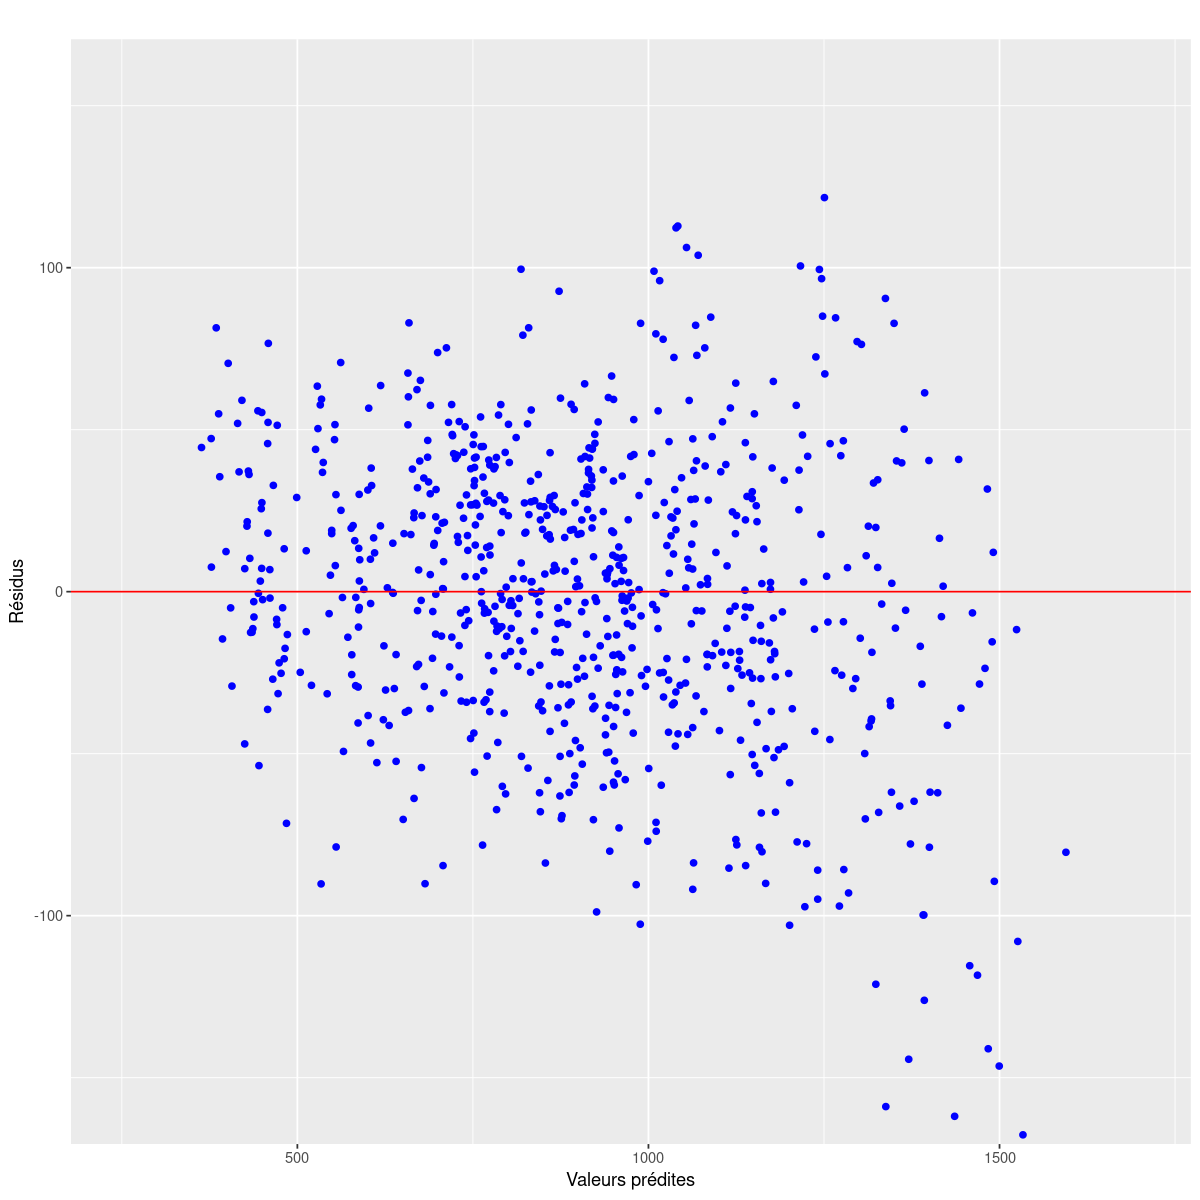

In [49]:
fit.rfr=rf.reg$predicted
res.rfr=fit.rfr-datappr[,"Calories_Burned"]
gplot.res(fit.rfr,res.rfr,titre="")

### 2.5.2 Prévision de l'échantillon test

In [50]:
# Forêts aléatoires
pred.rfr=rf.reg$test$predicted
# Erreur quadratique moyenne de prévision
erreur_randomforest=sum((pred.rfr-datestr[,"Calories_Burned"])^2)/nrow(datestr)
cat("Erreur quadratique moyenne Foret aléatoire :" ,erreur_randomforest)

Erreur quadratique moyenne Foret aléatoire : 2508.99

Ainsi les forêts aléatoires proposent un meilleur résultat que l'arbre optimal avec une MSE à 2508. C’est une amélioration logique, car les forêts aléatoires réduisent la variance du modèle grâce à l’agrégation de plusieurs arbres construits sur des sous-échantillons, ce qui améliore la précision par rapport à un arbre unique.

## 2.6 Boosting

### 2.6.1 Régression

Loaded gbm 2.2.2

This version of gbm is no longer under development. Consider transitioning to gbm3, https://github.com/gbm-developers/gbm3



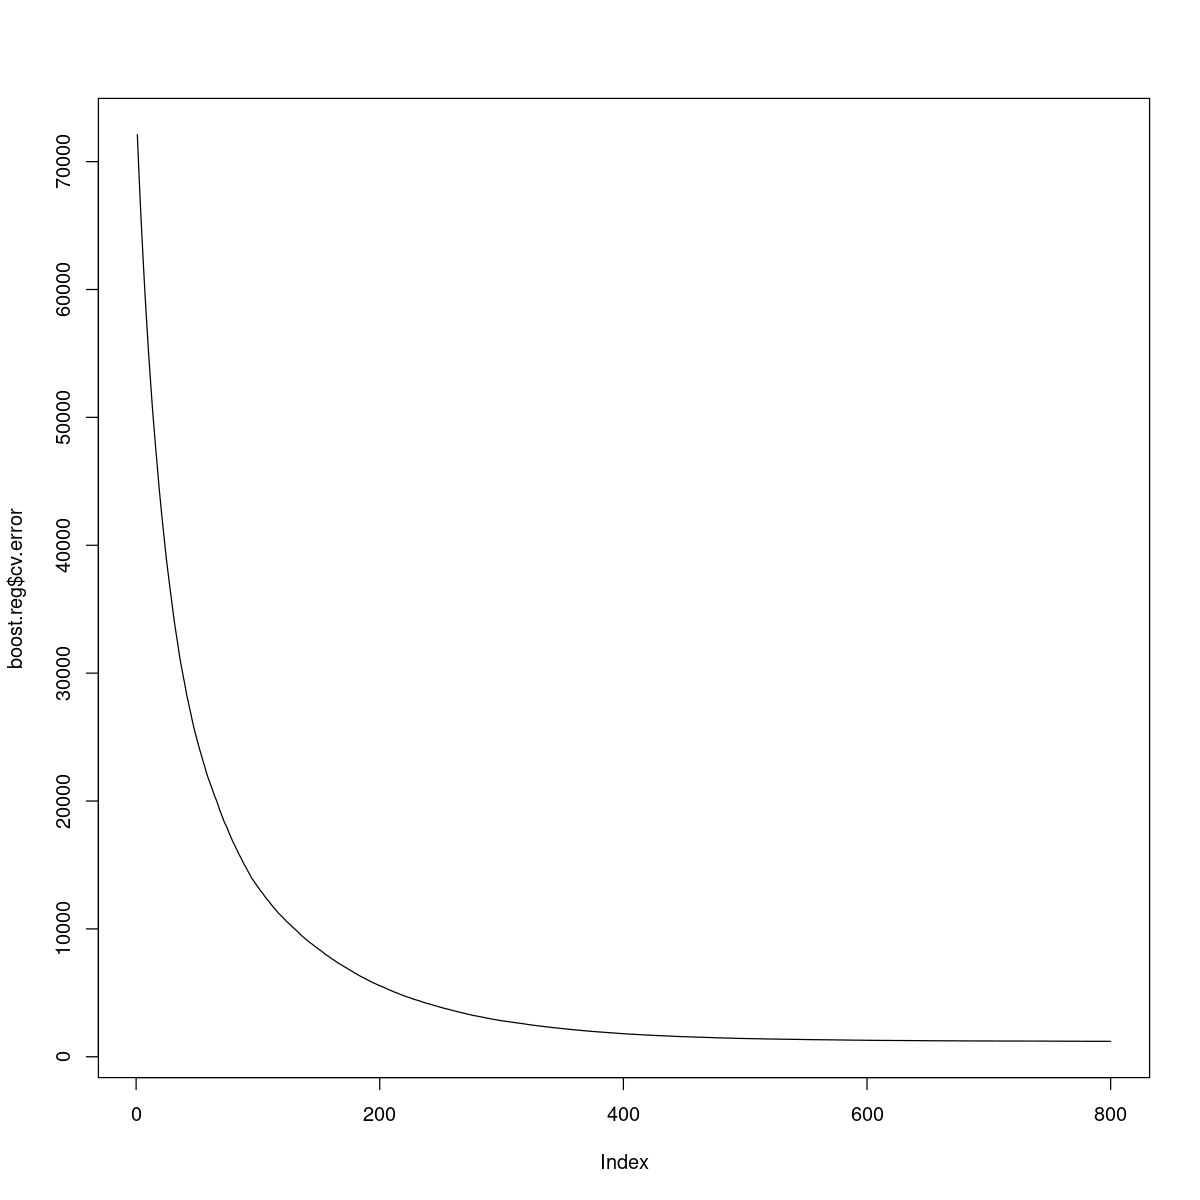

In [55]:
library(gbm)

boost.reg = gbm(Calories_Burned ~ ., data = datappr, distribution = "gaussian", n.trees = 800, 
    cv.folds = 10, n.minobsinnode = 5, shrinkage = 0.03, verbose = FALSE)

# on fixe verbose à FALSE pour éviter trop de sorties
plot(boost.reg$cv.error, type = "l")

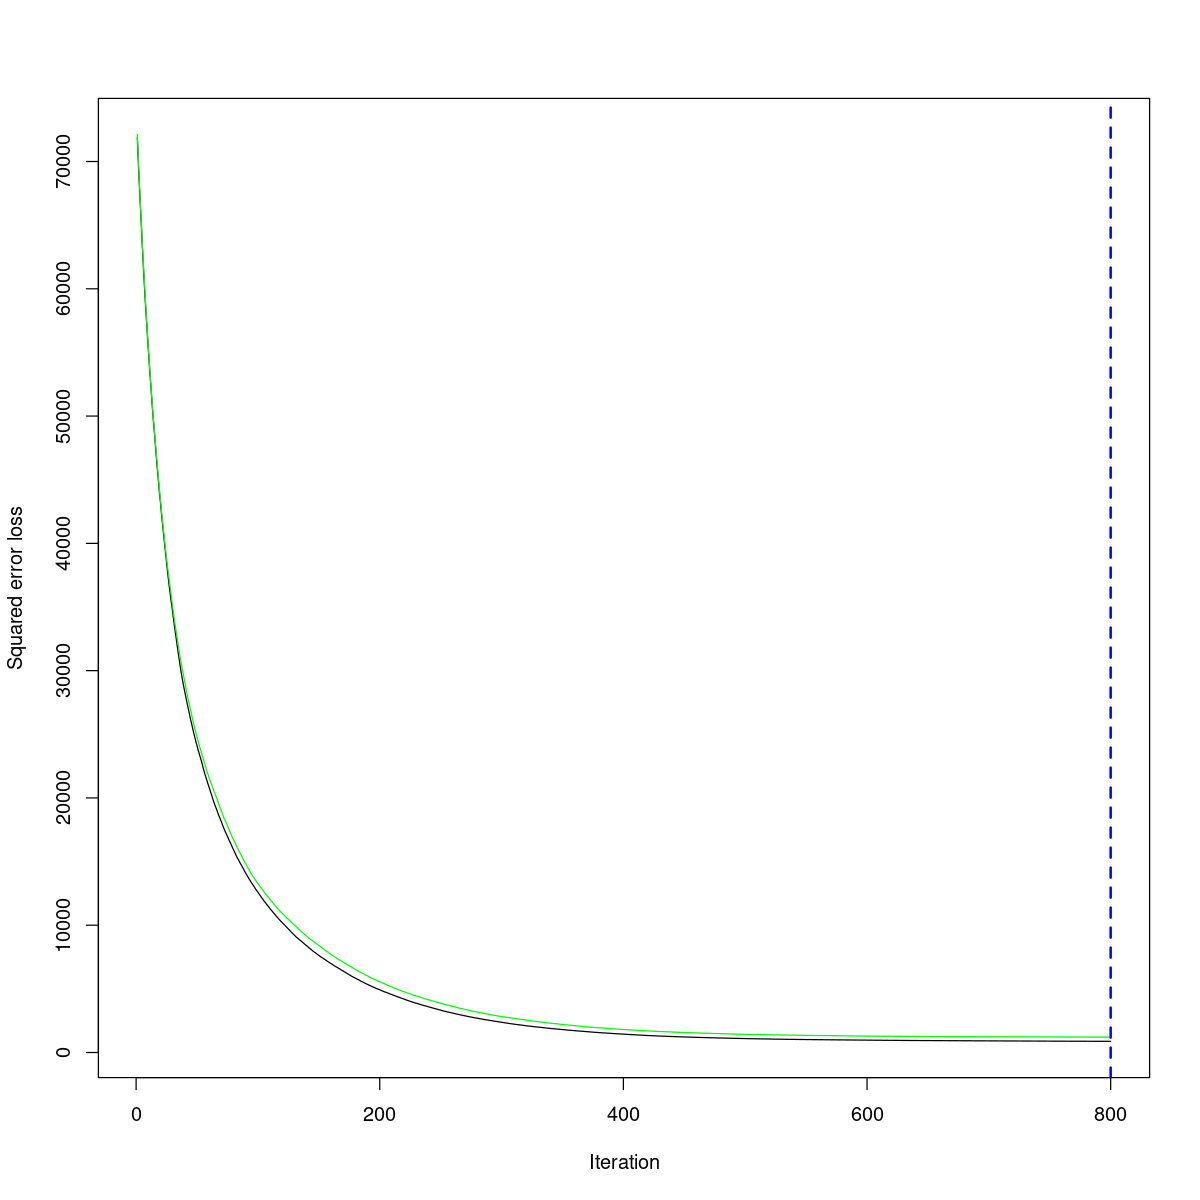

In [56]:
# nombre optimal d'itérations par validation croisée
best.iter=gbm.perf(boost.reg,method="cv")

Le nombre d'arbre optimal est le plus grand soit 800 arbres. 

In [64]:
set.seed(123)
boost.reg = gbm(Calories_Burned ~ ., data = datappr, distribution = "gaussian", n.trees = 800, 
    cv.folds = 10, n.minobsinnode = 5, shrinkage = 0.03, verbose = FALSE)


##### Calcul des résidus

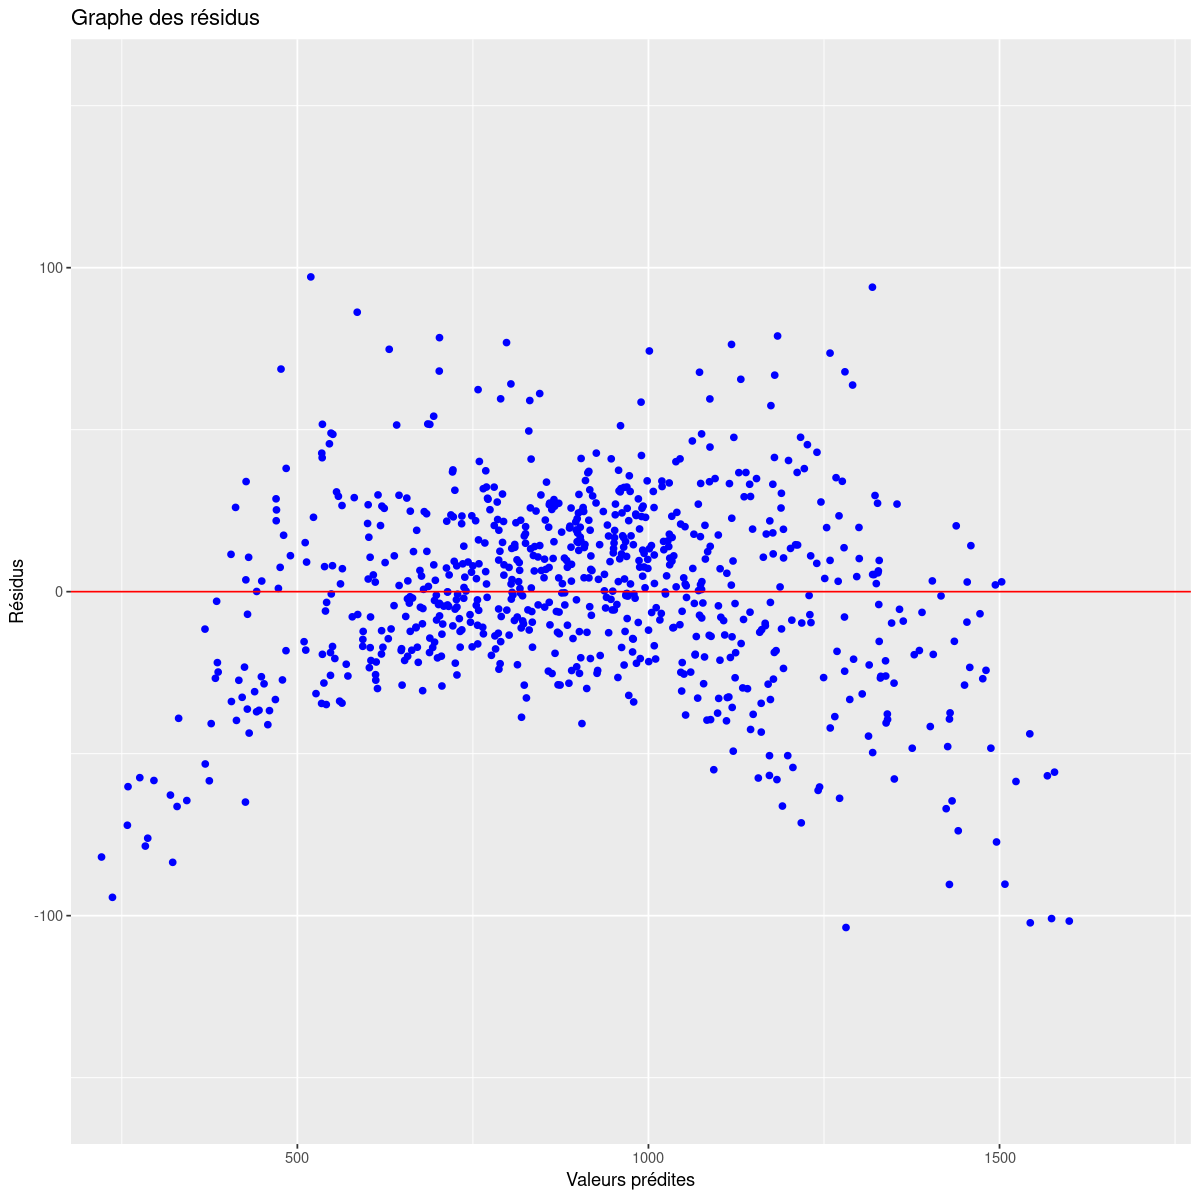

In [65]:
fit.boostr=boost.reg$fit
res.boostr=fit.boostr-datappr[,"Calories_Burned"]
gplot.res(fit.boostr,res.boostr,titre="Graphe des résidus")

### 2.6.2 Prévision de l'échantillon test, erreur de régression

In [71]:
pred.boostr=predict(boost.reg,newdata=datestr,n.trees=800)
# Erreur quadratique moyenne de prévision
erreur_boosting=sum((pred.boostr-datestr[,"Calories_Burned"])^2)/nrow(datestr)
cat("Erreur quadratique moyenne Boosting :",erreur_boosting)

Erreur quadratique moyenne Boosting : 1522.04

Le boosting a de bonnes performances. L'erreur de prévision est similaire à celle des modèles linéaires. Toutefois, son temps de calcul est plus long et son interprétabilité plus faible.

## 2.7 Réseau de neurones

### 2.7.1 Régression

In [97]:
library(nnet)
# apprentissage

# attention au paramètre linout dans le cas de la régression
nnet.reg=nnet(Calories_Burned~.,data=datappr,size=5,decay=1,linout=TRUE,maxit=2000) 

# weights:  106
initial  value 699188426.497071 
iter  10 value 16104690.754094
iter  20 value 13891423.465776
iter  30 value 13562318.805299
iter  40 value 13408787.042021
iter  50 value 13162263.836097
iter  60 value 12894598.186978
iter  70 value 12814812.503681
iter  80 value 12300592.470307
iter  90 value 11535771.887638
iter 100 value 11335490.553122
iter 110 value 11205991.092130
iter 120 value 11045296.624463
iter 130 value 10958270.638100
iter 140 value 10919881.051521
iter 150 value 10760709.356317
iter 160 value 10716856.950336
iter 170 value 10650711.587712
iter 180 value 10637935.277070
iter 190 value 10491506.352173
iter 200 value 10358997.159911
iter 210 value 10318663.928869
iter 220 value 10258897.377947
iter 230 value 10134621.899742
iter 240 value 9740936.546652
iter 250 value 9377791.792724
iter 260 value 9101907.299092
iter 270 value 8768244.677900
iter 280 value 8466628.741301
iter 290 value 7956382.651540
iter 300 value 7839645.900028
iter 310 value 6909369.56013

Size définit le nombre de neurones dans la couche cachée. Plus size est grand, plus le réseau a de capacité à apprendre des relations complexes (modèle plus puissant). Decay est le coefficient de régularisation L2 (penalisation des poids). Nous cherchons les paramètres optimaux grâce à la fonction Tune.nnet.

In [102]:
set.seed(123) 
#il faut le paramètre linout=true dans le cas de la régression
plot(tune.nnet(Calories_Burned~.,data=datappr,size=c(3,4,5,6,7,8),decay=c(1,2,3,4,5,6,7),maxit=1000,linout=TRUE))
system.time(tune.nnet(Calories_Burned~.,data=datappr,size=c(3,4,5,6,7,8),decay=c(1,2,3,4,5,6,7),maxit=1000,linout=TRUE))

D'après les graphiques, des paramètres optimaux pour size et decay sont respectivement 7 et 2.

In [89]:
set.seed(12) 
#apprentissage avec les paramètres optimaux
nnet.reg=nnet(Calories_Burned~.,data=datappr,size=7,decay=2,linout=TRUE,maxit=2000)
summary(nnet.reg)

# weights:  148
initial  value 696883965.501210 
iter  10 value 118644678.015947
iter  20 value 88627878.121117
iter  30 value 63450019.639653
iter  40 value 49996167.600951
iter  50 value 40430990.689757
iter  60 value 33401046.240214
iter  70 value 29117948.822376
iter  80 value 26207782.896068
iter  90 value 25131846.335971
iter 100 value 20890792.604868
iter 110 value 18775217.199023
iter 120 value 18289999.638604
iter 130 value 17931531.299032
iter 140 value 17460047.281534
iter 150 value 15544863.380140
iter 160 value 14053586.745768
iter 170 value 13138573.305211
iter 180 value 12549672.255530
iter 190 value 12059872.525297
iter 200 value 11748181.514475
iter 210 value 11640530.628969
iter 220 value 11404660.874059
iter 230 value 11189278.691362
iter 240 value 10952944.453460
iter 250 value 10386457.015276
iter 260 value 10065578.052358
iter 270 value 9483727.188147
iter 280 value 8898104.394158
iter 290 value 8068707.450036
iter 300 value 6847462.063547
iter 310 value 5506568.8

a 19-7-1 network with 148 weights
options were - linear output units  decay=2
  b->h1  i1->h1  i2->h1  i3->h1  i4->h1  i5->h1  i6->h1  i7->h1  i8->h1  i9->h1 
   2.70    0.18   -0.42    3.83    0.02   -0.44    0.01    1.42    0.02   -0.40 
i10->h1 i11->h1 i12->h1 i13->h1 i14->h1 i15->h1 i16->h1 i17->h1 i18->h1 i19->h1 
   0.06    0.18    0.11   -0.52   -2.16    3.43    2.87    2.04    6.78   -7.17 
  b->h2  i1->h2  i2->h2  i3->h2  i4->h2  i5->h2  i6->h2  i7->h2  i8->h2  i9->h2 
  -0.02   -2.59  -12.05   -2.06    0.93   -7.56    8.32  -11.92    7.33    2.96 
i10->h2 i11->h2 i12->h2 i13->h2 i14->h2 i15->h2 i16->h2 i17->h2 i18->h2 i19->h2 
   0.63   -7.43    6.61   -1.69  -11.24   -8.75   12.21  -12.08   -5.75   -8.89 
  b->h3  i1->h3  i2->h3  i3->h3  i4->h3  i5->h3  i6->h3  i7->h3  i8->h3  i9->h3 
  -2.05   -0.07    0.43   -0.71   -0.11    0.12    0.13    2.00   -0.17   -0.56 
i10->h3 i11->h3 i12->h3 i13->h3 i14->h3 i15->h3 i16->h3 i17->h3 i18->h3 i19->h3 
   0.11    0.22    0.05   -1.62

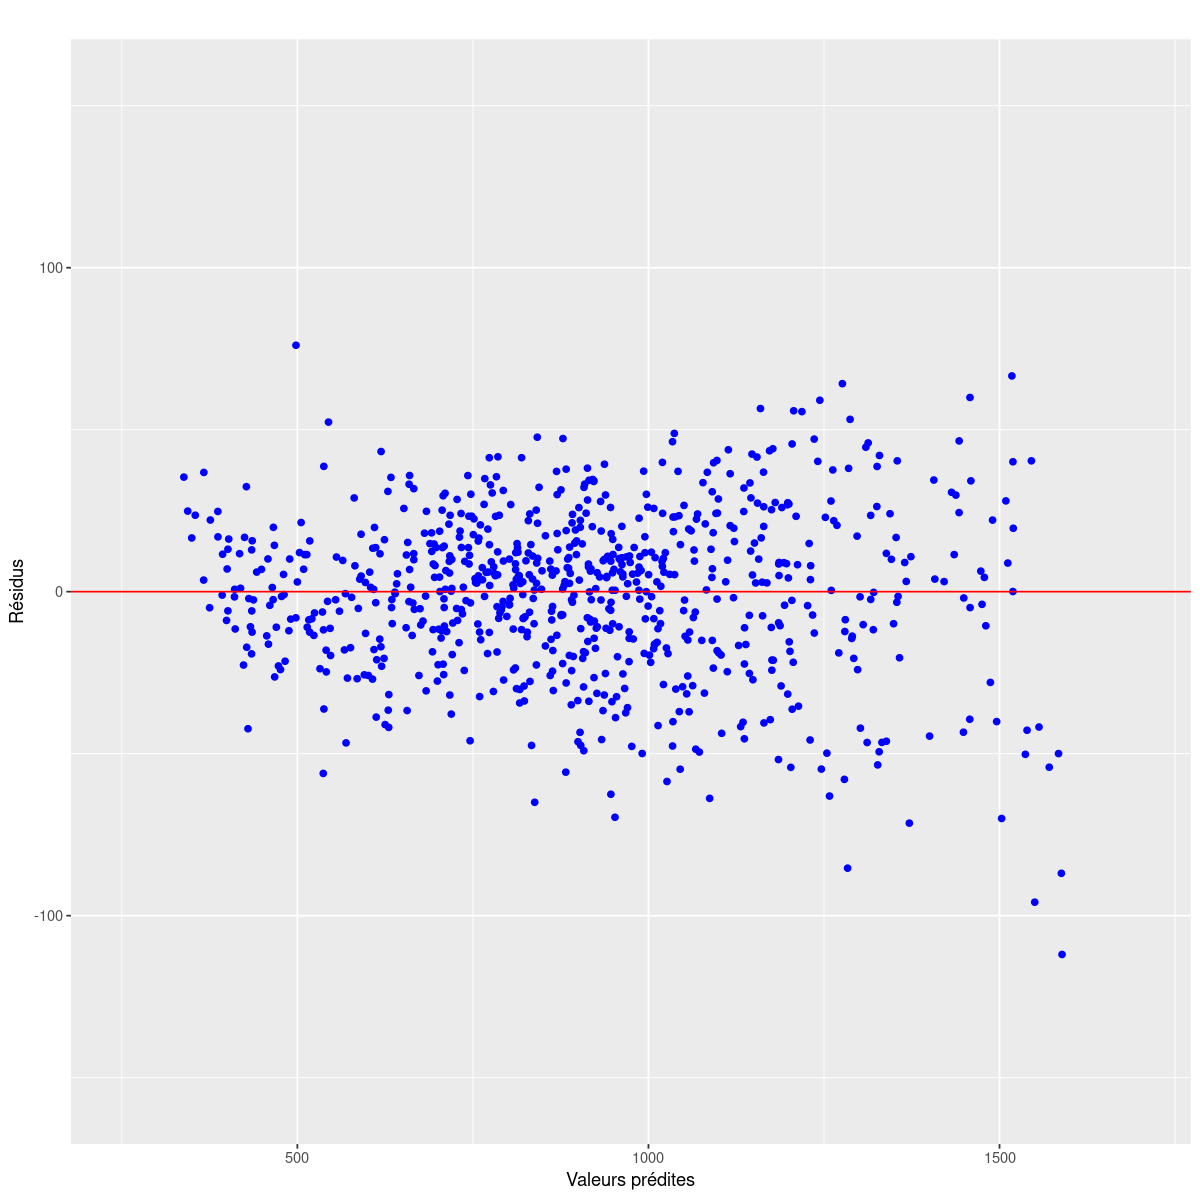

In [98]:
# calcul et graphe des résidus
fit.nnetr=predict(nnet.reg,data=datappr)
res.nnetr=fit.nnetr-datappr[,"Calories_Burned"]
gplot.res(fit.nnetr,res.nnetr,titre="")

Les résidus sont bien aléatoires et independants.

### 2.7.2 Prévision de l'échantillon test, erreur de régression

In [99]:
# Calcul des prévisions
pred.nnetr=predict(nnet.reg,newdata=datestr)
#pred.nnetq=predict(nnet.dis,newdata=datestq) 
# Erreur quadratique moyenne de prévision
erreur_RDN = sum((pred.nnetr-datestr[,"Calories_Burned"])^2)/nrow(datestr)
cat("Erreur quadratique moyenne RdN :",erreur_RDN)

Erreur quadratique moyenne RdN : 1466.956

La MSE du réseaux de neurones est similaire à celle des modèles linéaires (environ 1500). Il est important de noter que le tuning des paramètres pour le réseau de neurones est assez long et très couteux. De plus nous observons une certaine variabilité des résultats dûe à l'initialisation àléatoire. Ici d'autres paramètres sont peut-être plus optimaux mais le coût de calcul pour leur recherche est conséquent et les résultats sont variables. 

## 2.8 Comparaison finale des différents modèles

Finalement, voici les résultats des différents modèles sur l'échantillon test. Pour des raisons d'explicabilité et d'interprétation des résultats nous affichons la RMSE et non la MSE car la RMSE est dans la même unité que "Calories_Burned", soit en calories.

In [103]:
cat("RMSE RdN :",sqrt(erreur_RDN),"\n")
cat("RMSE Boosting :",sqrt(erreur_boosting),"\n")
cat("RMSE Foret aléatoire :" ,sqrt(erreur_randomforest),"\n")
cat("RMSE Arbre optimal :",sqrt(erreur_arbreoptimal) ,"\n")
cat("RMSE pour un SVR avec noyau radial :",sqrt(erreur_SVR) , "\n")
cat("RMSE Modèle linéaire Lasso avec lambda.min :", sqrt(mse.lasso.min), "\n")
cat("RMSE Modèle linéaire  Lasso avec lambda.1se :", sqrt(mse.lasso.1se), "\n")
cat("RMSE modèle linéaire sans sélection de variable :", sqrt(mse.lm), "\n")


RMSE RdN : 38.30086 
RMSE Boosting : 39.01333 
RMSE Foret aléatoire : 50.08982 
RMSE Arbre optimal : 79.53336 


ERROR: Error in eval(expr, envir, enclos): objet 'erreur_SVR' introuvable


##### Quels sont les modèles les plus performants ? Quel est le niveau de précision obtenu ? Quels modèles retenir si l’on ajoute une contrainte d’interprétabilité ?

SVR est le modèle le plus performant avec une RMSE égale à 38. Ainsi, lors de la prédiction du nombre Il est suivi par le modèle par boosting avec une MSE égale à 1600.

Or, SVR, Boosting, Réseaux de neurones ont un niveau d'interprétabilité très faible.

Donc si on rajoute une contrainte d'interprétabilité, les modèles linéaires sont les plus pertinents. Le modèle avec sélection de variables LASSO avec lambda.min semble être le meilleur compromis avec une MSE égale à 2007.

##### Retour sur l'analyse de données

vos résultats sont-ils cohérents avec l’analyse exploratoire des données, par exemple en ce qui concerne l’importance des variables ?

Les résultats obtenus sont cohérents avec l'analyse exploratoire des données. En effet, les modèles linéaires avec sélection de variable et l'arbre optimal ont confirmé nos analyses sur la grande importance de la variable "Durée de la session". Nous avons également retrouvé l'importance du genre dans la sélection des variables des modèles linéaires. Toutefois, nous n'avions pas trouvé grande importance à la variable "Avg_BPM" dans notre analyse exploratoire alors que les modèles de prédiction ont mis en avant cette variable.